## Second Evaluation After Weight Adjustment

### Weight configuration tested
| Parameter | Value |
|-----------|-------|
| **w_llm** | 0.5 |
| **w_bscore** | 0.7 |
| **w_rwp** | 1.0 |
| **w_score** | 0.5 |

### Preferences used when computing the weights
| Sample ID  | Preferred Interpretation |
|------------|--------------------------|
| TRI_91     | I_1 |
| TRI_63     | I_1 |
| TRI_64     | I_1 |
| TRI_11     | I_1 |
| PG_1651_1  | I_1 |
| TRI_28     | I_2 |
| TRI_197    | I_2 |
| TRI_104    | I_2 |
| TRI_113    | I_9 |
| TRI_111    | I_10 |

---

* **Link to second evaluation results:**  
  <https://docs.google.com/spreadsheets/d/1p-ffS4HWn3GMoeg5rnfAtQ75ZsA19vcFqOOs7JDZVJ4/edit#gid=0>

* **Link mapping each interpretation to DARA or AIF:**  
  <https://docs.google.com/spreadsheets/d/1DiWi1nHgkarUXhXT_VwgjK7p5OiZ2kix>
  
---


### First observation — Chemist validation

For these samples, the chemist **Lauren** chose **“Neither interpretation”**:

- **TRI_28**
- **TRI_104**
- **TRI_111**
- **TRI_113**

> **Action item:** Confirm that the `trustworthiness_flag` (or equivalent quality-control field) correctly captures cases where *no* interpretation is accepted by the expert reviewer.
TRI_28, TRI_104, TRI_111, TRI_113 -> Chemist (Lauren) selected Neither interpretation -> we should verify that the trustworthiness flag capture these

## What did the chemist select in the second evaluation?


In [615]:
import pandas as pd 
evaluation = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_new.csv")
evaluation_Amalie = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_AT.csv")
evaluation_Steven = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Steven.csv")
evaluation_Amanda = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Amanda.csv")
decoding = pd.read_csv("../data/alab_synthesis_data/evaluation2_decoding_new.csv")

In [616]:
evaluation["Interpretation A decoding"]= decoding["Interpretation A"]
evaluation["Interpretation B decoding"]= decoding["Interpretation B"]

evaluation_Amalie["Interpretation A decoding"]= decoding["Interpretation A"]
evaluation_Amalie["Interpretation B decoding"]= decoding["Interpretation B"]

evaluation_Steven["Interpretation A decoding"]= decoding["Interpretation A"]
evaluation_Steven["Interpretation B decoding"]= decoding["Interpretation B"]

evaluation_Amanda["Interpretation A decoding"]= decoding["Interpretation A"]
evaluation_Amanda["Interpretation B decoding"]= decoding["Interpretation B"]

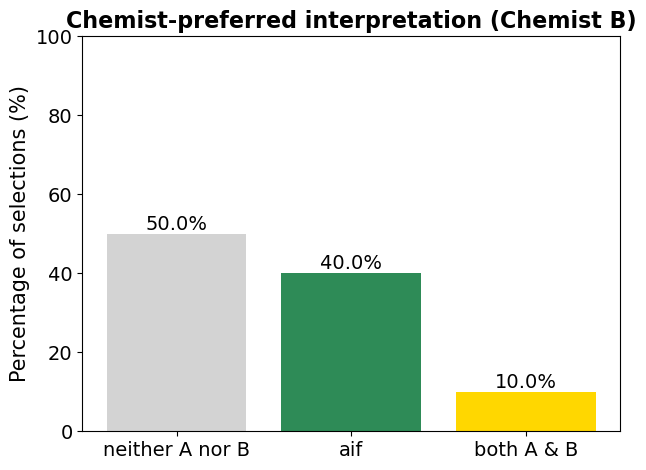

In [617]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding']      # 'dara' / 'aif'
    elif choice == 'B':
        return row['Interpretation B decoding']
    else:
        return row['Prefered Interpretation']        # ‘Neither’, blanks…

evaluation['Preferred system'] = evaluation.apply(get_preferred_system, axis=1)

# --------------------------------------------------
#  percentages
# --------------------------------------------------
percentages = (
    evaluation['Preferred system']
      .value_counts(normalize=True)
      .mul(100)
      .rename_axis('System')
      .reset_index(name='Percentage')
)

# --------------------------------------------------
#  bar plot with matching colours
# --------------------------------------------------
# same colour scheme you used earlier:
palette = {
    'dara'            : 'steelblue',
    'aif'             : 'seagreen',
    'both a & b'      : 'gold',
    'neither a nor b' : 'lightgrey',
    'neither'         : 'lightgrey',   # in case the label differs
}

# fig, ax = plt.subplots()

# bar_colors = [palette.get(sys.lower(), 'grey') for sys in percentages['System']]
# ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

# ax.set_ylabel('Percentage of selections (%)')
# ax.set_title('Chemist-preferred interpretation by system (Chemist B)')
# ax.set_ylim(0, 100)

# for i, v in enumerate(percentages['Percentage']):
#     ax.text(i, v + 1, f'{v:.1f}%', ha='center')

# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots()

bar_colors = [palette.get(sys.lower(), 'grey') for sys in percentages['System']]
ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)
# Increase tick label sizes
ax.tick_params(axis='both', labelsize=15)



# Either use tick_params:
ax.tick_params(axis='x', labelsize=14)

# Or use plt.xticks directly (especially if you're rotating):
plt.xticks(fontweight='medium')
ax.set_ylim(0, 100)
ax.set_title('Chemist-preferred interpretation (Chemist B)', fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage of selections (%)', fontsize=15)

# Tick labels (axes)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

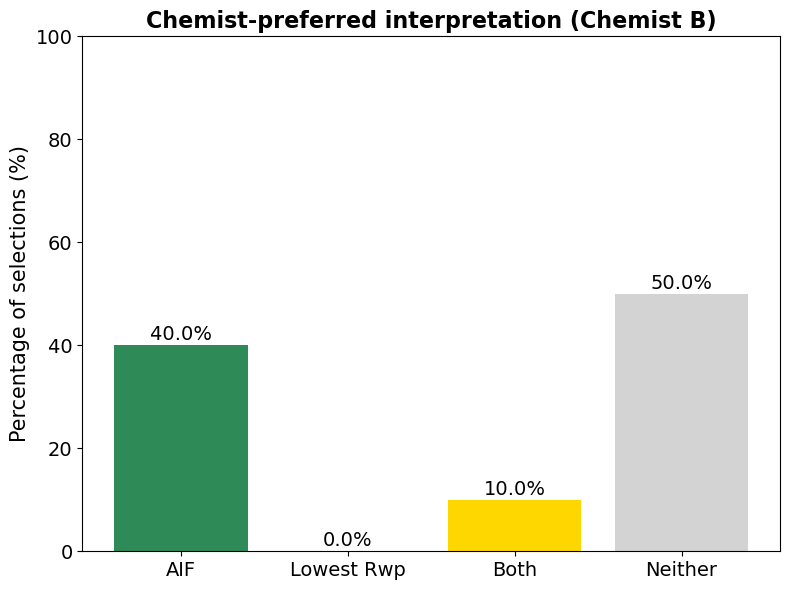

In [618]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'aif' or 'dara'
    elif choice == 'B':
        return row['Interpretation B decoding'].strip().lower()
    else:
        return str(row['Prefered Interpretation']).strip().lower()

evaluation['Preferred system'] = evaluation.apply(get_preferred_system, axis=1)

# --------------------------------------------------
# Set desired display order and label mapping
# --------------------------------------------------
system_label_map = {
    'aif'            : 'AIF',
    'dara'           : 'Lowest Rwp',
    'both a & b'     : 'Both',
    'neither a nor b': 'Neither',
    'neither'        : 'Neither',  # safety fallback
}

ordered_labels = ['AIF', 'Lowest Rwp', 'Both', 'Neither']

# Map and count
value_counts = evaluation['Preferred system'].map(system_label_map).value_counts(normalize=True)
percentages = (
    value_counts
    .mul(100)
    .reindex(ordered_labels, fill_value=0)
    .reset_index()
)
percentages.columns = ['System', 'Percentage']

# --------------------------------------------------
# Plot with consistent colors
# --------------------------------------------------
palette = {
    'AIF'         : 'seagreen',
    'Lowest Rwp'  : 'steelblue',
    'Both'        : 'gold',
    'Neither'     : 'lightgrey',
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_colors = [palette.get(sys, 'grey') for sys in percentages['System']]
bars = ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)', fontsize=15)
ax.set_title('Chemist-preferred interpretation (Chemist B)', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xticks(fontweight='medium')

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

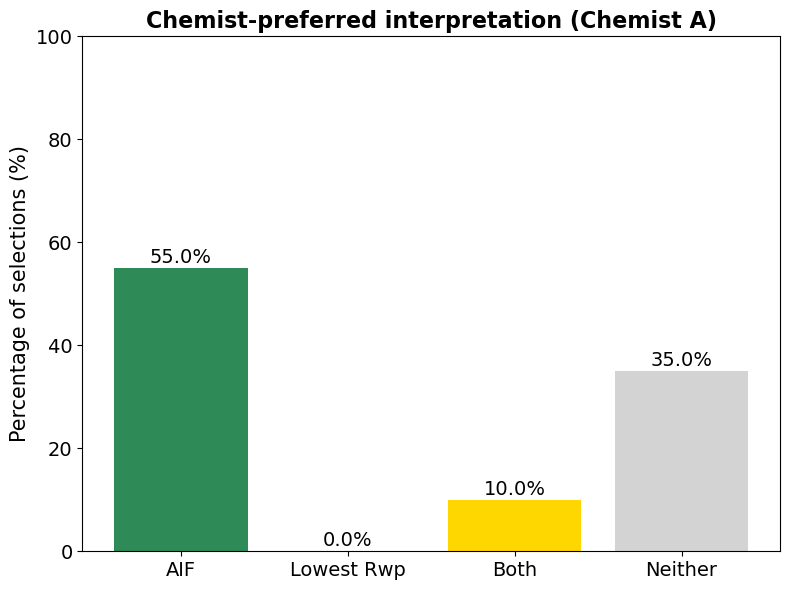

In [619]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'aif' or 'dara'
    elif choice == 'B':
        return row['Interpretation B decoding'].strip().lower()
    else:
        return str(row['Prefered Interpretation']).strip().lower()

evaluation_Amalie['Preferred system'] = evaluation_Amalie.apply(get_preferred_system, axis=1)

# --------------------------------------------------
# Set desired display order and label mapping
# --------------------------------------------------
system_label_map = {
    'aif'            : 'AIF',
    'dara'           : 'Lowest Rwp',
    'both a & b'     : 'Both',
    'neither a nor b': 'Neither',
    'neither'        : 'Neither',  # safety fallback
}

ordered_labels = ['AIF', 'Lowest Rwp', 'Both', 'Neither']

# Map and count
value_counts = evaluation_Amalie['Preferred system'].map(system_label_map).value_counts(normalize=True)
percentages = (
    value_counts
    .mul(100)
    .reindex(ordered_labels, fill_value=0)
    .reset_index()
)
percentages.columns = ['System', 'Percentage']

# --------------------------------------------------
# Plot with consistent colors
# --------------------------------------------------
palette = {
    'AIF'         : 'seagreen',
    'Lowest Rwp'  : 'steelblue',
    'Both'        : 'gold',
    'Neither'     : 'lightgrey',
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_colors = [palette.get(sys, 'grey') for sys in percentages['System']]
bars = ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)', fontsize=15)
ax.set_title('Chemist-preferred interpretation (Chemist A)', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xticks(fontweight='medium')

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

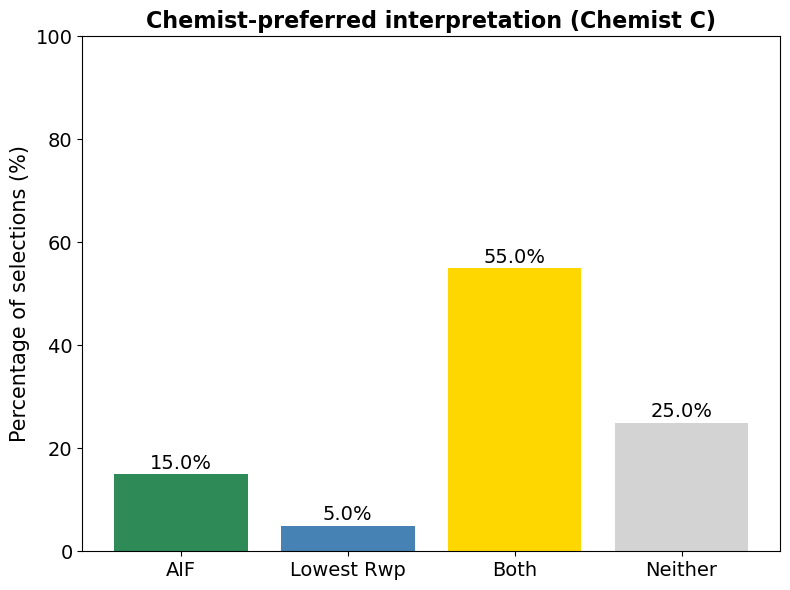

In [620]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'aif' or 'dara'
    elif choice == 'B':
        return row['Interpretation B decoding'].strip().lower()
    else:
        return str(row['Prefered Interpretation']).strip().lower()

evaluation_Steven['Preferred system'] = evaluation_Steven.apply(get_preferred_system, axis=1)

# --------------------------------------------------
# Set desired display order and label mapping
# --------------------------------------------------
system_label_map = {
    'aif'            : 'AIF',
    'dara'           : 'Lowest Rwp',
    'both a & b'     : 'Both',
    'neither a nor b': 'Neither',
    'neither'        : 'Neither',  # safety fallback
}

ordered_labels = ['AIF', 'Lowest Rwp', 'Both', 'Neither']

# Map and count
value_counts = evaluation_Steven['Preferred system'].map(system_label_map).value_counts(normalize=True)
percentages = (
    value_counts
    .mul(100)
    .reindex(ordered_labels, fill_value=0)
    .reset_index()
)
percentages.columns = ['System', 'Percentage']

# --------------------------------------------------
# Plot with consistent colors
# --------------------------------------------------
palette = {
    'AIF'         : 'seagreen',
    'Lowest Rwp'  : 'steelblue',
    'Both'        : 'gold',
    'Neither'     : 'lightgrey',
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_colors = [palette.get(sys, 'grey') for sys in percentages['System']]
bars = ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)', fontsize=15)
ax.set_title('Chemist-preferred interpretation (Chemist C)', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xticks(fontweight='medium')

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

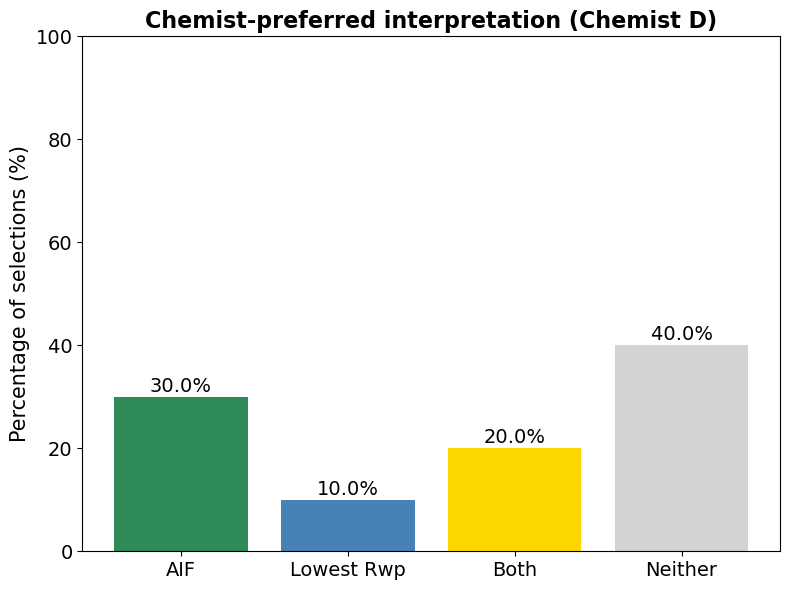

In [502]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'aif' or 'dara'
    elif choice == 'B':
        return row['Interpretation B decoding'].strip().lower()
    else:
        return str(row['Prefered Interpretation']).strip().lower()

evaluation_Amanda['Preferred system'] = evaluation_Amanda.apply(get_preferred_system, axis=1)

# --------------------------------------------------
# Set desired display order and label mapping
# --------------------------------------------------
system_label_map = {
    'aif'            : 'AIF',
    'dara'           : 'Lowest Rwp',
    'both a & b'     : 'Both',
    'neither a nor b': 'Neither',
    'neither'        : 'Neither',  # safety fallback
}

ordered_labels = ['AIF', 'Lowest Rwp', 'Both', 'Neither']

# Map and count
value_counts = evaluation_Amanda['Preferred system'].map(system_label_map).value_counts(normalize=True)
percentages = (
    value_counts
    .mul(100)
    .reindex(ordered_labels, fill_value=0)
    .reset_index()
)
percentages.columns = ['System', 'Percentage']

# --------------------------------------------------
# Plot with consistent colors
# --------------------------------------------------
palette = {
    'AIF'         : 'seagreen',
    'Lowest Rwp'  : 'steelblue',
    'Both'        : 'gold',
    'Neither'     : 'lightgrey',
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_colors = [palette.get(sys, 'grey') for sys in percentages['System']]
bars = ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)', fontsize=15)
ax.set_title('Chemist-preferred interpretation (Chemist D)', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xticks(fontweight='medium')

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

## Checking plots for publication

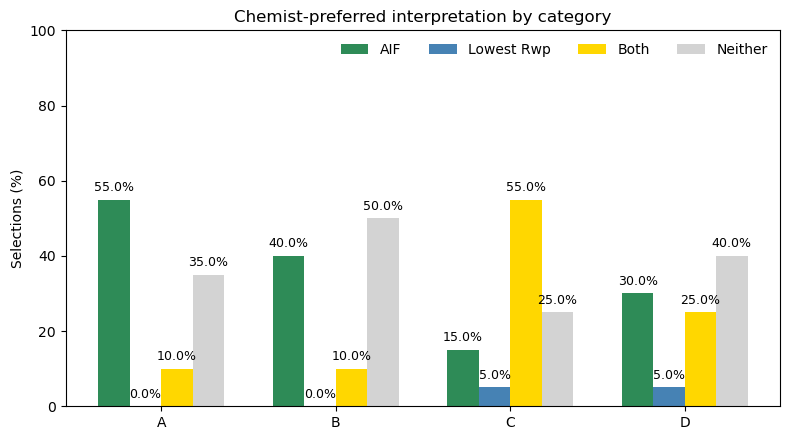

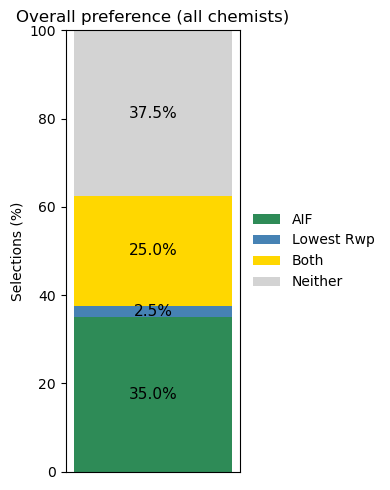

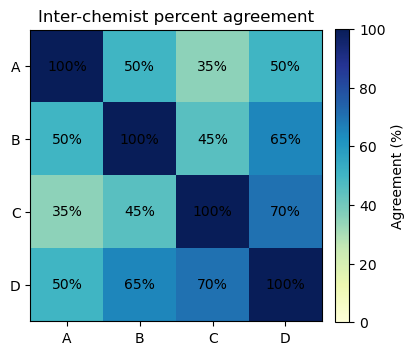

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- Load data ----------
evaluation_Amalie  = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_AT.csv")   # Chemist A
evaluation         = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_new.csv")  # Chemist B (Lauren)
evaluation_Steven  = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Steven.csv")  # Chemist C
evaluation_Amanda  = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Amanda.csv")  # Chemist D
decoding           = pd.read_csv("../data/alab_synthesis_data/evaluation2_decoding_new.csv")

# Attach per-row decoding (A/B -> "aif"/"dara")
for df in [evaluation_Amalie, evaluation, evaluation_Steven, evaluation_Amanda]:
    df["Interpretation A decoding"] = decoding["Interpretation A"]
    df["Interpretation B decoding"] = decoding["Interpretation B"]

# ---------- Helpers ----------
def get_preferred_system(row, choice_col="Prefered Interpretation"):
    choice = str(row[choice_col]).strip().lower()
    if choice == "a":
        return str(row["Interpretation A decoding"]).strip().lower()
    if choice == "b":
        return str(row["Interpretation B decoding"]).strip().lower()
    if "both" in choice:
        return "both a & b"
    if "neither" in choice:
        return "neither a nor b"
    return ""  # blank/missing

def preferred_series(df, choice_col="Prefered Interpretation"):
    s = df.apply(lambda r: get_preferred_system(r, choice_col), axis=1)
    s = s.replace({"neither": "neither a nor b"})  # normalize
    valid = {"aif", "dara", "both a & b", "neither a nor b"}
    return s.where(s.isin(valid), "")

def percent_breakdown(series):
    cats = ["aif", "dara", "both a & b", "neither a nor b"]
    vc = series.value_counts(dropna=False)
    tot = int(vc.sum()) if int(vc.sum()) > 0 else 1
    return pd.Series({c: 100.0 * float(vc.get(c, 0)) / tot for c in cats})

# ---------- Build per-chemist category percentages ----------
chem_series = {
    "A": preferred_series(evaluation_Amalie),  # Amalie
    "B": preferred_series(evaluation),         # Lauren
    "C": preferred_series(evaluation_Steven),  # Steven
    "D": preferred_series(evaluation_Amanda),  # Amanda
}

summary_df = pd.DataFrame({k: percent_breakdown(v) for k, v in chem_series.items()})
summary_df = summary_df.rename(index={
    "aif":"AIF", "dara":"Lowest Rwp", "both a & b":"Both", "neither a nor b":"Neither"
})

# ---------- 1) Grouped bar: per-chemist distribution ----------
cats_order = ["AIF", "Lowest Rwp", "Both", "Neither"]
chem_order = ["A","B","C","D"]
colors = {"AIF":"seagreen","Lowest Rwp":"steelblue","Both":"gold","Neither":"lightgrey"}

fig, ax = plt.subplots(figsize=(8,4.5))
w = 0.18
x = np.arange(len(chem_order))
for i, cat in enumerate(cats_order):
    y = [summary_df.loc[cat, ch] for ch in chem_order]
    ax.bar(x + (i - 1.5)*w, y, width=w, color=colors[cat], label=cat)
ax.set_xticks(x); ax.set_xticklabels(chem_order)
ax.set_ylim(0, 100); ax.set_ylabel("Selections (%)")
ax.set_title("Chemist-preferred interpretation by category")
ax.legend(ncols=4, frameon=False, loc="upper right")
for i, cat in enumerate(cats_order):
    y = [summary_df.loc[cat, ch] for ch in chem_order]
    for j, v in enumerate(y):
        ax.text(x[j] + (i - 1.5)*w, v + 1.5, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)
plt.tight_layout(); plt.show()

# ---------- 2) Overall stacked bar with % labels ----------
overall = percent_breakdown(pd.concat(list(chem_series.values()), ignore_index=True)).rename(index={
    "aif":"AIF","dara":"Lowest Rwp","both a & b":"Both","neither a nor b":"Neither"
})

fig, ax = plt.subplots(figsize=(4.0,5))
bottom = 0.0
centers = []  # for label placement
heights = []
for cat in cats_order:
    h = float(overall[cat])
    ax.bar([0], [h], bottom=bottom, color=colors[cat], label=cat)
    centers.append(bottom + h/2.0)
    heights.append(h)
    bottom += h

ax.set_ylim(0, 100)
ax.set_ylabel("Selections (%)")
ax.set_title("Overall preference (all chemists)")
ax.set_xticks([])

# Add % labels centered in each stacked segment
for c, h, cat in zip(centers, heights, cats_order):
    if h > 0.5:  # avoid clutter for tiny slices
        ax.text(0, c, f"{h:.1f}%", ha="center", va="center", fontsize=11, color="black")

ax.legend(frameon=False, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout(); plt.show()

# ---------- 3) Inter-chemist agreement heatmap (fixed scalar assignment) ----------
def canon(s):
    return s.replace({
        "aif":"AIF","dara":"Lowest Rwp","both a & b":"Both","neither a nor b":"Neither","": np.nan
    })

wide = pd.DataFrame({
    "A": canon(chem_series["A"]),
    "B": canon(chem_series["B"]),
    "C": canon(chem_series["C"]),
    "D": canon(chem_series["D"]),
})

chems = ["A","B","C","D"]
agree = pd.DataFrame(index=chems, columns=chems, dtype=float)

for i in chems:
    for j in chems:
        both = wide[[i, j]].dropna()
        if both.empty:
            val = np.nan
        else:
            # Use NumPy arrays to ensure a scalar float
            same = (both[i].to_numpy() == both[j].to_numpy())
            val = float(np.mean(same) * 100.0)
        agree.loc[i, j] = val

fig, ax = plt.subplots(figsize=(4.2,3.8))
im = ax.imshow(agree.values.astype(float), vmin=0, vmax=100, cmap="YlGnBu")
ax.set_xticks(range(len(chems))); ax.set_yticks(range(len(chems)))
ax.set_xticklabels(chems); ax.set_yticklabels(chems)
ax.set_title("Inter-chemist percent agreement")
for r in range(len(chems)):
    for c in range(len(chems)):
        v = agree.iloc[r, c]
        ax.text(c, r, "" if pd.isna(v) else f"{v:.0f}%", ha="center", va="center", fontsize=10)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Agreement (%)")
plt.tight_layout(); plt.show()

In [504]:
wide

,A,B,C,D
0,AIF,AIF,Both,AIF
1,AIF,AIF,Lowest Rwp,Lowest Rwp
2,Neither,AIF,AIF,AIF
3,Neither,Neither,Neither,Neither
4,AIF,AIF,Both,AIF
5,AIF,Neither,Both,Neither
6,AIF,Both,Both,Both
7,AIF,AIF,Both,Both
8,Neither,Neither,Neither,Neither
9,AIF,Neither,AIF,AIF


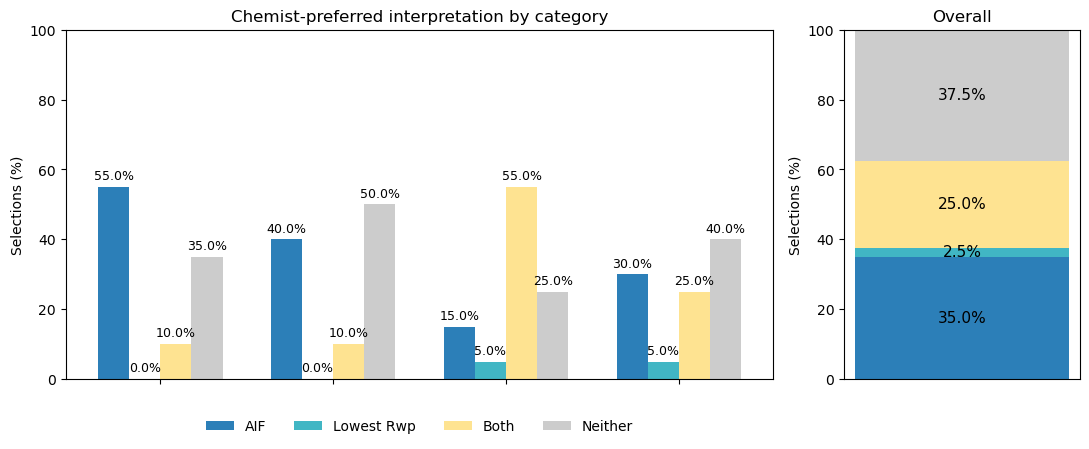

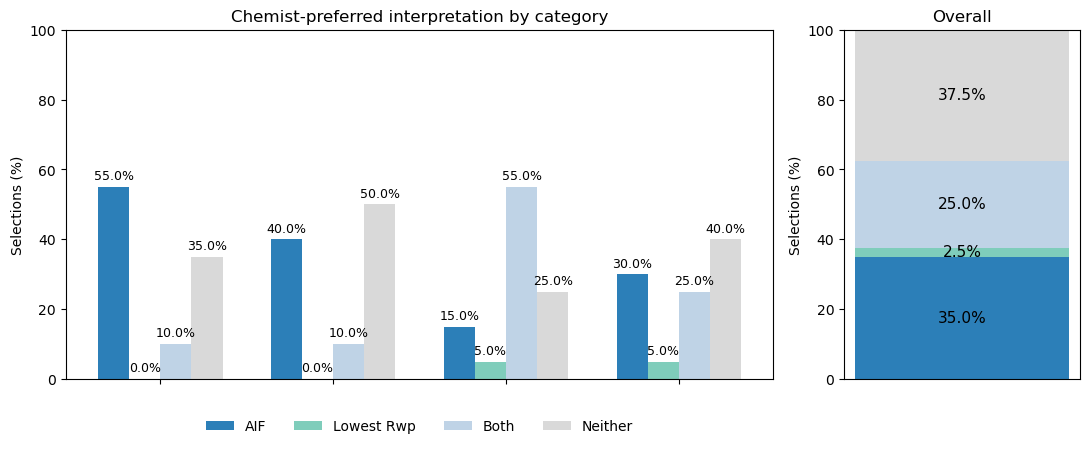

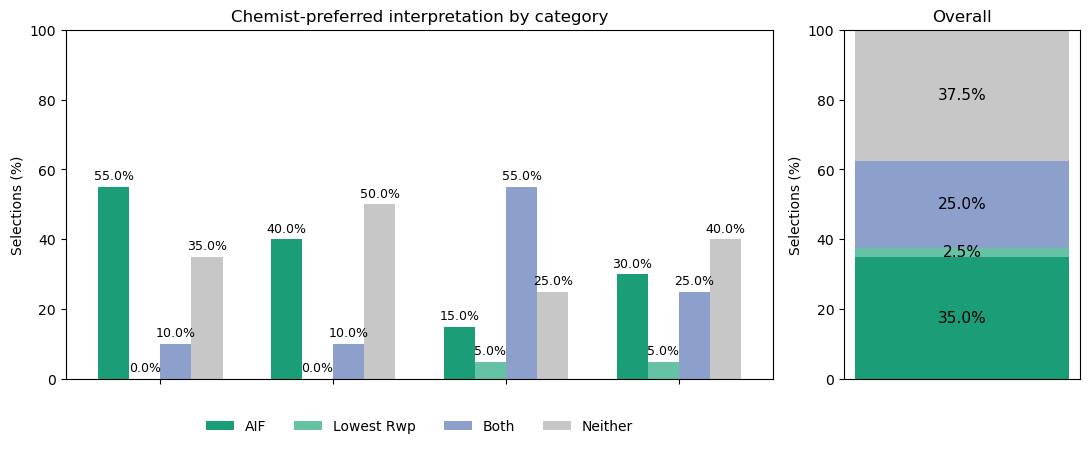

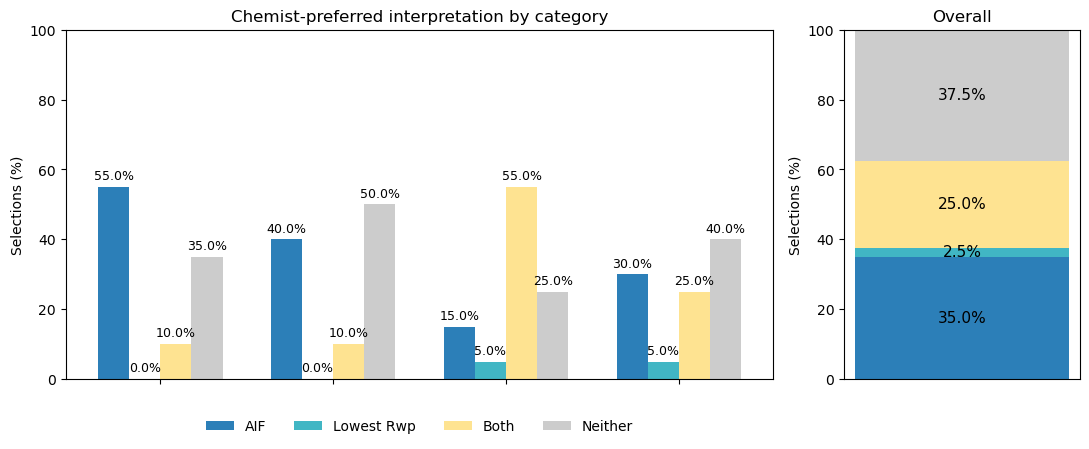

In [622]:
# ===== EXTRA: composite figure (left=per-chemist bars, right=overall stack) =====
def plot_composite(summary_df, overall, chem_order, cats_order, colors,
                   hide_chemist_labels=True, filename=None):
    import numpy as np
    import matplotlib.pyplot as plt

    fig, (axL, axR) = plt.subplots(1, 2, figsize=(11, 4.6), gridspec_kw={"width_ratios": [3, 1]})

    # ----- Left: grouped per-chemist bars -----
    w = 0.18
    x = np.arange(len(chem_order))
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        axL.bar(x + (i - 1.5)*w, y, width=w, color=colors[cat], label=cat)

    axL.set_ylim(0, 100)
    axL.set_ylabel("Selections (%)")
    axL.set_title("Chemist-preferred interpretation by category")

    if hide_chemist_labels:
        axL.set_xticks(x)
        axL.set_xticklabels([""] * len(chem_order))  # hide A/B/C/D
    else:
        axL.set_xticks(x)
        axL.set_xticklabels(chem_order)

    # annotate %
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        for j, v in enumerate(y):
            axL.text(x[j] + (i - 1.5)*w, v + 1.2, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

    # Put legend under the left plot (or move wherever you like)
    axL.legend(ncols=len(cats_order), frameon=False, loc="upper center", bbox_to_anchor=(0.5, -0.08))

    # ----- Right: overall stacked bar with % labels -----
    bottom = 0.0
    centers, heights = [], []
    for cat in cats_order:
        h = float(overall[cat])
        axR.bar([0], [h], bottom=bottom, color=colors[cat])
        centers.append(bottom + h/2.0)
        heights.append(h)
        bottom += h

    axR.set_ylim(0, 100)
    axR.set_xticks([])
    axR.set_ylabel("Selections (%)")
    axR.set_title("Overall")

    for c, h, cat in zip(centers, heights, cats_order):
        if h > 0.5:
            axR.text(0, c, f"{h:.1f}%", ha="center", va="center", fontsize=11)

    plt.tight_layout()
    if filename:
        fig.savefig(filename, dpi=300, bbox_inches="tight")

    return fig

# Example usage:
#   hide_chemist_labels=True will suppress A/B/C/D on the left panel
plot_composite(summary_df, overall, chem_order=["A","B","C","D"],
               cats_order=["AIF","Lowest Rwp","Both","Neither"],
            #    colors={"AIF":"seagreen","Lowest Rwp":"steelblue","Both":"gold","Neither":"lightgrey"},
            colors = {
    "AIF": "#2C7FB8",        # medium blue (GnBu mid)
    "Lowest Rwp": "#7FCDBB", # soft teal
    "Both": "#BFD3E6",       # light bluish-grey
    "Neither": "#D9D9D9",    # neutral light grey
},
               hide_chemist_labels=True, filename=None)

plot_composite(summary_df, overall, chem_order=["A","B","C","D"],
               cats_order=["AIF","Lowest Rwp","Both","Neither"],
            #    colors={"AIF":"seagreen","Lowest Rwp":"steelblue","Both":"gold","Neither":"lightgrey"},
colors = {
    "AIF": "#1B9E77",        # greenish-blue
    "Lowest Rwp": "#66C2A5", # seafoam
    "Both": "#8DA0CB",       # light indigo
    "Neither": "#C7C7C7",    # soft grey

},
               hide_chemist_labels=True, filename=None)

plot_composite(summary_df, overall, chem_order=["A","B","C","D"],
               cats_order=["AIF","Lowest Rwp","Both","Neither"],
               colors = {
    "AIF": "#2C7FB8",        # deep teal-blue
    "Lowest Rwp": "#41B6C4", # turquoise
    "Both": "#FEE391",       # soft sand-yellow accent
    "Neither": "#CCCCCC",    # neutral grey
},
               hide_chemist_labels=True, filename=None)

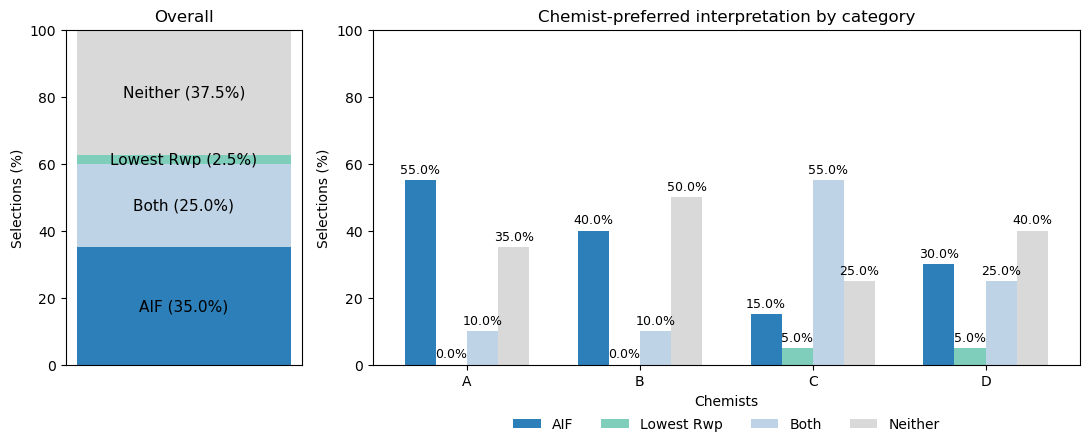

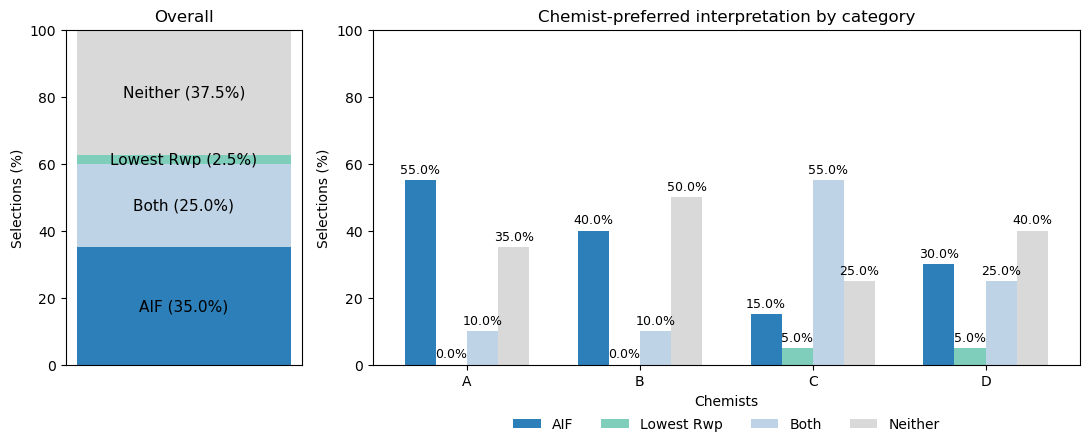

In [506]:
# ===== UPDATED: composite figure (left=overall stack, right=per-chemist bars) =====
def plot_composite(summary_df, overall, chem_order, cats_order, colors,
                   hide_chemist_labels=False, filename=None):
    import numpy as np
    import matplotlib.pyplot as plt

    # Overall on the left (narrow), chemists on the right (wide)
    fig, (axL, axR) = plt.subplots(
        1, 2, figsize=(11, 4.6), gridspec_kw={"width_ratios": [1, 3]}
    )

    # ----- LEFT: overall stacked bar with category+% labels -----
    # Force the requested stacked order regardless of cats_order
    overall_order = ["AIF", "Both", "Lowest Rwp", "Neither"]

    bottom = 0.0
    centers, heights, used_cats = [], [], []
    for cat in overall_order:
        if cat not in overall:
            continue
        h = float(overall[cat])
        axL.bar([0], [h], bottom=bottom, color=colors[cat])
        centers.append(bottom + h/2.0)
        heights.append(h)
        used_cats.append(cat)
        bottom += h

    axL.set_ylim(0, 100)
    axL.set_xticks([])  # no x ticks for the overall single bar
    axL.set_ylabel("Selections (%)")
    axL.set_title("Overall")

    # Label inside each segment: "<Category> (<xx.x>%)"
    for c, h, cat in zip(centers, heights, used_cats):
        if h > 0.5:  # avoid cluttering tiny slices
            axL.text(0, c, f"{cat} ({h:.1f}%)", ha="center", va="center", fontsize=11)

    # ----- RIGHT: grouped per-chemist bars -----
    w = 0.18
    x = np.arange(len(chem_order))
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        axR.bar(x + (i - (len(cats_order)-1)/2.0)*w, y, width=w, color=colors[cat], label=cat)

    axR.set_ylim(0, 100)
    axR.set_ylabel("Selections (%)")
    axR.set_title("Chemist-preferred interpretation by category")
    axR.set_xlabel("Chemists")

    axR.set_xticks(x)
    axR.set_xticklabels(chem_order if not hide_chemist_labels else [""] * len(chem_order))

    # annotate % above bars
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        for j, v in enumerate(y):
            axR.text(x[j] + (i - (len(cats_order)-1)/2.0)*w, v + 1.2, f"{v:.1f}%",
                     ha="center", va="bottom", fontsize=9)

    # Legend under the RIGHT plot (optional—labels are already in the overall)
    axR.legend(ncols=len(cats_order), frameon=False, loc="upper center",
               bbox_to_anchor=(0.5, -0.12))

    plt.tight_layout()
    if filename:
        fig.savefig(filename, dpi=300, bbox_inches="tight")

    return fig
plot_composite(summary_df, overall, chem_order=["A","B","C","D"],
               cats_order=["AIF","Lowest Rwp","Both","Neither"],
            #    colors={"AIF":"seagreen","Lowest Rwp":"steelblue","Both":"gold","Neither":"lightgrey"},
            colors = {
    "AIF": "#2C7FB8",        # medium blue (GnBu mid)
    "Lowest Rwp": "#7FCDBB", # soft teal
    "Both": "#BFD3E6",       # light bluish-grey
    "Neither": "#D9D9D9",    # neutral light grey
},
               hide_chemist_labels=False, filename=None)

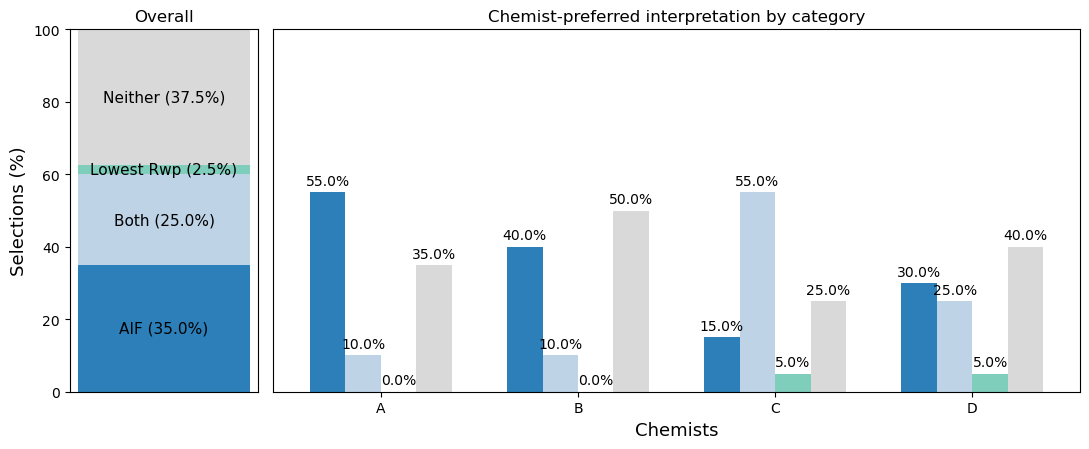

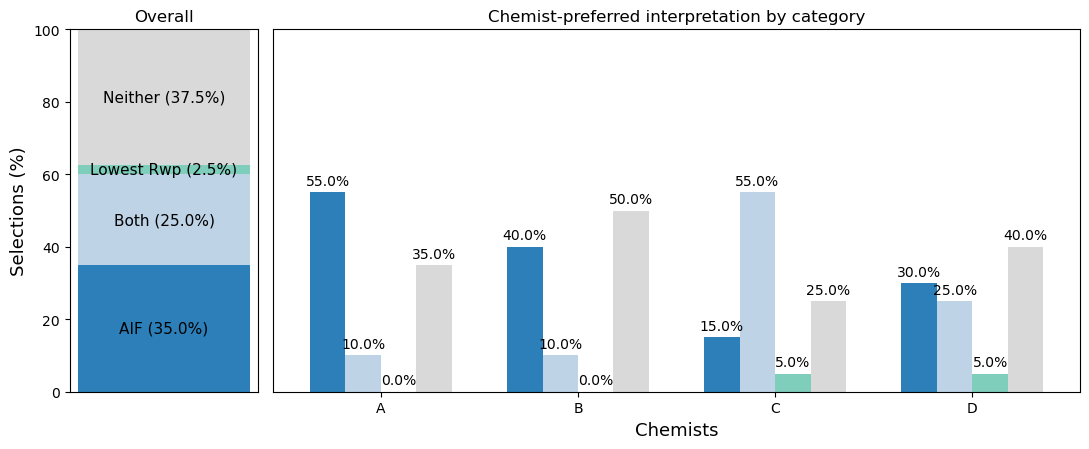

In [623]:
def plot_composite(summary_df, overall, chem_order, cats_order, colors,
                   hide_chemist_labels=False, filename=None):
    import numpy as np
    import matplotlib.pyplot as plt

    # Share Y so both panels use the same axis; make left narrow, right wide
    fig, (axL, axR) = plt.subplots(
        1, 2, figsize=(11, 4.6),
        gridspec_kw={"width_ratios": [0.7, 3]},
        sharey=True
    )
    fig.subplots_adjust(wspace=0.05)  # small gap since y is shared

    # ----- LEFT: overall stacked bar -----
    overall_order = ["AIF", "Both", "Lowest Rwp", "Neither"]
    bottom = 0.0
    for cat in overall_order:
        if cat not in overall:
            continue
        h = float(overall[cat])
        axL.bar([0], [h], bottom=bottom, color=colors[cat])
        if h > 0.5:
            axL.text(0, bottom + h/2.0, f"{cat} ({h:.1f}%)",
                     ha="center", va="center", fontsize=11)
        bottom += h

    axL.set_ylim(0, 100)
    axL.set_xticks([])
    axL.set_ylabel("Selections (%)")  # single shared y label (left only)
    axL.set_title("Overall")

    # ----- RIGHT: grouped per-chemist bars -----
    w = 0.18
    x = np.arange(len(chem_order))
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        axR.bar(x + (i - (len(cats_order)-1)/2.0)*w, y,
                width=w, color=colors[cat], label=cat)

    # Hide the duplicate y-axis on the right
    axR.tick_params(axis='y', which='both', left=False, labelleft=False)
    axR.spines['left'].set_visible(True)
    axR.set_ylabel(None)  # no second y label

    axR.set_title("Chemist-preferred interpretation by category")
    axR.set_xlabel("Chemists")
    axR.set_xticks(x)
    axR.set_xticklabels(chem_order if not hide_chemist_labels else [""] * len(chem_order))

    axL.set_ylabel("Selections (%)", fontsize=13)
    axR.set_xlabel("Chemists", fontsize=13)
    # annotate % above bars
    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        for j, v in enumerate(y):
            axR.text(x[j] + (i - (len(cats_order)-1)/2.0)*w, v + 1.2,
                     f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

    # Legend under the right plot
    # axR.legend(ncols=len(cats_order), frameon=False,
    #            loc="upper center", bbox_to_anchor=(0.5, -0.12))

    plt.tight_layout()
    if filename:
        fig.savefig(filename, dpi=300, bbox_inches="tight")
    return fig

plot_composite(summary_df, overall, chem_order=["A","B","C","D"],
               cats_order=["AIF","Both","Lowest Rwp","Neither"],
            #    colors={"AIF":"seagreen","Lowest Rwp":"steelblue","Both":"gold","Neither":"lightgrey"},
            colors = {
    "AIF": "#2C7FB8",        # medium blue (GnBu mid)
    "Lowest Rwp": "#7FCDBB", # soft teal
    "Both": "#BFD3E6",       # light bluish-grey
    "Neither": "#D9D9D9",    # neutral light grey
},
               hide_chemist_labels=False, filename=None)

In [624]:
import numpy as np
import pandas as pd

def build_best_vs_lowest_df(interpretations,
                            metrics=("LLM_interpretation_likelihood",
                                     "balance_score",
                                     "rwp",
                                     "score")):
    """
    Returns a DataFrame indexed by sample name with columns:
        <metric>_aif   (max posterior_probability)
        <metric>_low   (min rwp)
    for each metric in `metrics`, for samples where both are defined.
    """
    rows = []

    for sample, interps in interpretations.items():
        # interps: dict like {"I_1": {...}, "I_2": {...}, ...}
        records = list(interps.values())
        if not records:
            continue

        # pick AIF = max posterior_probability
        best = max(
            records,
            key=lambda d: d.get("posterior_probability", float("-inf"))
        )

        # pick lowest Rwp = min rwp
        low = min(
            records,
            key=lambda d: d.get("rwp", np.inf)
        )

        row = {"Name": sample}
        valid = True
        for m in metrics:
            a = best.get(m, None)
            b = low.get(m, None)
            if a is None or b is None or (isinstance(a, float) and np.isnan(a)) or \
               (isinstance(b, float) and np.isnan(b)):
                valid = False
                break
            row[f"{m}_aif"] = a
            row[f"{m}_low"] = b

        if valid:
            rows.append(row)

    if not rows:
        return pd.DataFrame()

    df = pd.DataFrame(rows).set_index("Name")
    return df

In [585]:
interpretations={ "TRI_80": {
        "I_1": {
            "phases": [
                "V2O3_167",
                "CaCO3_167"
            ],
            "phase_cifs": [
                "cifs/V2O3_167_(icsd_1869)-0.cif",
                "cifs/CaCO3_167_(icsd_166364)-0.cif"
            ],
            "phase_icsd": [
                "1869",
                "166364"
            ],
            "weight_fraction": [
                59.69431605979752,
                40.30568394020248
            ],
            "rwp": 6.18,
            "search_result_rwp": 8.16,
            "score": 0.8824756033526107,
            "search_result_score": 0.5896085981768027,
            "dara_score": 0.8824756033526107,
            "normalized_rwp": 0.897,
            "missing_peaks": 0,
            "extra_peaks": 0,
            "peaks_calculated": 50,
            "peaks_observed": 59,
            "flag": 27187.979999999996,
            "normalized_flag": 0.43614311754649576,
            "signal_above_bkg": 98.50959020607084,
            "signal_above_bkg_score": 22380.112874976647,
            "bkg_overshoot_score": 338.60195081832023,
            "abs_diff_score": 22718.714825794967,
            "bkg_baseline_score": 55.52602136906918,
            "interpretation_importance": 94.53299388947312,
            "balance_score": 0.9955555555555555,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8,
                "CaCO3 (space group 167)": 0.7
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is stable under reducing conditions and is likely to remain unreacted or partially reacted at 500\u00b0C in an argon atmosphere. The space group 167 is consistent with its known structure.",
                "CaCO3 (space group 167)": "CaCO3 is stable at 500\u00b0C in an inert atmosphere like argon, as it decomposes at higher temperatures. The space group 167 is consistent with its known structure."
            },
            "LLM_interpretation_likelihood": 0.75,
            "LLM_interpretation_explanation": "This interpretation is plausible as both V2O3 and CaCO3 are stable under the given conditions. The composition balance score is high, indicating a good match with the target composition.",
            "normalized_score": 0.9559152708833835,
            "prior_probability": 0.8932407407407406,
            "fit_quality": 0.9166384236277945,
            "trustworthy": True,
            "unnormalized_posterior": 0.8187787845127159,
            "posterior_probability": 0.2371681856093974,
            "adjusted_posterior_probability": 0.2371681856093974
        },
        "I_2": {
            "phases": [
                "V2O3_15",
                "CaCO3_167"
            ],
            "phase_cifs": [
                "cifs/V2O3_15_(icsd_95762)-11.cif",
                "cifs/CaCO3_167_(icsd_166364)-0.cif"
            ],
            "phase_icsd": [
                "95762",
                "166364"
            ],
            "weight_fraction": [
                61.16460709919267,
                38.83539290080732
            ],
            "rwp": 5.86,
            "search_result_rwp": 9.29,
            "score": 0.8823571771044125,
            "search_result_score": 0.7102557114496703,
            "dara_score": 0.8823571771044125,
            "normalized_rwp": 0.9023333333333333,
            "missing_peaks": 0,
            "extra_peaks": 0,
            "peaks_calculated": 50,
            "peaks_observed": 59,
            "flag": 25971.050000000003,
            "normalized_flag": 0.41662141552832993,
            "signal_above_bkg": 98.54588719656434,
            "signal_above_bkg_score": 22364.2300141408,
            "bkg_overshoot_score": 329.9996999129908,
            "abs_diff_score": 22694.229714053796,
            "bkg_baseline_score": 54.734404201376314,
            "cell_parameters": {
                "a": 0.858173,
                "b": 0.495283,
                "c": 0.547564,
                "alpha": 90.0,
                "beta": 121.5334,
                "gamma": 90.0
            },
            "interpretation_importance": 100.0,
            "balance_score": 0.9967888888888888,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.8,
                "CaCO3 (space group 167)": 0.7
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "V2O3 is stable under reducing conditions and is likely to remain unreacted or partially reacted at 500\u00b0C in an argon atmosphere. The space group 15 is less common but still plausible.",
                "CaCO3 (space group 167)": "CaCO3 is stable at 500\u00b0C in an inert atmosphere like argon, as it decomposes at higher temperatures. The space group 167 is consistent with its known structure."
            },
            "LLM_interpretation_likelihood": 0.76,
            "LLM_interpretation_explanation": "This interpretation is plausible as both V2O3 and CaCO3 are stable under the given conditions. The composition balance score is slightly higher than I_1, indicating a good match with the target composition.",
            "normalized_score": 0.9558648750112247,
            "prior_probability": 0.8981268518518519,
            "fit_quality": 0.9201771805592971,
            "trustworthy": True,
            "unnormalized_posterior": 0.8264358343216346,
            "posterior_probability": 0.2393861334173426,
            "adjusted_posterior_probability": 0.2393861334173426
        },
        "I_3": {
            "phases": [
                "V2O3_167",
                "CaCO3_14"
            ],
            "phase_cifs": [
                "cifs/V2O3_167_(icsd_1869)-0.cif",
                "cifs/CaCO3_14_(icsd_150)-1.cif"
            ],
            "phase_icsd": [
                "1869",
                "150"
            ],
            "weight_fraction": [
                58.922933129407774,
                41.07706687059224
            ],
            "rwp": 7.01,
            "search_result_rwp": 8.52,
            "score": 0.8862843333109346,
            "search_result_score": 0.6723196836267968,
            "dara_score": 0.8862843333109346,
            "normalized_rwp": 0.8831666666666667,
            "missing_peaks": 0,
            "extra_peaks": 2,
            "peaks_calculated": 59,
            "peaks_observed": 59,
            "flag": 24433.549999999996,
            "normalized_flag": 0.39195720571105985,
            "signal_above_bkg": 98.69386929363013,
            "signal_above_bkg_score": 22724.58961910527,
            "bkg_overshoot_score": 300.74091231385665,
            "abs_diff_score": 23025.33053141913,
            "bkg_baseline_score": 56.33316733067729,
            "cell_parameters": {
                "a": 0.63725,
                "b": 0.498939,
                "c": 0.81128,
                "alpha": 90.0,
                "beta": 107.821,
                "gamma": 90.0
            },
            "interpretation_importance": 83.03032127855975,
            "balance_score": 0.9941222222222222,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8,
                "CaCO3 (space group 14)": 0.6
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is stable under reducing conditions and is likely to remain unreacted or partially reacted at 500\u00b0C in an argon atmosphere. The space group 167 is consistent with its known structure.",
                "CaCO3 (space group 14)": "CaCO3 is stable at 500\u00b0C in an inert atmosphere like argon, but space group 14 is less common for CaCO3, reducing its likelihood slightly."
            },
            "LLM_interpretation_likelihood": 0.74,
            "LLM_interpretation_explanation": "This interpretation is plausible, but the less common space group for CaCO3 slightly reduces the overall likelihood. The composition balance score is slightly lower than I_1 and I_2.",
            "normalized_score": 0.9575293574337259,
            "prior_probability": 0.888237962962963,
            "fit_quality": 0.9079542302556863,
            "trustworthy": True,
            "unnormalized_posterior": 0.8064794159459159,
            "posterior_probability": 0.233605539651411,
            "adjusted_posterior_probability": 0.233605539651411
        },
        "I_4": {
            "phases": [
                "CaCO3_14"
            ],
            "phase_cifs": [
                "cifs/CaCO3_14_(icsd_150)-1.cif"
            ],
            "phase_icsd": [
                "150"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 27.3,
            "search_result_rwp": 32.06,
            "score": 0.26951817420051705,
            "search_result_score": 0.19127428196857854,
            "dara_score": 0.26951817420051705,
            "normalized_rwp": 0.545,
            "missing_peaks": 28,
            "extra_peaks": 8,
            "peaks_calculated": 24,
            "peaks_observed": 59,
            "flag": 158193.2,
            "normalized_flag": 2.5376977407904646,
            "signal_above_bkg": 90.17370122280958,
            "signal_above_bkg_score": 18676.927702508776,
            "bkg_overshoot_score": 2035.2394251994813,
            "abs_diff_score": 20712.16712770826,
            "bkg_baseline_score": 84.9603458891706,
            "cell_parameters": {
                "a": 0.63683,
                "b": 0.49478,
                "c": 0.81336,
                "alpha": 90.0,
                "beta": 108.033,
                "gamma": 90.0
            },
            "interpretation_importance": 1.097919085630972,
            "balance_score": 0.18518518518518523,
            "LLM_phases_likelihood": {
                "CaCO3 (space group 14)": 0.6
            },
            "LLM_phases_explanation": {
                "CaCO3 (space group 14)": "CaCO3 is stable at 500\u00b0C in an inert atmosphere like argon, but space group 14 is less common for CaCO3, reducing its likelihood slightly."
            },
            "LLM_interpretation_likelihood": 0.2,
            "LLM_interpretation_explanation": "This interpretation is unlikely as it only includes CaCO3, missing V2O3, which is expected to be present. The composition balance score is very low, indicating a poor match with the target composition.",
            "normalized_score": 0.5355851901535975,
            "prior_probability": 0.19135802469135804,
            "fit_quality": 0.5418617300511992,
            "trustworthy": False,
            "unnormalized_posterior": 0.10368959031843936,
            "posterior_probability": 0.030034818277615106,
            "adjusted_posterior_probability": 0.003003481827761511
        },
        "I_5": {
            "phases": [
                "CaCO3_167"
            ],
            "phase_cifs": [
                "cifs/CaCO3_167_(icsd_166364)-0.cif"
            ],
            "phase_icsd": [
                "166364"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 30.75,
            "search_result_rwp": 32.0,
            "score": 0.2555489503158156,
            "search_result_score": 0.17812417715750611,
            "dara_score": 0.2555489503158156,
            "normalized_rwp": 0.4875,
            "missing_peaks": 19,
            "extra_peaks": 1,
            "peaks_calculated": 31,
            "peaks_observed": 59,
            "flag": 151319.32,
            "normalized_flag": 2.427428590495352,
            "signal_above_bkg": 91.27386428225178,
            "signal_above_bkg_score": 18848.57617831759,
            "bkg_overshoot_score": 1801.9970460512461,
            "abs_diff_score": 20650.573224368836,
            "bkg_baseline_score": 82.06714052879391,
            "interpretation_importance": 0.0,
            "balance_score": 0.18518518518518523,
            "LLM_phases_likelihood": {
                "CaCO3 (space group 167)": 0.7
            },
            "LLM_phases_explanation": {
                "CaCO3 (space group 167)": "CaCO3 is stable at 500\u00b0C in an inert atmosphere like argon, as it decomposes at higher temperatures. The space group 167 is consistent with its known structure."
            },
            "LLM_interpretation_likelihood": 0.2,
            "LLM_interpretation_explanation": "This interpretation is unlikely as it only includes CaCO3, missing V2O3, which is expected to be present. The composition balance score is very low, indicating a poor match with the target composition.",
            "normalized_score": 0.5238627955071916,
            "prior_probability": 0.19135802469135804,
            "fit_quality": 0.49962093183573053,
            "trustworthy": False,
            "unnormalized_posterior": 0.09560647461054103,
            "posterior_probability": 0.027693455845204287,
            "adjusted_posterior_probability": 0.002769345584520429
        },
        "I_6": {
            "phases": [
                "V2O3_15"
            ],
            "phase_cifs": [
                "cifs/V2O3_15_(icsd_95762)-11.cif"
            ],
            "phase_icsd": [
                "95762"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 21.55,
            "search_result_rwp": 24.97,
            "score": 0.5200680166482692,
            "search_result_score": 0.39118879985883664,
            "dara_score": 0.5200680166482692,
            "normalized_rwp": 0.6408333333333334,
            "missing_peaks": 21,
            "extra_peaks": 1,
            "peaks_calculated": 25,
            "peaks_observed": 59,
            "flag": 98755.03,
            "normalized_flag": 1.5842047352395332,
            "signal_above_bkg": 93.77469465751979,
            "signal_above_bkg_score": 19348.90071285122,
            "bkg_overshoot_score": 1284.491678898334,
            "abs_diff_score": 20633.392391749552,
            "bkg_baseline_score": 74.02413799348064,
            "cell_parameters": {
                "a": 0.85817,
                "b": 0.495193,
                "c": 0.54747,
                "alpha": 90.0,
                "beta": 121.524,
                "gamma": 90.0
            },
            "interpretation_importance": 11.122092611679003,
            "balance_score": 0.5925925925925926,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.8
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "V2O3 is stable under reducing conditions and is likely to remain unreacted or partially reacted at 500\u00b0C in an argon atmosphere. The space group 15 is less common but still plausible."
            },
            "LLM_interpretation_likelihood": 0.6,
            "LLM_interpretation_explanation": "This interpretation is somewhat plausible as V2O3 is expected to be present, but it lacks CaCO3, which is also expected. The composition balance score is moderate, indicating a partial match with the target composition.",
            "normalized_score": 0.7400425092614085,
            "prior_probability": 0.595679012345679,
            "fit_quality": 0.6739030586426917,
            "trustworthy": False,
            "unnormalized_posterior": 0.4014299083890108,
            "posterior_probability": 0.11627854168037462,
            "adjusted_posterior_probability": 0.011627854168037462
        },
        "I_7": {
            "phases": [
                "V2O3_167"
            ],
            "phase_cifs": [
                "cifs/V2O3_167_(icsd_1869)-0.cif"
            ],
            "phase_icsd": [
                "1869"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 21.73,
            "search_result_rwp": 24.63,
            "score": 0.5177689602773727,
            "search_result_score": 0.31148442101929674,
            "dara_score": 0.5177689602773727,
            "normalized_rwp": 0.6378333333333333,
            "missing_peaks": 22,
            "extra_peaks": 0,
            "peaks_calculated": 24,
            "peaks_observed": 59,
            "flag": 101738.88,
            "normalized_flag": 1.6320709482237679,
            "signal_above_bkg": 93.71107164666121,
            "signal_above_bkg_score": 19364.9197548797,
            "bkg_overshoot_score": 1299.5752878141043,
            "abs_diff_score": 20664.495042693805,
            "bkg_baseline_score": 73.86555414704817,
            "interpretation_importance": 10.907203063321576,
            "balance_score": 0.5925925925925926,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is stable under reducing conditions and is likely to remain unreacted or partially reacted at 500\u00b0C in an argon atmosphere. The space group 167 is consistent with its known structure."
            },
            "LLM_interpretation_likelihood": 0.6,
            "LLM_interpretation_explanation": "This interpretation is somewhat plausible as V2O3 is expected to be present, but it lacks CaCO3, which is also expected. The composition balance score is moderate, indicating a partial match with the target composition.",
            "normalized_score": 0.7383016347508358,
            "prior_probability": 0.595679012345679,
            "fit_quality": 0.6713227671391674,
            "trustworthy": False,
            "unnormalized_posterior": 0.3998928828946275,
            "posterior_probability": 0.11583332551865491,
            "adjusted_posterior_probability": 0.011583332551865493
        }
    },
    "TRI_90": {
        "I_1": {
            "phases": [
                "V2O3_167",
                "Ca5V3O13_176"
            ],
            "phase_cifs": [
                "cifs/V2O3_167_(icsd_1869)-0.cif",
                "cifs/Ca5V3O13_176_(icsd_760148)-6.cif"
            ],
            "phase_icsd": [
                "1869",
                "760148"
            ],
            "weight_fraction": [
                81.77126958224387,
                18.228730417756122
            ],
            "rwp": 10.19,
            "search_result_rwp": 11.37,
            "score": 0.8431069891391657,
            "search_result_score": 0.6245149433986086,
            "dara_score": 0.8431069891391657,
            "normalized_rwp": 0.8301666666666667,
            "missing_peaks": 10,
            "extra_peaks": 1,
            "peaks_calculated": 45,
            "peaks_observed": 49,
            "flag": 64107.54,
            "normalized_flag": 0.9835452744290202,
            "signal_above_bkg": 95.21310152344854,
            "signal_above_bkg_score": 18501.845193737026,
            "bkg_overshoot_score": 930.1918869795791,
            "abs_diff_score": 19432.0370807166,
            "bkg_baseline_score": 77.44848967765303,
            "interpretation_importance": 100.0,
            "balance_score": 0.9501222222222222,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8,
                "Ca5V3O13 (space group 176)": 0.4
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is a stable phase under reducing conditions, such as those provided by an argon atmosphere. It is likely to remain as an unreacted precursor or form due to incomplete reaction.",
                "Ca5V3O13 (space group 176)": "Ca5V3O13 is a less common phase and may form under specific conditions, but its presence at 18.23% suggests incomplete reaction or kinetic trapping. It is not the target phase and is less likely to be stable at 700\u00b0C."
            },
            "LLM_interpretation_likelihood": 0.55,
            "LLM_interpretation_explanation": "This interpretation includes V2O3, which is plausible as an unreacted precursor or stable phase under the given conditions. However, the presence of Ca5V3O13 suggests incomplete reaction or kinetic trapping, reducing the overall likelihood. The composition balance score is relatively high, indicating a reasonable match to the target composition.",
            "normalized_score": 0.9384595506862675,
            "prior_probability": 0.7834046296296296,
            "fit_quality": 0.8662642946732003,
            "trustworthy": True,
            "unnormalized_posterior": 0.6786354589298309,
            "posterior_probability": 0.31390172561510693,
            "adjusted_posterior_probability": 0.31390172561510693
        },
        "I_2": {
            "phases": [
                "V2O3_15",
                "Ca5V3O13_176"
            ],
            "phase_cifs": [
                "cifs/V2O3_15_(icsd_95762)-11.cif",
                "cifs/Ca5V3O13_176_(icsd_760148)-6.cif"
            ],
            "phase_icsd": [
                "95762",
                "760148"
            ],
            "weight_fraction": [
                66.50964558097803,
                33.49035441902198
            ],
            "rwp": 9.99,
            "search_result_rwp": 13.65,
            "score": 0.6687326538162822,
            "search_result_score": 0.6288773293609865,
            "dara_score": 0.6687326538162822,
            "normalized_rwp": 0.8335,
            "missing_peaks": 13,
            "extra_peaks": 10,
            "peaks_calculated": 55,
            "peaks_observed": 49,
            "flag": 45301.07,
            "normalized_flag": 0.6950142420856931,
            "signal_above_bkg": 96.62496329455253,
            "signal_above_bkg_score": 19843.052088915643,
            "bkg_overshoot_score": 693.1027641793287,
            "abs_diff_score": 20536.15485309497,
            "bkg_baseline_score": 76.46016660630207,
            "cell_parameters": {
                "a": 0.858401,
                "b": 0.495448,
                "c": 0.547571,
                "alpha": 90.0,
                "beta": 121.5183,
                "gamma": 90.0
            },
            "interpretation_importance": 31.826789570558788,
            "balance_score": 0.9847888888888888,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.5,
                "Ca5V3O13 (space group 176)": 0.4
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "Space group 15 is less common for V2O3 and may indicate a metastable or kinetically trapped phase. Its presence at 66.51% suggests it is a major component, but the polymorph is less favorable.",
                "Ca5V3O13 (space group 176)": "As in I_1, Ca5V3O13 is less likely to be stable at 700\u00b0C and may form due to incomplete reaction or kinetic trapping."
            },
            "LLM_interpretation_likelihood": 0.5,
            "LLM_interpretation_explanation": "The presence of a less stable V2O3 polymorph and Ca5V3O13 suggests kinetic trapping or incomplete reaction. The composition balance score is high, but the phase set is not ideal for the target synthesis.",
            "normalized_score": 0.8434357767859957,
            "prior_probability": 0.7827935185185185,
            "fit_quality": 0.8368119255953319,
            "trustworthy": True,
            "unnormalized_posterior": 0.6550509515750266,
            "posterior_probability": 0.30299275017175226,
            "adjusted_posterior_probability": 0.30299275017175226
        },
        "I_3": {
            "phases": [
                "V2O3_167"
            ],
            "phase_cifs": [
                "cifs/V2O3_167_(icsd_1869)-0.cif"
            ],
            "phase_icsd": [
                "1869"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 11.92,
            "search_result_rwp": 13.11,
            "score": 0.7232838704688159,
            "search_result_score": 0.5299306020482696,
            "dara_score": 0.7232838704688159,
            "normalized_rwp": 0.8013333333333333,
            "missing_peaks": 15,
            "extra_peaks": 0,
            "peaks_calculated": 24,
            "peaks_observed": 49,
            "flag": 136609.02000000002,
            "normalized_flag": 2.0958713447026596,
            "signal_above_bkg": 89.29223361423514,
            "signal_above_bkg_score": 16639.481875293448,
            "bkg_overshoot_score": 1995.377173232582,
            "abs_diff_score": 18634.859048526032,
            "bkg_baseline_score": 91.70298804780876,
            "interpretation_importance": 4.8050024299156355,
            "balance_score": 0.5925925925925926,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is stable under reducing conditions and likely remains as an unreacted precursor or forms due to incomplete reaction. Its presence at 100% suggests a lack of reaction towards the target phase."
            },
            "LLM_interpretation_likelihood": 0.4,
            "LLM_interpretation_explanation": "This interpretation suggests that only V2O3 is present, indicating a lack of reaction towards the target phase CaV2O3. The low composition balance score reflects this imbalance, reducing the overall likelihood.",
            "normalized_score": 0.8763212027388311,
            "prior_probability": 0.5123456790123456,
            "fit_quality": 0.8263292898018326,
            "trustworthy": False,
            "unnormalized_posterior": 0.42336624107130927,
            "posterior_probability": 0.19582736488457844,
            "adjusted_posterior_probability": 0.019582736488457847
        },
        "I_4": {
            "phases": [
                "V2O3_15"
            ],
            "phase_cifs": [
                "cifs/V2O3_15_(icsd_95762)-11.cif"
            ],
            "phase_icsd": [
                "95762"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 11.92,
            "search_result_rwp": 15.14,
            "score": 0.7100108171205157,
            "search_result_score": 0.5428966785537039,
            "dara_score": 0.7100108171205157,
            "normalized_rwp": 0.8013333333333333,
            "missing_peaks": 15,
            "extra_peaks": 0,
            "peaks_calculated": 22,
            "peaks_observed": 49,
            "flag": 136252.65,
            "normalized_flag": 2.0904038750501304,
            "signal_above_bkg": 89.32384327642613,
            "signal_above_bkg_score": 16659.3136573469,
            "bkg_overshoot_score": 1991.1530559941139,
            "abs_diff_score": 18650.466713341015,
            "bkg_baseline_score": 91.66632741760232,
            "cell_parameters": {
                "a": 0.858541,
                "b": 0.495297,
                "c": 0.547657,
                "alpha": 90.0,
                "beta": 121.5293,
                "gamma": 90.0
            },
            "interpretation_importance": 0.0,
            "balance_score": 0.5925925925925926,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.5
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "As in I_2, this polymorph is less stable and may indicate a kinetically trapped phase. Its presence at 100% suggests a lack of reaction towards the target phase."
            },
            "LLM_interpretation_likelihood": 0.35,
            "LLM_interpretation_explanation": "The presence of only a less stable V2O3 polymorph suggests incomplete reaction and a lack of formation of the target phase CaV2O3. The low composition balance score further reduces the likelihood of this interpretation.",
            "normalized_score": 0.8685840082024746,
            "prior_probability": 0.49151234567901236,
            "fit_quality": 0.8237502249563805,
            "trustworthy": False,
            "unnormalized_posterior": 0.4048834053219247,
            "posterior_probability": 0.1872781593285624,
            "adjusted_posterior_probability": 0.018727815932856242
        }
    }}

In [625]:
import numpy as np
import pandas as pd

def build_best_vs_lowest_df(interpretations,
                            metrics=("LLM_interpretation_likelihood",
                                     "balance_score",
                                     "rwp",
                                     "score")):
    """
    Returns a DataFrame indexed by sample name with columns:
        <metric>_aif   (max posterior_probability)
        <metric>_low   (min rwp)
    for each metric in `metrics`, for samples where both are defined.
    """
    rows = []

    for sample, interps in interpretations.items():
        # interps: dict like {"I_1": {...}, "I_2": {...}, ...}
        records = list(interps.values())
        if not records:
            continue

        # pick AIF = max posterior_probability
        best = max(
            records,
            key=lambda d: d.get("posterior_probability", float("-inf"))
        )

        # pick lowest Rwp = min rwp
        low = min(
            records,
            key=lambda d: d.get("rwp", np.inf)
        )

        row = {"Name": sample}
        valid = True
        for m in metrics:
            a = best.get(m, None)
            b = low.get(m, None)
            if a is None or b is None or (isinstance(a, float) and np.isnan(a)) or \
               (isinstance(b, float) and np.isnan(b)):
                valid = False
                break
            row[f"{m}_aif"] = a
            row[f"{m}_low"] = b

        if valid:
            rows.append(row)

    if not rows:
        return pd.DataFrame()

    df = pd.DataFrame(rows).set_index("Name")
    return df

In [626]:
import json

with open("../data/xrd_data/interpretations/multiproject_interpretations.json", "r") as f:
    interpretations = json.load(f)
best_vs_low_df = build_best_vs_lowest_df(interpretations)


In [627]:
best_vs_low_df

,LLM_interpretation_likelihood_aif,LLM_interpretation_likelihood_low,balance_score_aif,balance_score_low,rwp_aif,rwp_low,score_aif,score_low
Name,,,,,,,,
TRI_80,0.65,0.55,0.995556,0.996789,6.18,5.86,0.882476,0.882357
TRI_81,0.75,0.60,0.937500,0.980400,6.91,5.46,0.785596,0.829189
TRI_90,0.60,0.55,0.950122,0.984789,10.19,9.99,0.843107,0.668733
TRI_106,0.50,0.20,0.375000,0.375000,18.50,15.33,0.423197,0.529909
TRI_114,0.85,0.82,0.963900,0.967600,6.92,6.29,0.775704,0.783195
TRI_183,0.85,0.75,0.996400,0.980400,6.34,6.14,0.623147,0.621754
PG_1048_1,0.70,0.55,0.974400,0.971100,4.74,4.60,0.819440,0.827553
PG_0849_1,0.85,0.75,0.897600,0.877500,7.32,6.30,0.722740,0.768335
ARR_46,0.60,0.35,0.709300,0.791640,7.22,6.91,0.223863,0.031250


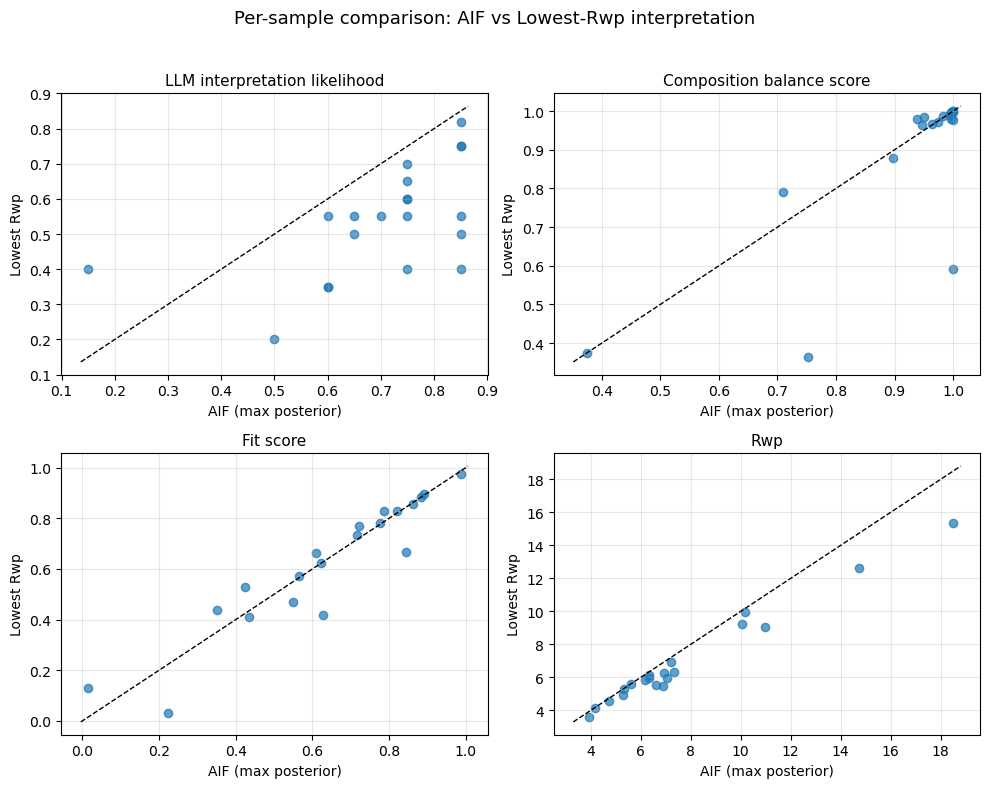

In [609]:
import matplotlib.pyplot as plt

def plot_metric_scatter_grid(best_vs_low_df):
    # define which metrics and how to label them
    metric_info = {
        "LLM_interpretation_likelihood": "LLM interpretation likelihood",
        "balance_score": "Composition balance score",
        "score": "Fit score",
        "rwp": "Rwp",
    }

    metrics = list(metric_info.keys())

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.ravel()

    for ax, m in zip(axes, metrics):
        x = best_vs_low_df[f"{m}_aif"].values
        y = best_vs_low_df[f"{m}_low"].values

        ax.scatter(x, y, alpha=0.7)

        # diagonal
        all_vals = np.concatenate([x, y])
        vmin, vmax = np.min(all_vals), np.max(all_vals)
        pad = 0.02 * (vmax - vmin if vmax > vmin else 1.0)
        ax.plot(
            [vmin - pad, vmax + pad],
            [vmin - pad, vmax + pad],
            "k--",
            linewidth=1
        )

        # labels
        ax.set_xlabel("AIF (max posterior)", fontsize=10)
        ax.set_ylabel("Lowest Rwp", fontsize=10)
        ax.set_title(metric_info[m], fontsize=11)

        ax.grid(alpha=0.3)

    fig.suptitle("Per-sample comparison: AIF vs Lowest-Rwp interpretation", fontsize=13)
    fig.tight_layout(rect=[0, 0.0, 1, 0.96])
    return fig
fig_metrics = plot_metric_scatter_grid(best_vs_low_df)
plt.show()

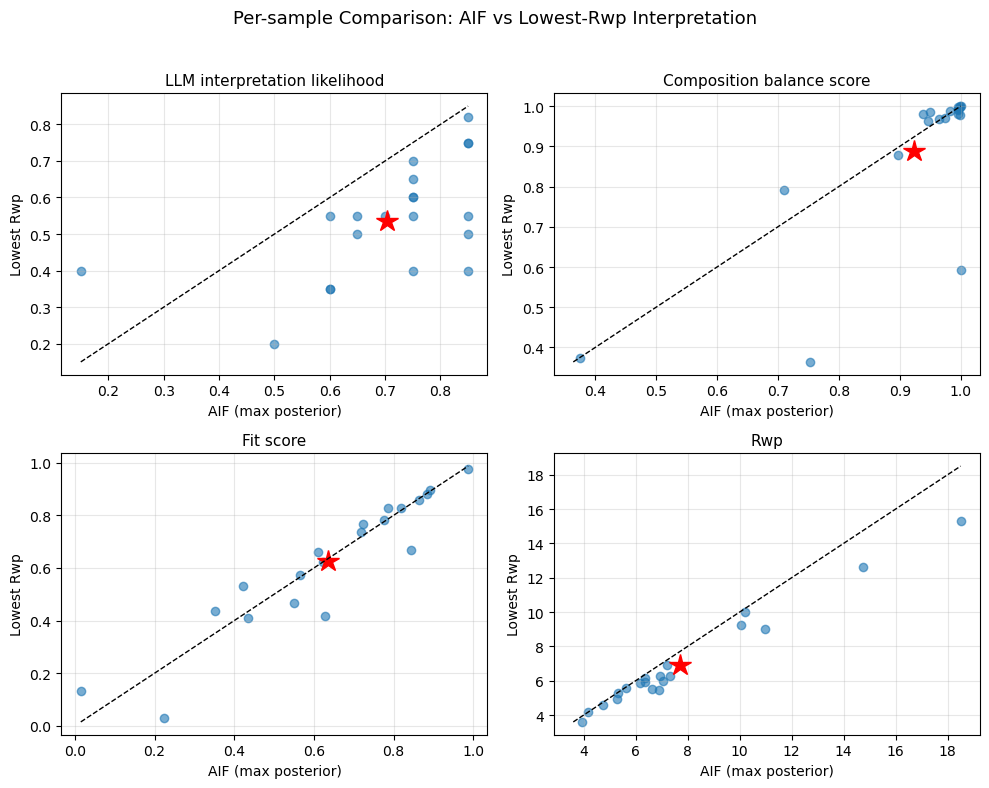

In [610]:
def plot_metric_scatter_grid(best_vs_low_df):
    metric_info = {
        "LLM_interpretation_likelihood": "LLM interpretation likelihood",
        "balance_score": "Composition balance score",
        "score": "Fit score",
        "rwp": "Rwp",
    }

    metrics = list(metric_info.keys())

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.ravel()

    for ax, m in zip(axes, metrics):
        x = best_vs_low_df[f"{m}_aif"].values
        y = best_vs_low_df[f"{m}_low"].values

        # Scatter of all samples
        ax.scatter(x, y, alpha=0.6, label="Samples")

        # Plot the average point
        ax.plot(
            np.mean(x),
            np.mean(y),
            marker="*", markersize=16,
            color="red", label="Mean"
        )

        # Diagonal reference
        mn, mx = min(x.min(), y.min()), max(x.max(), y.max())
        ax.plot([mn, mx], [mn, mx], "k--", linewidth=1)

        ax.set_xlabel("AIF (max posterior)", fontsize=10)
        ax.set_ylabel("Lowest Rwp", fontsize=10)
        ax.set_title(metric_info[m], fontsize=11)

        ax.grid(alpha=0.3)

    fig.suptitle("Per-sample Comparison: AIF vs Lowest-Rwp Interpretation", fontsize=13)
    fig.tight_layout(rect=[0, 0.0, 1, 0.96])
    return fig
fig_metrics = plot_metric_scatter_grid(best_vs_low_df)
plt.show()

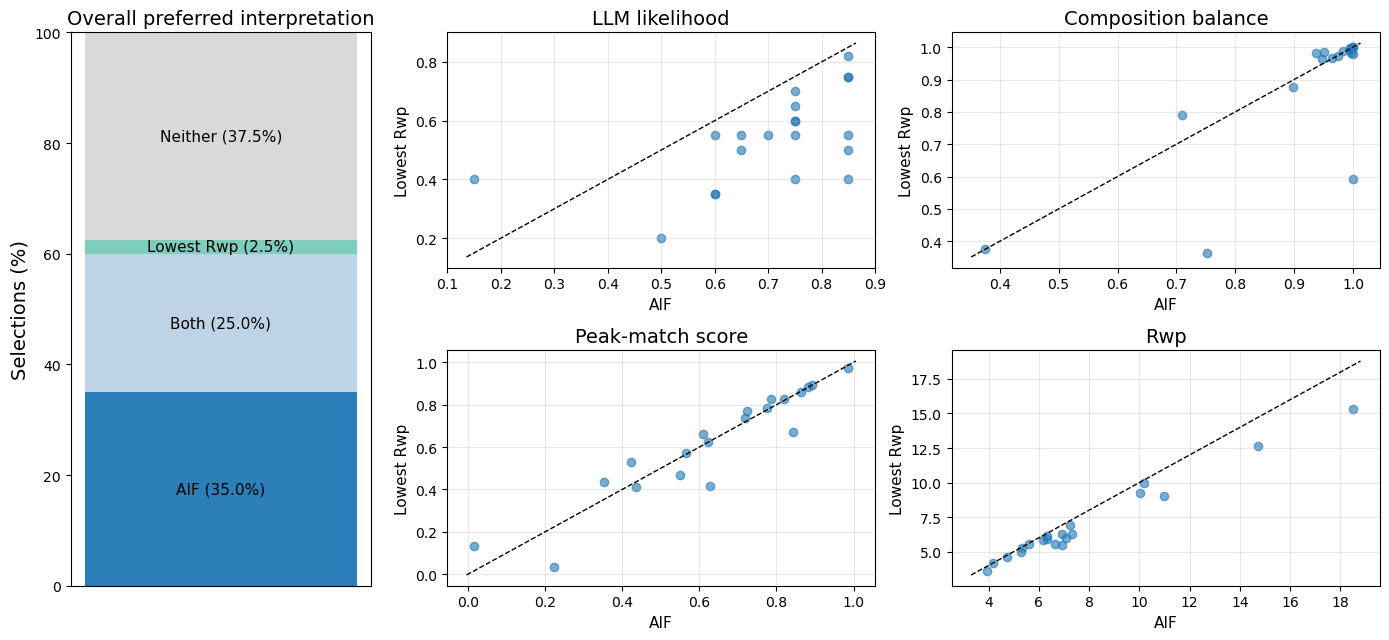

In [611]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_overall_and_metric_grid(overall, colors, best_vs_low_df):
    """
    LEFT  : overall stacked bar (AIF / Both / Lowest Rwp / Neither)
    RIGHT : 2x2 scatter grid comparing AIF vs Lowest-Rwp for 4 metrics
    """

    # ---- figure + layout: left column + 2x2 on the right ----
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(
        2, 3,            # 2 rows, 3 cols
        width_ratios=[0.7, 1, 1],  # left a bit wider
        height_ratios=[1, 1],
        figure=fig
    )

    # ===================== LEFT: OVERALL STACKED BAR =====================
    ax_overall = fig.add_subplot(gs[:, 0])  # span both rows in first column

    overall_order = ["AIF", "Both", "Lowest Rwp", "Neither"]
    bottom = 0.0
    for cat in overall_order:
        if cat not in overall:
            continue
        h = float(overall[cat])
        ax_overall.bar(0, h, bottom=bottom, color=colors[cat])
        if h > 0.5:
            ax_overall.text(
                0, bottom + h / 2.0,
                f"{cat} ({h:.1f}%)",
                ha="center", va="center", fontsize=11
            )
        bottom += h

    ax_overall.set_ylim(0, 100)
    ax_overall.set_xticks([])
    ax_overall.set_ylabel("Selections (%)", fontsize=14)
    ax_overall.set_title("Overall preferred interpretation", fontsize=14)

    # small legend inside
    from matplotlib.patches import Patch
    handles = [Patch(color=colors[c], label=c) for c in overall_order if c in overall]
    # ax_overall.legend(handles=handles, frameon=True, loc="upper right", fontsize=9)

    # ===================== RIGHT: 4 METRIC SCATTERS =====================
    metric_info = {
        "LLM_interpretation_likelihood": "LLM likelihood",
        "balance_score": "Composition balance",
        "score": "Peak-match score",
        "rwp": "Rwp",
    }
    metrics = list(metric_info.keys())

    # create 4 axes in the remaining 2x2 cells
    axes = [
        fig.add_subplot(gs[0, 1]),
        fig.add_subplot(gs[0, 2]),
        fig.add_subplot(gs[1, 1]),
        fig.add_subplot(gs[1, 2]),
    ]

    for ax, m in zip(axes, metrics):
        x = best_vs_low_df[f"{m}_aif"].values
        y = best_vs_low_df[f"{m}_low"].values

        # all samples
        ax.scatter(x, y, alpha=0.6, label="Samples")

        # mean point
        # ax.plot(
        #     np.mean(x), np.mean(y),
        #     marker="*", markersize=14,
        #     color="red", label="Mean"
        # )

        # diagonal
        mn, mx = min(x.min(), y.min()), max(x.max(), y.max())
        pad = 0.02 * (mx - mn if mx > mn else 1.0)
        ax.plot([mn - pad, mx + pad], [mn - pad, mx + pad], "k--", linewidth=1)

        ax.set_xlabel("AIF", fontsize=11)
        ax.set_ylabel("Lowest Rwp", fontsize=11)
        ax.set_title(metric_info[m], fontsize=14)
        ax.grid(alpha=0.3)

    # add a single legend for the scatter plots (take from first axis)
    # axes[0].legend(frameon=True, fontsize=8)

    # fig.suptitle("Overall preferences (left) and AIF vs Lowest-Rwp metrics (right)", fontsize=15)
    fig.tight_layout(rect=[0, 0.02, 1, 0.95])

    return fig
colors = {
    "AIF": "#2C7FB8",
    "Lowest Rwp": "#7FCDBB",
    "Both": "#BFD3E6",
    "Neither": "#D9D9D9",
}

fig = plot_overall_and_metric_grid(
    overall=overall,
    colors=colors,
    best_vs_low_df=best_vs_low_df
)
plt.show()

In [612]:
import numpy as np

metric_info = {
    "LLM_interpretation_likelihood": "LLM likelihood",
    "balance_score": "Composition balance",
    "score": "Peak-match score",
    "rwp": "Rwp",
}

for m, name in metric_info.items():
    x = best_vs_low_df[f"{m}_aif"].values   # AIF
    y = best_vs_low_df[f"{m}_low"].values   # Lowest-Rwp

    if m == "rwp":
        # lower is better
        aif_better = x < y
        diff = y - x   # positive = AIF has lower Rwp
    else:
        # higher is better
        aif_better = x > y
        diff = x - y   # positive = AIF has higher score

    frac_aif_better = np.mean(aif_better)
    mean_diff = np.mean(diff)
    print(f"{name}: AIF better in {frac_aif_better*100:.1f}% of samples, "
          f"mean difference = {mean_diff:.3f}")

LLM likelihood: AIF better in 95.0% of samples, mean difference = 0.166
Composition balance: AIF better in 50.0% of samples, mean difference = 0.034
Peak-match score: AIF better in 45.0% of samples, mean difference = 0.011
Rwp: AIF better in 0.0% of samples, mean difference = -0.783


In [613]:
import pandas as pd

metric_info = {
    "LLM_interpretation_likelihood": "LLM likelihood",
    "balance_score": "Composition balance",
    "score": "Peak-match score",
    "rwp": "Rwp"
}

extremes = {}

for m, name in metric_info.items():
    x = best_vs_low_df[f"{m}_aif"]
    y = best_vs_low_df[f"{m}_low"]
    
    # which direction means "better"?
    if m == "rwp":
        diff = y - x   # positive = AIF better (lower Rwp)
    else:
        diff = x - y   # positive = AIF better (higher score)
    
    df_tmp = pd.DataFrame({
        "sample": best_vs_low_df["sample_name"] if "sample_name" in best_vs_low_df.columns else best_vs_low_df.index,
        "aif": x,
        "low": y,
        "diff": diff
    })
    
    best_case = df_tmp.loc[df_tmp["diff"].idxmax()]
    worst_case = df_tmp.loc[df_tmp["diff"].idxmin()]
    
    extremes[name] = {
        "AIF much better": best_case,
        "Lowest-Rwp much better": worst_case
    }

# Display neatly
for metric, info in extremes.items():
    print("\n======", metric, "======")
    print("AIF much better:")
    print(info["AIF much better"], "\n")
    print("Lowest-Rwp much better:")
    print(info["Lowest-Rwp much better"])


====== LLM likelihood ======
AIF much better:
sample    TRI_28
aif         0.85
low          0.4
diff        0.45
Name: TRI_28, dtype: object 

Lowest-Rwp much better:
sample    ARR_45
aif         0.15
low          0.4
diff       -0.25
Name: ARR_45, dtype: object

====== Composition balance ======
AIF much better:
sample     TRI_104
aif       0.999822
low       0.592593
diff       0.40723
Name: TRI_104, dtype: object 

Lowest-Rwp much better:
sample     ARR_46
aif        0.7093
low       0.79164
diff     -0.08234
Name: ARR_46, dtype: object

====== Peak-match score ======
AIF much better:
sample      TRI_28
aif        0.62693
low       0.416152
diff      0.210778
Name: TRI_28, dtype: object 

Lowest-Rwp much better:
sample      ARR_45
aif       0.015005
low       0.131188
diff     -0.116183
Name: ARR_45, dtype: object

====== Rwp ======
AIF much better:
sample    ARR_194
aif          4.17
low          4.15
diff        -0.02
Name: ARR_194, dtype: object 

Lowest-Rwp much better:
sample

In [614]:
thresholds = [0.05, 0.10, 0.30]

metric_info = {
    "LLM_interpretation_likelihood": "LLM likelihood",
    "balance_score": "Composition balance",
    "score": "Peak-match score",
    "rwp": "Rwp"
}

for m, name in metric_info.items():
    x = best_vs_low_df[f"{m}_aif"].values
    y = best_vs_low_df[f"{m}_low"].values
    
    # diff in "better" direction
    diff = (x - y) if m != "rwp" else (y - x)

    absdiff = np.abs(diff)

    print(f"\n===== {name} =====")
    for t in thresholds:
        count = np.sum(absdiff < t)
        print(f"Samples with |difference| < {t}: {count} ({count/len(diff)*100:.1f}%)")
    
    big = np.where(absdiff > 0.30)[0]
    if len(big) > 0:
        print("\nLarge-difference samples (>0.3):")
        for idx in big:
            sample = (
                best_vs_low_df["sample_name"].iloc[idx]
                if "sample_name" in best_vs_low_df.columns
                else idx
            )
            print(f"  {sample}: AIF={x[idx]:.3f}, Lowest={y[idx]:.3f}, diff={diff[idx]:.3f}")
    else:
        print("No large-difference samples (>0.3)")


===== LLM likelihood =====
Samples with |difference| < 0.05: 2 (10.0%)
Samples with |difference| < 0.1: 7 (35.0%)
Samples with |difference| < 0.3: 16 (80.0%)

Large-difference samples (>0.3):
  9: AIF=0.850, Lowest=0.400, diff=0.450
  12: AIF=0.750, Lowest=0.400, diff=0.350
  14: AIF=0.850, Lowest=0.500, diff=0.350

===== Composition balance =====
Samples with |difference| < 0.05: 17 (85.0%)
Samples with |difference| < 0.1: 18 (90.0%)
Samples with |difference| < 0.3: 18 (90.0%)

Large-difference samples (>0.3):
  10: AIF=1.000, Lowest=0.593, diff=0.407
  13: AIF=0.753, Lowest=0.364, diff=0.389

===== Peak-match score =====
Samples with |difference| < 0.05: 12 (60.0%)
Samples with |difference| < 0.1: 15 (75.0%)
Samples with |difference| < 0.3: 20 (100.0%)
No large-difference samples (>0.3)

===== Rwp =====
Samples with |difference| < 0.05: 2 (10.0%)
Samples with |difference| < 0.1: 3 (15.0%)
Samples with |difference| < 0.3: 6 (30.0%)

Large-difference samples (>0.3):
  0: AIF=6.180, Lo

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_94713/622359050.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


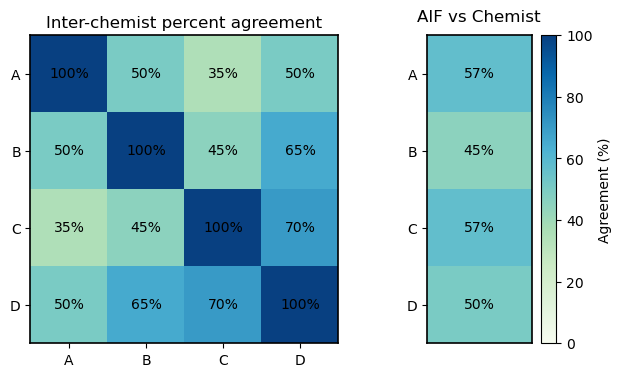

In [509]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_agreement_panels_vertical_final(
    agree_df,
    aif_agree_pct,
    chem_order=("A","B","C","D"),
    cmap="GnBu"
):
    """
    Final publication-style plot:
      Left:  Inter-chemist % agreement
      Right: AIF vs Chemist vertical strip (same colormap)
      Shared colorbar on the far right
      Black borders around both heatmaps
    """

    # --- prepare data ---
    M = agree_df.loc[list(chem_order), list(chem_order)].to_numpy(dtype=float)
    v = np.array([aif_agree_pct[c] for c in chem_order], dtype=float)
    v_strip = v[:, None]

    # --- layout ---
    fig = plt.figure(figsize=(7.8, 4))
    gs = fig.add_gridspec(1, 3, width_ratios=[3.1, 0.7, 0.1], wspace=0.05)

    # Left: inter-chemist agreement
    ax0 = fig.add_subplot(gs[0, 0])
    im = ax0.imshow(M, vmin=0, vmax=100, cmap=cmap)
    ax0.set_xticks(range(len(chem_order)))
    ax0.set_yticks(range(len(chem_order)))
    ax0.set_xticklabels(chem_order)
    ax0.set_yticklabels(chem_order)
    ax0.set_title("Inter-chemist percent agreement", fontsize=12)
    for r in range(M.shape[0]):
        for c in range(M.shape[1]):
            ax0.text(c, r, f"{M[r,c]:.0f}%", ha="center", va="center", fontsize=10)
    # keep black frame
    for spine in ax0.spines.values():
        spine.set_color("black")
        spine.set_linewidth(1.2)

    # Right: AIF vs Chemist vertical strip
    ax1 = fig.add_subplot(gs[0, 1])
    im1 = ax1.imshow(v_strip, vmin=0, vmax=100, cmap=cmap, aspect="auto")
    ax1.set_xticks([])
    ax1.set_yticks(range(len(chem_order)))
    ax1.set_yticklabels(chem_order)
    ax1.set_title("AIF vs Chemist", fontsize=12, pad=10)
    # annotate % values
    for i, val in enumerate(v_strip[:, 0]):
        ax1.text(0, i, f"{val:.0f}%", ha="center", va="center", fontsize=10, color="black")
    # keep black frame
    for spine in ax1.spines.values():
        spine.set_color("black")
        spine.set_linewidth(1.2)

    # shared colorbar on far right
    ax_cb = fig.add_subplot(gs[0, 2])
    cbar = fig.colorbar(im1, cax=ax_cb)
    cbar.set_label("Agreement (%)")

    plt.tight_layout()
    plt.show()

aif_vs_chem = {"A": 57, "B": 45, "C": 57, "D": 50}
plot_agreement_panels_vertical_final(agree, aif_vs_chem)

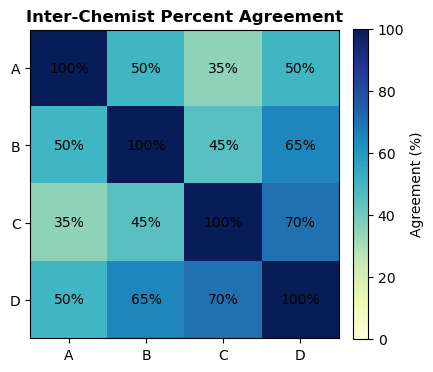

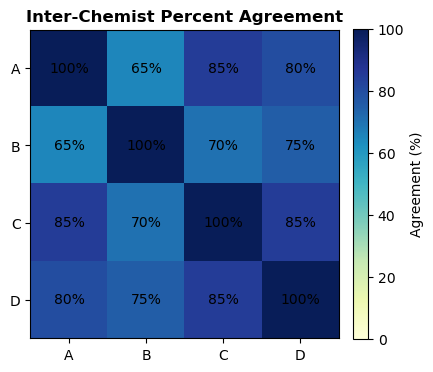

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 🧠 1. Canonical label setup and helper functions
# ============================================================

CATS = {"aif": "AIF", "dara": "Lowest Rwp",
        "both a & b": "Both", "neither a nor b": "Neither"}

def _preferred_series(df, decoding_df, choice_col="Prefered Interpretation",
                      name_col="Run Name in ALAB"):
    """Return canonical interpretation labels indexed by normalized sample name."""
    df = df.copy()
    df["Interpretation A decoding"] = decoding_df["Interpretation A"]
    df["Interpretation B decoding"] = decoding_df["Interpretation B"]

    def pick(row):
        choice = str(row[choice_col]).strip().lower()
        if choice == "a":
            raw = str(row["Interpretation A decoding"]).strip().lower()
        elif choice == "b":
            raw = str(row["Interpretation B decoding"]).strip().lower()
        elif "both" in choice:
            raw = "both a & b"
        elif "neither" in choice:
            raw = "neither a nor b"
        else:
            raw = ""
        return CATS.get(raw, np.nan)

    names = (df[name_col].astype(str)
             .str.strip()
             .str.replace(r"\s+", " ", regex=True))
    s = df.apply(pick, axis=1)
    s.index = names
    s = s.dropna()
    return s[~s.index.duplicated(keep="first")]

def _build_wide(evals_by_chem, decoding_df):
    """Build a single table with all chemists’ canonical selections."""
    series = [_preferred_series(df, decoding_df).rename(chem)
              for chem, df in evals_by_chem.items()]
    return pd.concat(series, axis=1)

# ============================================================
# ⚖️ 2. Agreement functions
# ============================================================

def _agree_strict(x, y):
    """Full agreement only if identical labels."""
    return str(x) == str(y)

def _agree_lenient(x, y):
    """'Both' counts as agreement with AIF or Lowest Rwp."""
    x, y = str(x), str(y)
    if x == y:
        return True
    if (x == "Both" and y in {"AIF", "Lowest Rwp"}) or \
       (y == "Both" and x in {"AIF", "Lowest Rwp"}):
        return True
    return False

def compute_agreement_matrix(wide, chems=("A","B","C","D"), mode="strict"):
    """Compute pairwise % agreement matrix (strict or lenient)."""
    fn = _agree_strict if mode == "strict" else _agree_lenient
    agree = pd.DataFrame(index=chems, columns=chems, dtype=float)

    for i in chems:
        for j in chems:
            both = wide[[i, j]].dropna()
            if both.empty:
                agree.loc[i, j] = np.nan
                continue
            matches = [fn(a, b) for a, b in zip(both[i], both[j])]
            agree.loc[i, j] = 100.0 * np.mean(matches)
    return agree

# ============================================================
# 🎨 3. Plotting
# ============================================================

def plot_agreement(agree, cmap="YlGnBu"):
    chems = list(agree.index)
    fig, ax = plt.subplots(figsize=(4.4, 4.0))
    im = ax.imshow(agree.values.astype(float), vmin=0, vmax=100, cmap=cmap)
    ax.set_xticks(range(len(chems))); ax.set_yticks(range(len(chems)))
    ax.set_xticklabels(chems); ax.set_yticklabels(chems)
    ax.set_title("Inter-Chemist Percent Agreement", fontweight="bold")
    for r in range(len(chems)):
        for c in range(len(chems)):
            v = agree.iloc[r, c]
            if not pd.isna(v):
                ax.text(c, r, f"{v:.0f}%", ha="center", va="center", fontsize=10)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Agreement (%)")
    plt.tight_layout()
    plt.show()

# ============================================================
# 🚀 4. Run the analysis
# ============================================================

evals = {
    "A": evaluation_Amalie,
    "B": evaluation,
    "C": evaluation_Steven,
    "D": evaluation_Amanda,
}

wide = _build_wide(evals, decoding)

# strict: only exact matches count as agreement
agree_strict = compute_agreement_matrix(wide, mode="strict")
plot_agreement(agree_strict)

# lenient: “Both” counts as agreeing with AIF or Lowest Rwp
agree_lenient = compute_agreement_matrix(wide, mode="lenient")
plot_agreement(agree_lenient)

In [558]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_strict_agreement_with_per_chemist(agree_strict,
                                           summary_df,
                                           chem_order=("A","B","C","D"),
                                           cats_order=("AIF","Both","Lowest Rwp","Neither"),
                                           colors=None,
                                           cmap="YlGnBu",
                                           filename=None):
    """
    Combined figure:
      - Left: strict inter-chemist % agreement heatmap
      - Right: per-chemist preferred interpretation bars
    """
    if colors is None:
        colors = {
            "AIF": "#2C7FB8",
            "Lowest Rwp": "#7FCDBB",
            "Both": "#BFD3E6",
            "Neither": "#D9D9D9",
        }

    # ------------------------------------------------------
    # Figure layout: two panels side by side
    # ------------------------------------------------------
    fig, (axL, axR) = plt.subplots(
        1, 2, figsize=(11, 4.6),
        gridspec_kw={"width_ratios": [1, 2]}
    )
    fig.subplots_adjust(wspace=0.4)

    # ------------------------------------------------------
    # LEFT: strict agreement heatmap
    # ------------------------------------------------------
    chems = list(agree_strict.index)
    im = axL.imshow(agree_strict.values.astype(float),
                    vmin=0, vmax=100, cmap=cmap)

    axL.set_xticks(range(len(chems)))
    axL.set_yticks(range(len(chems)))
    axL.set_xticklabels(chems)
    axL.set_yticklabels(chems)
    axL.set_title("Inter-Chemist Percent Agreement", fontweight="bold")

    # annotate cells
    for r in range(len(chems)):
        for c in range(len(chems)):
            v = agree_strict.iloc[r, c]
            if not np.isnan(v):
                axL.text(c, r, f"{v:.0f}%", ha="center", va="center", fontsize=10)

    # cbar = plt.colorbar(im, ax=axL, fraction=0.046, pad=0.04)
    # cbar.set_label("Agreement (%)")
    # Add colorbar at the very bottom of the whole figure
    # Get the position of the heatmap axis (axL)
    pos = axL.get_position()

    # Create a new axis *below* the heatmap
    cbar_ax = fig.add_axes([
        pos.x0 - 0.07,                 # x-position
        pos.y0 - 0.1,          # move below heatmap (adjust this value)
        pos.width + 0.02,              # same width as heatmap
        0.03                    # height of the colorbar
    ])

    # Draw the colorbar in that space
    cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
    cbar.set_label("Agreement (%)", fontsize=12)

    # ------------------------------------------------------
    # RIGHT: per-chemist preferred interpretation bars
    # (basically your plot_composite right panel,
    #  but without the overall bar)
    # ------------------------------------------------------
    x = np.arange(len(chem_order))
    w = 0.18

    for i, cat in enumerate(cats_order):
        y = [summary_df.loc[cat, ch] for ch in chem_order]
        axR.bar(
            x + (i - (len(cats_order) - 1) / 2.0) * w,
            y,
            width=w,
            color=colors[cat],
            label=cat
        )
        # annotate %
        for j, v in enumerate(y):
            axR.text(
                x[j] + (i - (len(cats_order) - 1) / 2.0) * w,
                v + 1.2,
                f"{v:.1f}%",
                ha="center", va="bottom", fontsize=10
            )

    axR.set_ylim(0, 100)
    axR.set_ylabel("Selections (%)", fontsize=13)
    axR.set_xlabel("Chemists", fontsize=13)
    axR.set_xticks(x)
    axR.set_xticklabels(chem_order)
    axR.set_title("Chemist-preferred interpretation by category", fontweight="bold")

    # ------------------------------------------------------
    # Legend for colors (since no overall stacked bar)
    # ------------------------------------------------------
    handles = [mpatches.Patch(color=colors[cat], label=cat) for cat in cats_order]
    # axR.legend(
    #     handles=handles,
    #     title="",
    #     frameon=False,
    #     loc="upper center",
    #     bbox_to_anchor=(0.5, -0.15),
    #     ncols=len(cats_order)
    # )
    axR.legend(
    handles=handles,
    title="",
    frameon=True,                 # draw the frame
    loc="upper right",            # inside the top-right
    fontsize=10,
    title_fontsize=10
)
    plt.tight_layout()

    if filename:
        fig.savefig(filename, dpi=300, bbox_inches="tight")

    return fig

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_94713/2242157061.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


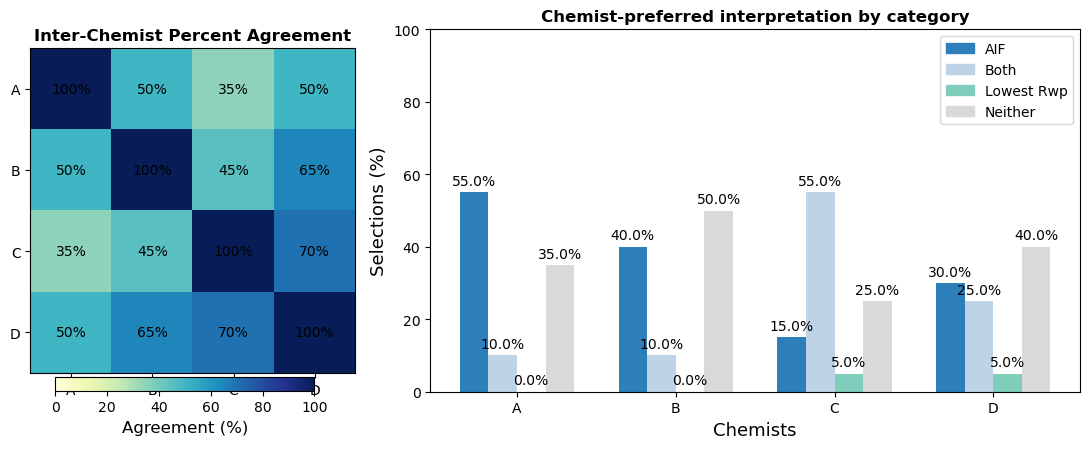

In [559]:
agree_strict = compute_agreement_matrix(wide, mode="strict")

colors = {
    "AIF": "#2C7FB8",
    "Lowest Rwp": "#7FCDBB",
    "Both": "#BFD3E6",
    "Neither": "#D9D9D9",
}

fig = plot_strict_agreement_with_per_chemist(
    agree_strict,
    summary_df,
    chem_order=["A","B","C","D"],
    cats_order=["AIF","Both","Lowest Rwp","Neither"],
    colors=colors,
    filename=None
)
plt.show()

In [629]:
trust_df

,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,ratio
0,PG_1245_1,0.524553,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,9.359967
1,PG_1040_1,0.624268,0.55,45334.765534,347.299712,0.983100,8.0,6.0,130.534993
2,PG_1450_1,0.353040,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,10.570275
3,ARR_112,0.410321,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,7.411894
4,ARR_101,0.240572,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,4.686826
5,ARR_124,0.288347,0.60,11808.571246,2321.104917,0.578000,27.0,7.0,5.087478
6,ARR_66,0.343655,0.50,9075.926764,1262.274809,0.256000,19.0,0.0,7.190135
7,ARR_75,0.459609,0.50,15339.416369,1221.256767,0.950500,22.0,4.0,12.560353
8,ARR_54,0.645578,0.85,31628.674887,720.711209,0.983125,5.0,6.0,43.885366
9,ARR_176,0.385013,0.75,10292.311678,1594.351397,0.999877,20.0,7.0,6.455485


In [632]:
trust_df_with_flag

,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,ratio,trustworthiness
0,PG_1245_1,0.524553,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,9.359967,False
1,PG_1040_1,0.624268,0.55,45334.765534,347.299712,0.983100,8.0,6.0,130.534993,False
2,PG_1450_1,0.353040,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,10.570275,False
3,ARR_112,0.410321,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,7.411894,False
4,ARR_101,0.240572,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,4.686826,False
5,ARR_124,0.288347,0.60,11808.571246,2321.104917,0.578000,27.0,7.0,5.087478,False
6,ARR_66,0.343655,0.50,9075.926764,1262.274809,0.256000,19.0,0.0,7.190135,False
7,ARR_75,0.459609,0.50,15339.416369,1221.256767,0.950500,22.0,4.0,12.560353,False
8,ARR_54,0.645578,0.85,31628.674887,720.711209,0.983125,5.0,6.0,43.885366,False
9,ARR_176,0.385013,0.75,10292.311678,1594.351397,0.999877,20.0,7.0,6.455485,False


In [636]:
import numpy as np
import pandas as pd

# ----------------------------
# 0) Your function (paste/keep as-is)
# ----------------------------
def compute_trust_score(interpretations: dict) -> dict:
    """
    Adds a 'trust_score' field to each interpretation, ranging from 0 (not trustworthy) to 1 (fully trustworthy),
    based on six soft criteria:
        - LLM likelihood (>= 0.4)
        - Signal above background score (>= 9000)
        - Background overshoot score (<= 1200)
        - Signal-to-overshoot ratio (>= 15)
        - Balance score (>= 0.6)
        - Peak match score (normalized_score >= 0.6)  [currently commented out]

    Trust score is 1 - average of penalties (each in [0, 1]).
    """
    for key, interp in interpretations.items():
        try:
            llm = float(interp.get("LLM_interpretation_likelihood", 1.0))
            signal = float(interp.get("signal_above_bkg_score", 10000.0))
            overshoot = float(interp.get("bkg_overshoot_score", 0.0))
            balance = float(interp.get("balance_score", 1.0))
            # score = float(interp.get("normalized_score", 1.0))
        except (TypeError, ValueError):
            interp["trust_score"] = 0.0
            continue

        penalty_llm = max(0.0, min(1.0, (0.41 - llm) / 0.41))
        penalty_signal = max(0.0, min(1.0, (9000 - signal) / 9000))
        penalty_overshoot = max(0.0, min(1.0, (overshoot - 1200) / 1200)) if overshoot > 0 else 0.0

        if overshoot > 0:
            ratio = signal / overshoot
            penalty_ratio = max(0.0, min(1.0, (15 - ratio) / 15))
        else:
            penalty_ratio = 0.0

        penalty_balance = max(0.0, min(1.0, (0.6 - balance) / 0.6))

        total_penalty = (penalty_llm + penalty_signal + penalty_overshoot + penalty_ratio + penalty_balance) / 6.0
        interp["trust_score"] = round(max(0.0, 1.0 - total_penalty), 6)

    return interpretations


# ----------------------------
# 1) Save to CSV
# ----------------------------
out_csv = "trust_df_with_flag.csv"
trust_df_with_flag.to_csv(out_csv, index=False)
print(f"Saved: {out_csv}  (rows={len(trust_df_with_flag)}, cols={len(trust_df_with_flag.columns)})")


# ----------------------------
# 2) Recompute trust_prob_check USING compute_trust_score()
# ----------------------------
def compute_trust_prob_check_from_df_via_function(df: pd.DataFrame) -> pd.Series:
    """
    Builds a dict in the format expected by compute_trust_score(), computes trust_score,
    and returns it as a Series aligned to df rows.

    This uses:
      df['llm'] -> LLM_interpretation_likelihood
      df['signal'] -> signal_above_bkg_score
      df['overshoot'] -> bkg_overshoot_score
      df['balance'] -> balance_score
    """
    # Create interpretations dict keyed by row index (string keys are fine)
    interps = {}
    for i, row in df.iterrows():
        interps[str(i)] = {
            "LLM_interpretation_likelihood": row.get("llm", 1.0),
            "signal_above_bkg_score": row.get("signal", 10000.0),
            "bkg_overshoot_score": row.get("overshoot", 0.0),
            "balance_score": row.get("balance", 1.0),
            # "normalized_score": row.get("normalized_score", 1.0),  # if you ever add it back
        }

    interps_out = compute_trust_score(interps)
    vals = [interps_out[str(i)].get("trust_score", np.nan) for i in range(len(df))]
    return pd.Series(vals, index=df.index, name="trust_prob_check")


trust_df_with_flag = trust_df_with_flag.copy()
trust_df_with_flag["trust_prob_check"] = compute_trust_prob_check_from_df_via_function(trust_df_with_flag)


# ----------------------------
# 3) Compare to existing trust_prob
# ----------------------------
orig = pd.to_numeric(trust_df_with_flag["trust_prob"], errors="coerce")
new = pd.to_numeric(trust_df_with_flag["trust_prob_check"], errors="coerce")

diff = (orig - new).abs()
print("\n=== Comparison: trust_prob vs trust_prob_check (via compute_trust_score) ===")
print("non-null pairs:", int((orig.notna() & new.notna()).sum()))
print("max abs diff:", float(diff.max(skipna=True)))
print("mean abs diff:", float(diff.mean(skipna=True)))
print("allclose(atol=1e-6):", np.allclose(orig.fillna(-999), new.fillna(-999), atol=1e-6, rtol=0))

print("\nTop 10 rows by abs diff:")
cols_to_show = ["Name", "trust_prob", "trust_prob_check", "llm", "signal", "overshoot", "balance", "ratio"]
print(trust_df_with_flag.loc[diff.sort_values(ascending=False).head(10).index, cols_to_show])

Saved: trust_df_with_flag.csv  (rows=55, cols=12)

=== Comparison: trust_prob vs trust_prob_check (via compute_trust_score) ===
non-null pairs: 55
max abs diff: 0.5456314556858667
mean abs diff: 0.3511422263661517
allclose(atol=1e-6): False

Top 10 rows by abs diff:
       Name  trust_prob  trust_prob_check   llm        signal    overshoot  \
21  ARR_212    0.306651          0.852282  0.35   8869.463408  1383.444234   
7    ARR_75    0.459609          0.969940  0.50  15339.416369  1221.256767   
54   ARR_46    0.376196          0.879784  0.55  14991.822959  1610.333769   
50  TRI_113    0.368889          0.850897  0.35  18399.303923  1742.611545   
11  ARR_168    0.522242          1.000000  0.80  10724.298757   691.421085   
14  ARR_110    0.413517          0.883277  0.75  10841.319906  1441.905636   
24  ARR_170    0.422622          0.889955  0.50   4396.035243   344.268722   
6    ARR_66    0.343655          0.809019  0.50   9075.926764  1262.274809   
9   ARR_176    0.385013        

In [640]:
import json
import numpy as np
import pandas as pd

# -------------------------
# Trust parameters (adaptive, weighted, sigmoid + temperature)
# -------------------------
LLM_THR, LLM_SCALE = 0.4, 0.1
SIGNAL_THR, SIGNAL_SCALE = 9000.0, 2000.0
OVERSHOOT_THR, OVERSHOOT_SCALE = 1200.0, 300.0
RATIO_THR, RATIO_SCALE = 15.0, 3.0
BALANCE_THR, BALANCE_SCALE = 0.6, 0.1

# NEW: peak-count penalties (0 is ideal; higher is worse)
MISSING_THR, MISSING_SCALE = 0.0, 2.0
EXTRA_THR,   EXTRA_SCALE   = 0.0, 1.0   # smaller scale => harsher penalty per extra peak

# temperature for logit scaling
TEMPERATURE = 1.25

# Optional weights (let extra peaks count more)
W_LLM = 1.0
W_SIGNAL = 1.0
W_OVERSHOOT = 1.0
W_RATIO = 1.0
W_BALANCE = 1.0
W_MISSING = 1.0
W_EXTRA = 1.5


def sigmoid(z):
    return 1/(1+np.exp(-z))

def soft_high(x, thr, scale):
    return float(sigmoid((x - thr) / max(scale, 1e-12)))

def soft_low(x, thr, scale):
    return float(sigmoid((thr - x) / max(scale, 1e-12)))


# -------------------------
# Feature extraction
# -------------------------
def _extract_components(interp: dict):
    """Return (comps, present) with floats and presence flags."""
    def _get(k): return interp.get(k, None)

    comps = {
        "llm": _get("LLM_interpretation_likelihood"),
        "signal": _get("signal_above_bkg_score"),
        "overshoot": _get("bkg_overshoot_score"),
        "balance": _get("balance_score"),
        "missing_peaks": _get("missing_peaks"),
        "extra_peaks": _get("extra_peaks"),
    }
    present = {k: (comps[k] is not None) for k in comps}

    # cast to float when possible
    for k in list(comps.keys()):
        if comps[k] is not None:
            try:
                comps[k] = float(comps[k])
            except Exception:
                comps[k] = None
                present[k] = False

    # ratio only if signal/overshoot valid and overshoot>0
    if present["signal"] and present["overshoot"] and comps["overshoot"] and comps["overshoot"] > 0:
        r = comps["signal"] / comps["overshoot"]
        comps["ratio"] = float(r) if np.isfinite(r) and r > 0 else None
    else:
        comps["ratio"] = None
    present["ratio"] = comps["ratio"] is not None

    return comps, present


# -------------------------
# Trust probability computation
# -------------------------
def distance_trust_probability(interp: dict):
    """
    Adaptive trust: use ANY available of
    {llm, signal, overshoot, ratio, balance, missing_peaks, extra_peaks}.
    Returns (trust_prob, components_dict). If nothing available -> NaN trust.
    """
    comps, present = _extract_components(interp)

    probs = []
    weights = []

    if present["llm"]:
        probs.append(soft_high(comps["llm"], LLM_THR, LLM_SCALE)); weights.append(W_LLM)
    if present["signal"]:
        probs.append(soft_high(comps["signal"], SIGNAL_THR, SIGNAL_SCALE)); weights.append(W_SIGNAL)
    if present["overshoot"]:
        probs.append(soft_low(comps["overshoot"], OVERSHOOT_THR, OVERSHOOT_SCALE)); weights.append(W_OVERSHOOT)
    if present["ratio"]:
        probs.append(soft_high(comps["ratio"], RATIO_THR, RATIO_SCALE)); weights.append(W_RATIO)
    if present["balance"]:
        probs.append(soft_high(comps["balance"], BALANCE_THR, BALANCE_SCALE)); weights.append(W_BALANCE)

    # Peaks (low is good). Extra peaks penalized more via scale + weight.
    if present["missing_peaks"]:
        probs.append(soft_low(comps["missing_peaks"], MISSING_THR, MISSING_SCALE)); weights.append(W_MISSING)
    if present["extra_peaks"]:
        probs.append(soft_low(comps["extra_peaks"], EXTRA_THR, EXTRA_SCALE)); weights.append(W_EXTRA)

    if len(probs) == 0:
        return np.nan, comps

    eps = 1e-6
    p = np.clip(np.array(probs, dtype=float), eps, 1 - eps)

    # temperature scaling in logit space
    logits = np.log(p / (1 - p))
    probs_t = 1 / (1 + np.exp(-logits / max(TEMPERATURE, 1e-6)))

    # weighted mean (adaptive to what's present)
    w = np.array(weights, dtype=float)
    trust = float(np.sum(w * probs_t) / np.sum(w))

    trust = float(np.clip(trust, 0.0, 1.0))
    return trust, comps


# -------------------------
# Load JSON interpretations + resolve AIF (max posterior) per sample
# -------------------------
def load_all_interps(json_paths):
    merged = {}
    for p in json_paths:
        with open(p, "r") as f:
            data = json.load(f)
        merged.update(data)  # latest wins on collision
    return merged

def resolve_aif_key(interps_for_sample: dict):
    best_key, best_post = None, -np.inf
    for k, v in interps_for_sample.items():
        post = v.get("posterior_probability")
        if post is None:
            continue
        try:
            post = float(post)
        except Exception:
            continue
        if post > best_post:
            best_post, best_key = post, k
    return best_key


# -------------------------
# Build trust_df (Name, trust_prob + components)
# -------------------------
def build_trust_df(json_paths):
    interps_raw = load_all_interps(json_paths)
    trust_rows = []

    for raw_name, d in interps_raw.items():
        name_std = normalize_name(raw_name)  # IMPORTANT: uses your existing name normalization
        aif_key = resolve_aif_key(d) if isinstance(d, dict) else None

        if aif_key is None or not isinstance(d, dict) or aif_key not in d:
            trust_rows.append({
                "Name": name_std, "trust_prob": np.nan,
                "llm": np.nan, "signal": np.nan, "overshoot": np.nan,
                "ratio": np.nan, "balance": np.nan,
                "missing_peaks": np.nan, "extra_peaks": np.nan
            })
            continue

        trust, comps = distance_trust_probability(d[aif_key])
        trust_rows.append({"Name": name_std, "trust_prob": trust, **comps})

    return pd.DataFrame(trust_rows)


# ======= RUN: rebuild trust_df and replace in your existing table =======
trust_df_rebuilt = build_trust_df(json_paths)

# save rebuilt trust_df for debugging
trust_df_rebuilt.to_csv("trust_df_rebuilt_sigmoid_peaks.csv", index=False)
print("Saved trust_df_rebuilt_sigmoid_peaks.csv")
print(trust_df_rebuilt.head())

# snapshot before replacing
trust_df_with_flag.to_csv("trust_df_with_flag_BEFORE_replace.csv", index=False)

# replace trust_prob in your existing df (keeping old)
trust_df_with_flag = trust_df_with_flag.copy()
trust_df_with_flag = trust_df_with_flag.merge(
    trust_df_rebuilt[["Name", "trust_prob"]],
    on="Name",
    how="left",
    suffixes=("", "_rebuilt")
)

trust_df_with_flag["trust_prob_old"] = trust_df_with_flag["trust_prob"]
trust_df_with_flag["trust_prob"] = trust_df_with_flag["trust_prob_rebuilt"]
trust_df_with_flag = trust_df_with_flag.drop(columns=["trust_prob_rebuilt"])

# save after
trust_df_with_flag.to_csv("trust_df_with_flag_AFTER_replace.csv", index=False)
print("Saved trust_df_with_flag_AFTER_replace.csv")

# quick diff summary
diff = (pd.to_numeric(trust_df_with_flag["trust_prob_old"], errors="coerce") -
        pd.to_numeric(trust_df_with_flag["trust_prob"], errors="coerce")).abs()

# print("\nDiff summary (old vs rebuilt trust_prob):")
# print("non-null pairs:", int((trust_df_with_flag["trust_prob_old"].notna() & trust_df_with_flag["trust_prob"].notna()).sum()))
# print("max abs diff:", float(diff.max(skipna=True)))
# print("mean abs diff:", float(diff.mean(skipna=True)))

# print("\nTop 10 rows by |Δ trust_prob|:")
# cols_show = ["Name","trust_prob_old","trust_prob","llm","signal","overshoot","ratio","balance","missing_peaks","extra_peaks"]
# print(trust_df_with_flag.loc[diff.sort_values(ascending=False).head(10).index, cols_show])

Saved trust_df_rebuilt_sigmoid_peaks.csv
        Name  trust_prob   llm        signal    overshoot   balance  \
0  PG_1245_1    0.524553  0.85  26848.867375  2868.478804  1.000000   
1  PG_1040_1    0.624268  0.55  45334.765534   347.299712  0.983100   
2  PG_1450_1    0.353040  0.40  35489.919085  3357.520968  0.375000   
3    ARR_112    0.410321  0.75  13714.458373  1850.331202  0.999032   
4    ARR_101    0.240572  0.25  18150.726741  3872.711755  0.589120   

   missing_peaks  extra_peaks       ratio  
0            7.0          0.0    9.359967  
1            8.0          6.0  130.534993  
2           10.0          0.0   10.570275  
3           11.0          5.0    7.411894  
4           50.0          4.0    4.686826  
Saved trust_df_with_flag_AFTER_replace.csv

Diff summary (old vs rebuilt trust_prob):
non-null pairs: 55
max abs diff: 0.5203564556858667
mean abs diff: 0.3356566445479699

Top 10 rows by |Δ trust_prob|:
       Name  trust_prob_old  trust_prob   llm        signal    o

In [642]:
#CALCULATING TRUST_PROB

import json
import numpy as np
import pandas as pd

# =========================
# Trust metric parameters
# =========================
LLM_THR, LLM_SCALE = 0.4, 0.1
SIGNAL_THR, SIGNAL_SCALE = 9000.0, 2000.0
OVERSHOOT_THR, OVERSHOOT_SCALE = 1200.0, 300.0
RATIO_THR, RATIO_SCALE = 15.0, 3.0
BALANCE_THR, BALANCE_SCALE = 0.6, 0.1


# Peaks penalties (0 is ideal; higher is worse)
MISSING_THR, MISSING_SCALE = 0.0, 2.0
EXTRA_THR,   EXTRA_SCALE   = 0.0, 1.0  # smaller scale => harsher penalty per extra peak

# Temperature for logit scaling
TEMPERATURE = 1.25

# Optional weights (extra peaks count more)
W_LLM = 1.0
W_SIGNAL = 1.0
W_OVERSHOOT = 1.0
W_RATIO = 1.0
W_BALANCE = 1.0
W_MISSING = 1.0
W_EXTRA = 1.5


# =========================
# Helpers
# =========================
def sigmoid(z: float) -> float:
    return 1.0 / (1.0 + np.exp(-z))

def soft_high(x: float, thr: float, scale: float) -> float:
    """Soft probability that x is 'high enough' (good if x >= thr)."""
    return float(sigmoid((x - thr) / max(scale, 1e-12)))

def soft_low(x: float, thr: float, scale: float) -> float:
    """Soft probability that x is 'low enough' (good if x <= thr)."""
    return float(sigmoid((thr - x) / max(scale, 1e-12)))


def extract_trust_components(interp: dict) -> tuple[dict, dict]:
    """Return (components dict, presence dict). Missing values are kept as None."""
    def _get(k): return interp.get(k, None)

    comps = {
        "llm": _get("LLM_interpretation_likelihood"),
        "signal": _get("signal_above_bkg_score"),
        "overshoot": _get("bkg_overshoot_score"),
        "balance": _get("balance_score"),
        "missing_peaks": _get("missing_peaks"),
        "extra_peaks": _get("extra_peaks"),
    }

    present = {k: comps[k] is not None for k in comps}

    # Cast to float where possible
    for k in list(comps.keys()):
        if comps[k] is not None:
            try:
                comps[k] = float(comps[k])
            except Exception:
                comps[k] = None
                present[k] = False

    # ratio only if signal and overshoot available and overshoot > 0
    if present["signal"] and present["overshoot"] and comps["overshoot"] and comps["overshoot"] > 0:
        r = comps["signal"] / comps["overshoot"]
        comps["ratio"] = float(r) if np.isfinite(r) and r > 0 else None
    else:
        comps["ratio"] = None
    present["ratio"] = comps["ratio"] is not None

    return comps, present


def trust_prob_for_interpretation(interp: dict) -> tuple[float, dict]:
    """
    Adaptive trust probability computed from any available subset of:
      llm, signal, overshoot, ratio, balance, missing_peaks, extra_peaks

    Returns (trust_prob, components_dict). If no components present -> (NaN, comps).
    """
    comps, present = extract_trust_components(interp)

    probs = []
    weights = []

    if present["llm"]:
        probs.append(soft_high(comps["llm"], LLM_THR, LLM_SCALE)); weights.append(W_LLM)
    if present["signal"]:
        probs.append(soft_high(comps["signal"], SIGNAL_THR, SIGNAL_SCALE)); weights.append(W_SIGNAL)
    if present["overshoot"]:
        probs.append(soft_low(comps["overshoot"], OVERSHOOT_THR, OVERSHOOT_SCALE)); weights.append(W_OVERSHOOT)
    if present["ratio"]:
        probs.append(soft_high(comps["ratio"], RATIO_THR, RATIO_SCALE)); weights.append(W_RATIO)
    if present["balance"]:
        probs.append(soft_high(comps["balance"], BALANCE_THR, BALANCE_SCALE)); weights.append(W_BALANCE)

    # Peaks: low is good
    if present["missing_peaks"]:
        probs.append(soft_low(comps["missing_peaks"], MISSING_THR, MISSING_SCALE)); weights.append(W_MISSING)
    if present["extra_peaks"]:
        probs.append(soft_low(comps["extra_peaks"], EXTRA_THR, EXTRA_SCALE)); weights.append(W_EXTRA)

    if len(probs) == 0:
        return np.nan, comps

    eps = 1e-6
    p = np.clip(np.array(probs, dtype=float), eps, 1 - eps)

    # Temperature scaling in logit space
    logits = np.log(p / (1 - p))
    probs_t = 1.0 / (1.0 + np.exp(-logits / max(TEMPERATURE, 1e-6)))

    # Weighted mean (adaptive to what's present)
    w = np.array(weights, dtype=float)
    trust = float(np.sum(w * probs_t) / np.sum(w))
    trust = float(np.clip(trust, 0.0, 1.0))

    return trust, comps


def load_all_interps(json_paths: list[str]) -> dict:
    """Load and merge multiple JSON dicts; later files override earlier ones on key collision."""
    merged = {}
    for p in json_paths:
        with open(p, "r") as f:
            merged.update(json.load(f))
    return merged


def resolve_aif_key(interps_for_sample: dict) -> str | None:
    """Return the interpretation key with the maximum posterior_probability."""
    best_key, best_post = None, -np.inf
    for k, v in interps_for_sample.items():
        post = v.get("posterior_probability", None)
        if post is None:
            continue
        try:
            post = float(post)
        except Exception:
            continue
        if post > best_post:
            best_post, best_key = post, k
    return best_key


# =========================
# Main: build trust_df
# =========================
def build_trust_df(json_paths: list[str], include_components: bool = True) -> pd.DataFrame:
    """
    Build a DataFrame with one row per sample:
      Name, trust_prob
    Optionally includes raw diagnostic components (llm, signal, overshoot, ratio, balance, missing_peaks, extra_peaks).
    """
    interps_raw = load_all_interps(json_paths)
    rows = []

    for raw_name, d in interps_raw.items():
        name_std = normalize_name(raw_name)

        if not isinstance(d, dict):
            rows.append({"Name": name_std, "trust_prob": np.nan})
            continue

        aif_key = resolve_aif_key(d)
        if aif_key is None or aif_key not in d:
            rows.append({"Name": name_std, "trust_prob": np.nan})
            continue

        trust, comps = trust_prob_for_interpretation(d[aif_key])
        row = {"Name": name_std, "trust_prob": trust}
        if include_components:
            row.update(comps)
        rows.append(row)

    return pd.DataFrame(rows)


# ======= RUN THIS =======
trust_df = build_trust_df(json_paths, include_components=True)
trust_df.to_csv("trust_df_rebuilt_trust_prob.csv", index=False)
print("Saved trust_df_rebuilt_trust_prob.csv")
trust_df.head()

Saved trust_df_rebuilt_trust_prob.csv


,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,ratio
0,PG_1245_1,0.524553,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,9.359967
1,PG_1040_1,0.624268,0.55,45334.765534,347.299712,0.983100,8.0,6.0,130.534993
2,PG_1450_1,0.353040,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,10.570275
3,ARR_112,0.410321,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,7.411894
4,ARR_101,0.240572,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,4.686826


In [682]:
import json
import numpy as np
import pandas as pd

# =========================
# Trust metric parameters
# =========================
LLM_THR, LLM_SCALE = 0.4, 0.1
SIGNAL_THR, SIGNAL_SCALE = 9000.0, 2000.0
OVERSHOOT_THR, OVERSHOOT_SCALE = 1200.0, 300.0
RATIO_THR, RATIO_SCALE = 15.0, 3.0
BALANCE_THR, BALANCE_SCALE = 0.6, 0.1

# Peaks penalties (0 is ideal; higher is worse)
MISSING_THR, MISSING_SCALE = 0.0, 2.0
EXTRA_THR,   EXTRA_SCALE   = 0.0, 1.0
W_EXTRA = 1.5

# NEW: Peak match + Rwp
PEAK_THR, PEAK_SCALE = 0.6, 0.1     # normalized_score >= 0.6 is good
RWP_THR,  RWP_SCALE  = 15.0, 5.0    # rwp <= 15 is good (softly)

# Temperature for logit scaling
TEMPERATURE = 1.25

# Weights (optional; keep all 1 unless you want to tune)
W_LLM = 1.0
W_SIGNAL = 1.0
W_OVERSHOOT = 1.0
W_RATIO = 1.0
W_BALANCE = 1.0
W_MISSING = 1.0
W_PEAK = 1.0
W_RWP  = 1.0


# =========================
# Helpers
# =========================
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def soft_high(x, thr, scale):
    """Probability that x is high enough (good if x >= thr)."""
    return float(sigmoid((x - thr) / max(scale, 1e-12)))

def soft_low(x, thr, scale):
    """Probability that x is low enough (good if x <= thr)."""
    return float(sigmoid((thr - x) / max(scale, 1e-12)))


def _extract_components(interp: dict):
    """Extract components and presence flags; computes ratio if possible."""
    def _get(k): return interp.get(k, None)

    comps = {
        "llm": _get("LLM_interpretation_likelihood"),
        "signal": _get("signal_above_bkg_score"),
        "overshoot": _get("bkg_overshoot_score"),
        "balance": _get("balance_score"),
        "missing_peaks": _get("missing_peaks"),
        "extra_peaks": _get("extra_peaks"),
        "peak_match": _get("normalized_score"),  # NEW
        "rwp": _get("rwp"),                      # NEW
    }

    present = {k: comps[k] is not None for k in comps}

    # cast to float where possible
    for k in list(comps.keys()):
        if comps[k] is not None:
            try:
                comps[k] = float(comps[k])
            except Exception:
                comps[k] = None
                present[k] = False

    # ratio only if signal/overshoot valid and overshoot>0
    if present["signal"] and present["overshoot"] and comps["overshoot"] and comps["overshoot"] > 0:
        r = comps["signal"] / comps["overshoot"]
        comps["ratio"] = float(r) if np.isfinite(r) and r > 0 else None
    else:
        comps["ratio"] = None
    present["ratio"] = comps["ratio"] is not None

    return comps, present


def trust_prob_for_interpretation(interp: dict) -> tuple[float, dict]:
    """
    Trust probability from available diagnostics:
      llm, signal, overshoot, ratio, balance, missing_peaks, extra_peaks, peak_match, rwp

    Uses sigmoid distance-to-threshold, temperature-scaled logits, weighted mean.
    Returns (trust_prob, components_dict). If no metrics available -> (NaN, comps).
    """
    comps, present = _extract_components(interp)

    probs = []
    weights = []

    if present["llm"]:
        probs.append(soft_high(comps["llm"], LLM_THR, LLM_SCALE)); weights.append(W_LLM)
    if present["signal"]:
        probs.append(soft_high(comps["signal"], SIGNAL_THR, SIGNAL_SCALE)); weights.append(W_SIGNAL)
    if present["overshoot"]:
        probs.append(soft_low(comps["overshoot"], OVERSHOOT_THR, OVERSHOOT_SCALE)); weights.append(W_OVERSHOOT)
    if present["ratio"]:
        probs.append(soft_high(comps["ratio"], RATIO_THR, RATIO_SCALE)); weights.append(W_RATIO)
    if present["balance"]:
        probs.append(soft_high(comps["balance"], BALANCE_THR, BALANCE_SCALE)); weights.append(W_BALANCE)

    if present["missing_peaks"]:
        probs.append(soft_low(comps["missing_peaks"], MISSING_THR, MISSING_SCALE)); weights.append(W_MISSING)
    if present["extra_peaks"]:
        probs.append(soft_low(comps["extra_peaks"], EXTRA_THR, EXTRA_SCALE)); weights.append(W_EXTRA)

    # NEW: peak match (high is good)
    if present["peak_match"]:
        probs.append(soft_high(comps["peak_match"], PEAK_THR, PEAK_SCALE)); weights.append(W_PEAK)

    # NEW: rwp (low is good)
    if present["rwp"]:
        probs.append(soft_low(comps["rwp"], RWP_THR, RWP_SCALE)); weights.append(W_RWP)

    if len(probs) == 0:
        return np.nan, comps

    eps = 1e-6
    p = np.clip(np.array(probs, dtype=float), eps, 1 - eps)

    logits = np.log(p / (1 - p))
    probs_t = 1.0 / (1.0 + np.exp(-logits / max(TEMPERATURE, 1e-6)))

    w = np.array(weights, dtype=float)
    trust = float(np.sum(w * probs_t) / np.sum(w))
    trust = float(np.clip(trust, 0.0, 1.0))

    return trust, comps


# =========================
# Load JSON interpretations + resolve AIF (max posterior) per sample
# =========================
def load_all_interps(json_paths: list[str]) -> dict:
    merged = {}
    for p in json_paths:
        with open(p, "r") as f:
            merged.update(json.load(f))
    return merged

def resolve_aif_key(interps_for_sample: dict):
    best_key, best_post = None, -np.inf
    for k, v in interps_for_sample.items():
        post = v.get("posterior_probability", None)
        if post is None:
            continue
        try:
            post = float(post)
        except Exception:
            continue
        if post > best_post:
            best_post, best_key = post, k
    return best_key


# =========================
# Build trust_df
# =========================
def build_trust_df(json_paths: list[str], include_components: bool = True) -> pd.DataFrame:
    interps_raw = load_all_interps(json_paths)
    rows = []

    for raw_name, d in interps_raw.items():
        name_std = normalize_name(raw_name)  # <-- must exist in your notebook

        if not isinstance(d, dict):
            rows.append({"Name": name_std, "trust_prob": np.nan})
            continue

        aif_key = resolve_aif_key(d)
        if aif_key is None or aif_key not in d:
            rows.append({"Name": name_std, "trust_prob": np.nan})
            continue

        trust, comps = trust_prob_for_interpretation(d[aif_key])
        row = {"Name": name_std, "trust_prob": trust}
        if include_components:
            row.update(comps)
        rows.append(row)

    return pd.DataFrame(rows)


# ======= RUN THIS =======
trust_df = build_trust_df(json_paths, include_components=True)
trust_df.to_csv("trust_df_rebuilt_with_peak_rwp.csv", index=False)
print("Saved trust_df_rebuilt_with_peak_rwp.csv")
trust_df.head()

Saved trust_df_rebuilt_with_peak_rwp.csv


,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,peak_match,rwp,ratio
0,PG_1245_1,0.594020,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,0.825739,4.15,9.359967
1,PG_1040_1,0.667948,0.55,45334.765534,347.299712,0.983100,8.0,6.0,0.913955,8.51,130.534993
2,PG_1450_1,0.454179,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,0.839171,6.51,10.570275
3,ARR_112,0.493894,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,0.751778,4.47,7.411894
4,ARR_101,0.304327,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,0.510739,7.86,4.686826


In [683]:
trust_df

,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,peak_match,rwp,ratio
0,PG_1245_1,0.594020,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,0.825739,4.15,9.359967
1,PG_1040_1,0.667948,0.55,45334.765534,347.299712,0.983100,8.0,6.0,0.913955,8.51,130.534993
2,PG_1450_1,0.454179,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,0.839171,6.51,10.570275
3,ARR_112,0.493894,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,0.751778,4.47,7.411894
4,ARR_101,0.304327,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,0.510739,7.86,4.686826
5,ARR_124,0.284886,0.60,11808.571246,2321.104917,0.578000,27.0,7.0,0.400323,18.18,5.087478
6,ARR_66,0.426293,0.50,9075.926764,1262.274809,0.256000,19.0,0.0,0.755751,9.83,7.190135
7,ARR_75,0.498252,0.50,15339.416369,1221.256767,0.950500,22.0,4.0,0.608333,7.46,12.560353
8,ARR_54,0.676590,0.85,31628.674887,720.711209,0.983125,5.0,6.0,0.762533,6.34,43.885366
9,ARR_176,0.455418,0.75,10292.311678,1594.351397,0.999877,20.0,7.0,0.675040,6.60,6.455485


In [684]:
trust_df_with_flag

,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,ratio,trustworthiness,trust_prob_check_div6,trust_prob_check_div5,trust_prob_check,trust_prob_new,trust_prob_old
0,PG_1245_1,0.524553,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,9.359967,False,0.770666,0.724800,0.770666,0.724800,0.724800
1,PG_1040_1,0.624268,0.55,45334.765534,347.299712,0.983100,8.0,6.0,130.534993,False,1.000000,1.000000,1.000000,1.000000,1.000000
2,PG_1450_1,0.353040,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,10.570275,False,0.717549,0.661059,0.717549,0.665937,0.665937
3,ARR_112,0.410321,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,7.411894,False,0.825364,0.790437,0.825364,0.790437,0.790437
4,ARR_101,0.240572,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,4.686826,False,0.650680,0.580816,0.650680,0.583864,0.583864
5,ARR_124,0.288347,0.60,11808.571246,2321.104917,0.578000,27.0,7.0,5.087478,False,0.728041,0.673649,0.728041,0.673649,0.673649
6,ARR_66,0.343655,0.50,9075.926764,1262.274809,0.256000,19.0,0.0,7.190135,False,0.809019,0.770823,0.809019,0.770823,0.770823
7,ARR_75,0.459609,0.50,15339.416369,1221.256767,0.950500,22.0,4.0,12.560353,False,0.969940,0.963929,0.969940,0.963929,0.963929
8,ARR_54,0.645578,0.85,31628.674887,720.711209,0.983125,5.0,6.0,43.885366,False,1.000000,1.000000,1.000000,1.000000,1.000000
9,ARR_176,0.385013,0.75,10292.311678,1594.351397,0.999877,20.0,7.0,6.455485,False,0.850290,0.820348,0.850290,0.820348,0.820348


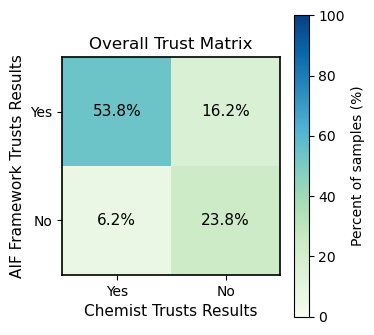

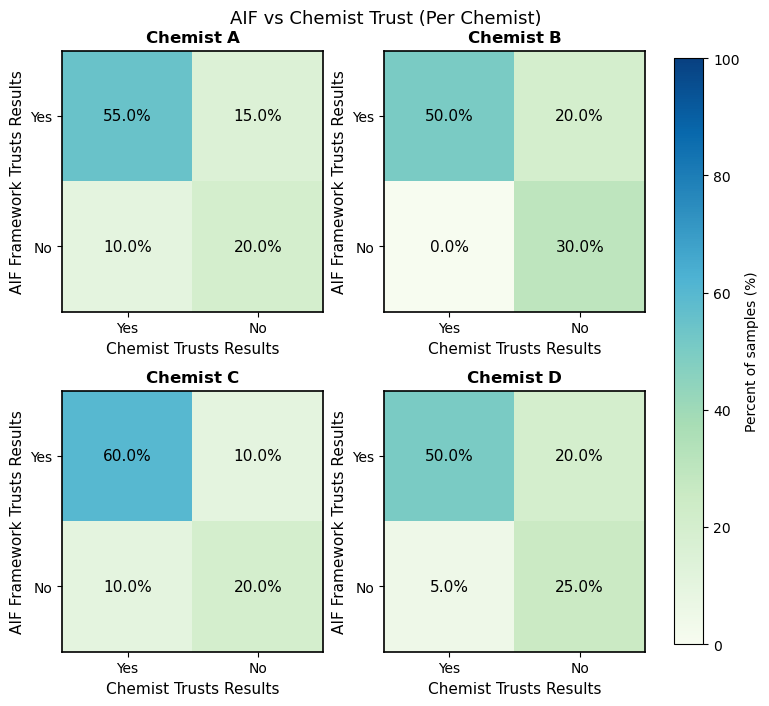

In [685]:
# ========= Build trust booleans & contingency tables =========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
LOW_TRUST_THRESHOLD=0.6
TRUST_THR = LOW_TRUST_THRESHOLD  # == 0.65 in your script
def preferred_series_safe(df, decoding_df, choice_col="Prefered Interpretation"):
    """
    Return a Series of canonical selections ('aif', 'dara', 'both a & b', 'neither a nor b')
    using an explicit decoding_df. This function *creates* the decoding columns safely.
    """
    df = df.copy().reset_index(drop=True)
    dec = decoding_df.copy().reset_index(drop=True)

    # Ensure the two decoding columns exist on df, aligned by row order.
    # If decoding is shorter/longer, reindex so assignment always works.
    for col_src, col_new in [("Interpretation A", "Interpretation A decoding"),
                             ("Interpretation B", "Interpretation B decoding")]:
        if col_src not in dec.columns:
            raise KeyError(f"decoding_df is missing column: {col_src}")
        vals = dec[col_src].reindex(range(len(df))).to_numpy()
        df[col_new] = vals

    def pick(row):
        ch = str(row[choice_col]).strip().lower()
        if ch == "a":
            return str(row["Interpretation A decoding"]).strip().lower()
        if ch == "b":
            return str(row["Interpretation B decoding"]).strip().lower()
        if "both" in ch:
            return "both a & b"
        if "neither" in ch:
            return "neither a nor b"
        return ""

    s = df.apply(pick, axis=1).replace({"neither": "neither a nor b"})
    return s

def _load_chemist_selection_table(csv_path, chem_label, decoding_csv):
    df = pd.read_csv(csv_path)
    decoding_df = pd.read_csv(decoding_csv)

    # use the safe version that attaches decoding columns
    s = preferred_series_safe(df, decoding_df)

    tbl = pd.DataFrame({
        "Name": df["Run Name in ALAB"].astype(str).map(normalize_name),
        "selection": s.astype(str).str.strip().str.lower(),
    })
    tbl["chemist"] = chem_label

    # Chemist 'trust' := anything except 'neither a nor b'
    # tbl["chemist_trust"] = ~tbl["selection"].eq("neither a nor b")
    trusted = {"aif", "both a & b"}

    tbl["chemist_trust"] = tbl["selection"].isin(trusted)
    return tbl

def build_trust_boolean_frame(paths_evals, decoding_csv, trust_df):
    """Returns a tidy frame with columns:
       Name, chemist, chemist_trust (bool), aif_trust (bool)"""
    all_rows = []
    for chem, p in paths_evals.items():
        c_tbl = _load_chemist_selection_table(p, chem, decoding_csv)
        # bring AIF trust_prob
        merged = c_tbl.merge(trust_df[["Name","trust_prob"]], on="Name", how="left")
        merged["aif_trust"] = merged["trust_prob"] >= TRUST_THR
        all_rows.append(merged[["Name","chemist","chemist_trust","aif_trust"]])
    return pd.concat(all_rows, ignore_index=True)

trust_bool_df = build_trust_boolean_frame(paths_evals, decoding_csv, trust_df)
# trust_bool_df has one row per (sample, chemist)

# ========= Contingency tables (counts and %s) =========
def contingency_2x2(df):
    """Return counts and percentages (rows: AIF True/False, cols: Chemist True/False)."""
    ct = pd.crosstab(df["aif_trust"], df["chemist_trust"])
    ct = ct.reindex(index=[True, False], columns=[True, False], fill_value=0)
    total = ct.values.sum()
    pct = (100 * ct / total) if total else ct.astype(float)
    return ct, pct

overall_counts, overall_pct = contingency_2x2(trust_bool_df)

per_chemist = {}
for ch in ("A","B","C","D"):
    sub = trust_bool_df[trust_bool_df["chemist"] == ch]
    per_chemist[ch] = contingency_2x2(sub)  # dict[ch] = (counts, pct)

# ========= Plotting =========
def _plot_2x2(ax, mat, title, cmap="GnBu", show_percent=True, vmax=100):
    """mat is a 2x2 numpy-like (percent if show_percent else counts)."""
    im = ax.imshow(mat.values, vmin=0, vmax=vmax, cmap=cmap)
    ax.set_title(title, fontsize=12)
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(["Yes","No"], fontsize=10)
    ax.set_yticklabels(["Yes","No"], fontsize=10)
    ax.set_xlabel("Chemist Trusts Results", fontsize=11)
    ax.set_ylabel("AIF Framework Trusts Results", fontsize=11)

    # annotate
    for i in range(2):
        for j in range(2):
            val = mat.values[i, j]
            txt = f"{val:.1f}%" if show_percent else f"{int(val)}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=11, color="black")

    # black frame
    for s in ax.spines.values():
        s.set_color("black"); s.set_linewidth(1.2)
    return im

# ---- (1) Single overall 2×2 (percentages) ----
def plot_overall_trust_matrix(overall_pct, cmap="GnBu"):
    fig, ax = plt.subplots(figsize=(3.8, 3.6))
    im = _plot_2x2(ax, overall_pct, "Overall Trust Matrix", cmap=cmap, show_percent=True, vmax=100)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Percent of samples (%)")
    fig.tight_layout()
    plt.show()

# ---- (2) Four per-chemist 2×2s (percentages) with shared colorbar ----
def plot_per_chemist_trust_matrices(per_chemist_pct_dict, cmap="GnBu"):
    fig, axes = plt.subplots(2, 2, figsize=(7.6, 6.8), constrained_layout=True)
    chs = ["A", "B", "C", "D"]
    ims = []

    for ax, ch in zip(axes.ravel(), chs):
        _, pct = per_chemist_pct_dict[ch]
        # ims.append(_plot_2x2(ax, pct, f"Chemist {ch}", cmap=cmap, show_percent=True, vmax=100))
        ims.append(_plot_2x2(
    ax, pct, f"$\\bf{{Chemist\\ {ch}}}$",  # Latex bold
    cmap=cmap, show_percent=True, vmax=100
))
    
    # colorbar automatically positioned with constrained layout
    cbar = fig.colorbar(ims[-1], ax=axes.ravel().tolist(), location="right", shrink=0.95, pad=0.05)
    cbar.set_label("Percent of samples (%)")

    fig.suptitle("AIF vs Chemist Trust (Per Chemist)", fontsize=13, y=1.02)
    plt.show()

# ========= Call the plots =========
plot_overall_trust_matrix(overall_pct, cmap="GnBu")
plot_per_chemist_trust_matrices(per_chemist, cmap="GnBu")

In [686]:
trust_df

,Name,trust_prob,llm,signal,overshoot,balance,missing_peaks,extra_peaks,peak_match,rwp,ratio
0,PG_1245_1,0.594020,0.85,26848.867375,2868.478804,1.000000,7.0,0.0,0.825739,4.15,9.359967
1,PG_1040_1,0.667948,0.55,45334.765534,347.299712,0.983100,8.0,6.0,0.913955,8.51,130.534993
2,PG_1450_1,0.454179,0.40,35489.919085,3357.520968,0.375000,10.0,0.0,0.839171,6.51,10.570275
3,ARR_112,0.493894,0.75,13714.458373,1850.331202,0.999032,11.0,5.0,0.751778,4.47,7.411894
4,ARR_101,0.304327,0.25,18150.726741,3872.711755,0.589120,50.0,4.0,0.510739,7.86,4.686826
5,ARR_124,0.284886,0.60,11808.571246,2321.104917,0.578000,27.0,7.0,0.400323,18.18,5.087478
6,ARR_66,0.426293,0.50,9075.926764,1262.274809,0.256000,19.0,0.0,0.755751,9.83,7.190135
7,ARR_75,0.498252,0.50,15339.416369,1221.256767,0.950500,22.0,4.0,0.608333,7.46,12.560353
8,ARR_54,0.676590,0.85,31628.674887,720.711209,0.983125,5.0,6.0,0.762533,6.34,43.885366
9,ARR_176,0.455418,0.75,10292.311678,1594.351397,0.999877,20.0,7.0,0.675040,6.60,6.455485


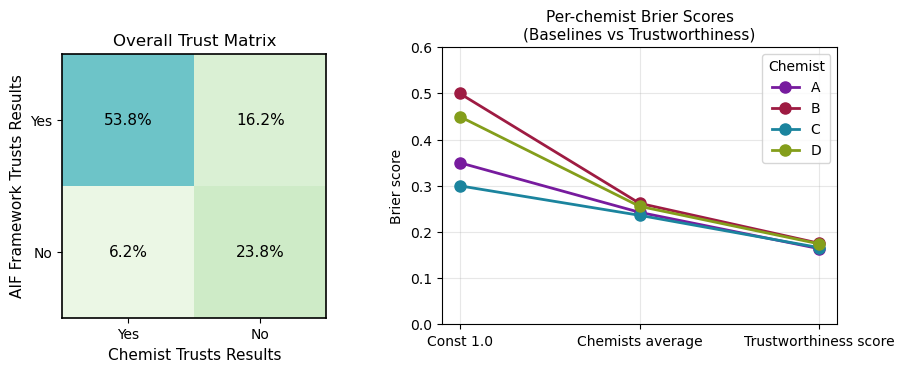

In [687]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trust_matrix_and_brier(overall_pct,
                                compressed_data,
                                labels,
                                palette,
                                cmap="GnBu"):
    """
    Left: Overall AIF vs Chemist trust matrix (percent)
    Right: Per-chemist Brier scores (3 points per chemist)
    """
    fig, (axL, axR) = plt.subplots(
        1, 2,
        gridspec_kw={"width_ratios": [1.2, 1.8]},
        figsize=(10, 4.2)
    )

    # ---------- LEFT: overall trust matrix ----------
    # uses your existing helper; show_percent=True, vmax=100
    im = _plot_2x2(
        axL,
        overall_pct,
        title="Overall Trust Matrix",
        cmap=cmap,
        show_percent=True,
        vmax=100
    )

    # ---------- RIGHT: Brier curves ----------
    x = np.arange(len(labels))

    for chemist, briers in compressed_data.items():
        color = palette[chemist]
        axR.plot(
            x,
            briers,
            "o-",
            linewidth=2,
            markersize=8,
            color=color,
            label=chemist
        )

    axR.set_xticks(x)
    axR.set_xticklabels(labels, rotation=0)
    axR.set_ylabel("Brier score")
    axR.set_title("Per-chemist Brier Scores\n(Baselines vs Trustworthiness)", fontsize=11)
    axR.set_ylim(0, 0.6)
    axR.grid(alpha=0.3)
    axR.legend(title="Chemist", loc="upper right")

    # ---------- Colorbar UNDER the matrix only ----------
    # Align with axL, not the whole figure
    pos = axL.get_position()
    # cbar_ax = fig.add_axes([
    #     pos.x0,           # same left
    #     pos.y0 - 0.07,    # slightly below the matrix
    #     pos.width,        # same width as matrix
    #     0.02              # colorbar height
    # ])
    # cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
    # cbar.set_label("Percent of samples (%)", fontsize=11)

    # Leave space for colorbar at bottom
    fig.subplots_adjust(bottom=0.22, wspace=0.35)

    return fig
labels = [
    "Const 1.0",
    "Chemists average",
    "Trustworthiness score",
]

palette = {
    "A": "#771b9e",
    "B": "#9e1b42",
    "C": "#1b849e",
    "D": "#849e1b",
}

fig = plot_trust_matrix_and_brier(
    overall_pct=overall_pct,
    compressed_data=compressed_data,
    labels=labels,
    palette=palette,
    cmap="GnBu"
)
plt.show()

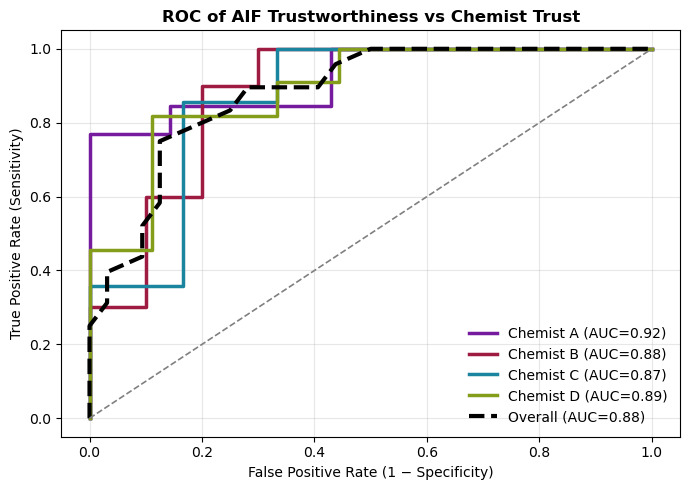


AUCs: {'A': 0.923076923076923, 'B': 0.8799999999999999, 'C': 0.8690476190476191, 'D': 0.8888888888888888, 'Overall': 0.8802083333333334}


In [690]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Build an unfiltered per-chemist table for ROC ---
def build_roc_frame(paths_evals, decoding_df, trust_df):
    def _preferred_series(df):
        df = df.copy()
        df["Interpretation A decoding"] = decoding_df["Interpretation A"]
        df["Interpretation B decoding"] = decoding_df["Interpretation B"]
        def pick(row):
            ch = str(row["Prefered Interpretation"]).strip().lower()
            if ch == "a":       return str(row["Interpretation A decoding"]).strip().lower()
            if ch == "b":       return str(row["Interpretation B decoding"]).strip().lower()
            if "both" in ch:    return "both a & b"
            if "neither" in ch: return "neither a nor b"
            return ""
        return df.apply(pick, axis=1).replace({"neither":"neither a nor b"})

    rows = []
    for chem, csv_path in paths_evals.items():
        df = pd.read_csv(csv_path)
        sel = _preferred_series(df)
        names = df["Run Name in ALAB"].astype(str).map(normalize_name)
        tbl = pd.DataFrame({"Name": names, "selection": sel, "chemist": chem})
        merged = tbl.merge(trust_df[["Name","trust_prob"]], on="Name", how="left")

        # y_true = 1 if chemist selected "AIF" or "Both", else 0
        merged["y_true"] = merged["selection"].isin(["aif", "both a & b"]).astype(int)
        merged["y_score"] = merged["trust_prob"]

        rows.append(merged[["chemist","Name","y_true","y_score"]])

    roc_df = pd.concat(rows, ignore_index=True)
    return roc_df.dropna(subset=["y_true","y_score"])

def plot_roc_per_chemist(roc_df, title="ROC of AIF Trustworthiness vs Chemist Trust"):
    plt.figure(figsize=(7,5))
    aucs = {}
    skipped = []

    # --- define custom colors for each chemist ---
    palette = {
        "A": "#771b9e",  # teal-green
        "B": "#9e1b42",  # orange
        "C": "#1b849e",  # indigo
        "D": "#849e1b",  # magenta
        "Overall": "black"
    }

    for chem in sorted(roc_df["chemist"].unique()):
        sub = roc_df[roc_df["chemist"] == chem]
        if sub["y_true"].nunique() < 2:
            skipped.append(chem)
            continue
        fpr, tpr, _ = roc_curve(sub["y_true"], sub["y_score"])
        auc = roc_auc_score(sub["y_true"], sub["y_score"])
        aucs[chem] = auc
        plt.plot(fpr, tpr, lw=2.5,
                 label=f"Chemist {chem} (AUC={auc:.2f})",
                 color=palette.get(chem, None))

    # overall / pooled curve
    if roc_df["y_true"].nunique() >= 2:
        fpr, tpr, _ = roc_curve(roc_df["y_true"], roc_df["y_score"])
        auc_overall = roc_auc_score(roc_df["y_true"], roc_df["y_score"])
        aucs["Overall"] = auc_overall
        plt.plot(fpr, tpr, lw=3, color=palette["Overall"],
                 linestyle="--", label=f"Overall (AUC={auc_overall:.2f})")

    plt.plot([0,1], [0,1], color="gray", lw=1.2, linestyle="--")
    plt.xlabel("False Positive Rate (1 − Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title(title, fontweight="bold")
    plt.legend(frameon=False)
    plt.grid(alpha=0.3)
    # plt.xlim(0, 1)
    # plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    if skipped:
        print(f"Skipped chemists (only one class present): {', '.join(skipped)}")

    return aucs

# ---------- Run ----------
roc_df = build_roc_frame(paths_evals, decoding, trust_df)
aucs = plot_roc_per_chemist(roc_df, title="ROC of AIF Trustworthiness vs Chemist Trust")
print("\nAUCs:", aucs)

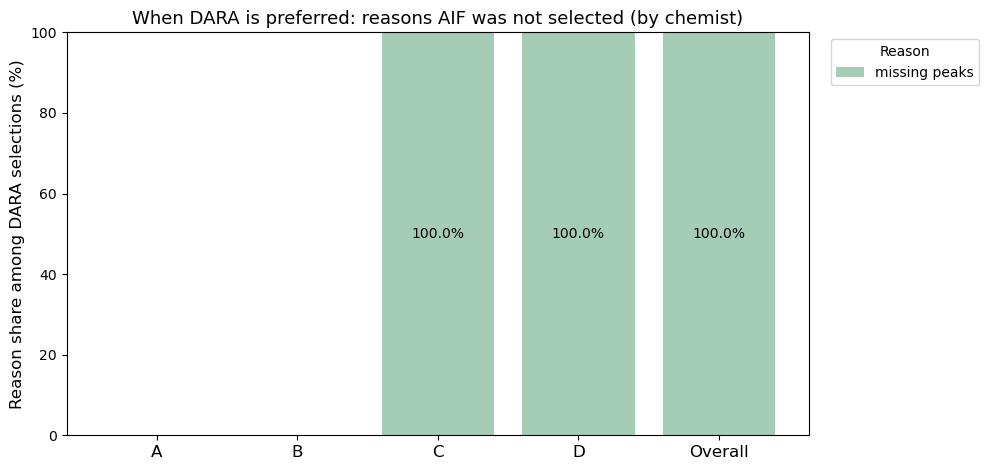


Saved:
- reason_outputs/reasons_dara_selected_counts_per_chemist.csv
- reason_outputs/reasons_dara_selected_by_chemist.png
- per-sample CSVs for each chemist under: reason_outputs/reasons_dara_selected_per_sample_*.csv


In [689]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from pathlib import Path
# --- put this near the top (after imports) ---
REASON_COLORS = {
    "missing peaks":            "#a5cdb6",  # blue
    "extra peaks":              "#ff7f0e",  # orange
    "shifted peaks":            "#9467bd",  # purple
    "bad background fit":       "#2ca02c",  # green
    "phase(s) missing":         "#17becf",  # cyan
    "extra wrong phase":        "#d62728",  # red
    "bad numerical refinement": "#b6a5cd", 
}

# fallback when a reason isn't in the dict
DEFAULT_COLORS = plt.cm.tab20.colors  # nice long cycle
# ---------- Inputs ----------
paths_evals = {
    "A": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_AT.csv",      # Amalie
    "B": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_new.csv",     # Lauren
    "C": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Steven.csv",  # Steven
    "D": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Amanda.csv",  # Amanda
}
decoding_csv = "../data/alab_synthesis_data/evaluation2_decoding_new.csv"

outdir = Path("reason_outputs")
outdir.mkdir(parents=True, exist_ok=True)

# ---------- Helpers ----------
def normalize_choice(choice: str) -> str:
    """Map free text to one of {'aif','dara','both a & b','neither a nor b',''} using the A/B decoding."""
    if not isinstance(choice, str):
        choice = str(choice)
    s = choice.strip().lower()
    if s in {"", "nan"}:
        return ""
    if s == "a":  # resolved later via decoding
        return "A"
    if s == "b":
        return "B"
    if "both" in s:
        return "both a & b"
    if "neither" in s:
        return "neither a nor b"
    return s  # keep as-is; we’ll coerce later

def find_reason_column(cols, which="A"):
    """Find the 'Interpretation X: Reasons for bad evaluation' column with flexible header match."""
    pat = re.compile(rf"^Interpretation\s*{which}\s*:\s*Reasons\s*for\s*bad\s*evaluation", re.I)
    for c in cols:
        if pat.match(str(c)):
            return c
    # fallback: look for "Reasons" + "Interpretation X"
    for c in cols:
        s = str(c).lower()
        if f"interpretation {which.lower()}" in s and "reason" in s:
            return c
    return None

def split_reasons(cell):
    """Split a multi-select cell into a list of clean tags."""
    if pd.isna(cell):
        return []
    # common separators: comma, semicolon, newlines
    parts = re.split(r"[;,]\s*|\n+", str(cell))
    # strip/normalize, drop empties
    tags = [p.strip() for p in parts if p and p.strip()]
    # unify a couple of common variants
    norm = {
        "bad background fit.": "bad background fit",
        "bad background fit": "bad background fit",
        "missing peaks": "missing peaks",
        "extra peaks": "extra peaks",
        "shifted peaks": "shifted peaks",
        "phase(s) missing": "phase(s) missing",
        "extra phase identified that shouldn't be there": "extra wrong phase",
        "bad numerical refinement of a phase.": "bad numerical refinement",
        "bad numerical refinement of a phase": "bad numerical refinement",
    }
    out = []
    for t in tags:
        k = t.lower()
        out.append(norm.get(k, t.lower()))
    return out

# ---------- Load decoding (which side is aif/dara per row index) ----------
decoding = pd.read_csv(decoding_csv)
# We will align decoding by row index with each evaluation df
# Columns expected: "Interpretation A", "Interpretation B" in {'aif','dara'}
if not set(["Interpretation A", "Interpretation B"]).issubset(set(decoding.columns)):
    raise ValueError("Decoding CSV must contain columns: 'Interpretation A', 'Interpretation B'.")

# ---------- Process per chemist ----------
per_chemist_counts = defaultdict(Counter)
per_chemist_rows = []

for chem, path in paths_evals.items():
    df = pd.read_csv(path)
    df = df.reset_index(drop=True)

    # add decoding columns by row-position (same order CSVs)
    if len(decoding) < len(df):
        raise ValueError(f"Decoding has fewer rows than {chem}'s evaluation file.")
    df["Interpretation A decoding"] = decoding["Interpretation A"].str.strip().str.lower().values[:len(df)]
    df["Interpretation B decoding"] = decoding["Interpretation B"].str.strip().str.lower().values[:len(df)]

    # find reason columns flexibly
    col_reason_A = find_reason_column(df.columns, "A")
    col_reason_B = find_reason_column(df.columns, "B")
    if col_reason_A is None or col_reason_B is None:
        raise ValueError(f"Could not find reason columns in {chem}'s CSV.")

    # normalize preference
    df["choice_norm"] = df["Prefered Interpretation"].apply(normalize_choice)

    # turn A/B into system labels using decoding
    def preferred_system(row):
        c = row["choice_norm"]
        if c == "A":
            return row["Interpretation A decoding"]
        if c == "B":
            return row["Interpretation B decoding"]
        if c in {"both a & b", "neither a nor b"}:
            return c
        return ""  # unknown / blank

    df["preferred_system"] = df.apply(preferred_system, axis=1)

    # parse reasons columns
    df["reasons_A"] = df[col_reason_A].apply(split_reasons)
    df["reasons_B"] = df[col_reason_B].apply(split_reasons)

    # determine which side is AIF and which is DARA for each row
    def side_labels(row):
        a = row["Interpretation A decoding"]
        b = row["Interpretation B decoding"]
        # Expect values like 'aif'/'dara'
        return ("A" if a == "aif" else "B"), ("A" if a == "dara" else "B")  # (aif_side, dara_side)

    tmp = df.copy()
    tmp[["aif_side", "dara_side"]] = tmp.apply(
        lambda r: pd.Series(side_labels(r)), axis=1
    )

    # For rows where chemist preferred DARA, collect reasons **against AIF**
    # (swap to preferred_system == 'aif' for the inverse analysis)
    df_dara = tmp[tmp["preferred_system"] == "dara"].copy()

    def reasons_against_aif(row):
        # reasons from the side that corresponds to AIF
        if row["aif_side"] == "A":
            return row["reasons_A"]
        else:
            return row["reasons_B"]

    df_dara["reasons_against_aif"] = df_dara.apply(reasons_against_aif, axis=1)

    # accumulate counts
    cnt = Counter()
    for tags in df_dara["reasons_against_aif"]:
        cnt.update(tags)
    per_chemist_counts[chem].update(cnt)

    # write per-sample tidy dump
    keep_cols = [
        "Run Name in ALAB", "Prefered Interpretation",
        "Interpretation A decoding", "Interpretation B decoding",
        "preferred_system", "aif_side", "dara_side",
        col_reason_A, col_reason_B
    ]
    out_rows = df_dara[keep_cols].copy()
    out_rows.rename(columns={
        "Run Name in ALAB": "Name",
        col_reason_A: "reasons_A_raw",
        col_reason_B: "reasons_B_raw",
    }, inplace=True)
    out_rows["reasons_against_aif"] = df_dara["reasons_against_aif"].apply(lambda x: "; ".join(x))

    out_path = outdir / f"reasons_dara_selected_per_sample_{chem}.csv"
    out_rows.to_csv(out_path, index=False)

# ---------- Combine counts across chemists + overall ----------
all_reasons = sorted(set().union(*[set(c.keys()) for c in per_chemist_counts.values()]))
rows = []
overall = Counter()
for chem, cnt in per_chemist_counts.items():
    for r in all_reasons:
        rows.append({"chemist": chem, "reason": r, "count": int(cnt.get(r, 0))})
    overall.update(cnt)
# overall line
for r in all_reasons:
    rows.append({"chemist": "Overall", "reason": r, "count": int(overall.get(r, 0))})

counts_df = pd.DataFrame(rows)
counts_df.to_csv(outdir / "reasons_dara_selected_counts_per_chemist.csv", index=False)

# ---------- Plot: reasons per chemist (DARA selected → why AIF not selected)
# Choose a compact set of reasons to plot (top N overall)
TOP_N = 6
top_reasons = [r for r, _ in overall.most_common(TOP_N)]
plot_chems = ["A","B","C","D"]  # order

plot_data = []
for chem in plot_chems + ["Overall"]:
    sub = counts_df[counts_df["chemist"] == chem]
    row = {"chemist": chem}
    for r in top_reasons:
        row[r] = int(sub[sub["reason"] == r]["count"].sum())
    plot_data.append(row)
plot_df = pd.DataFrame(plot_data).set_index("chemist")

# normalize to percentages within chemist (optional—comment out to keep counts)
plot_pct = plot_df.div(plot_df.sum(axis=1).replace(0, np.nan), axis=0) * 100

# stacked bar
# stacked bar WITH PERCENT LABELS
fig, ax = plt.subplots(figsize=(10, 4.8))

bottom = np.zeros(len(plot_pct))
xs = np.arange(len(plot_pct.index))
bars_by_reason = {}

for i, r in enumerate(top_reasons):
    vals = plot_pct[r].fillna(0).values
    color = REASON_COLORS.get(r, DEFAULT_COLORS[i % len(DEFAULT_COLORS)])  # <--- color here
    bars = ax.bar(xs, vals, bottom=bottom, label=r, color=color)
    bars_by_reason[r] = bars
    bottom += vals

ax.set_xticks(xs)
ax.set_xticklabels(plot_pct.index, fontsize=12)
ax.set_ylabel("Reason share among DARA selections (%)", fontsize=12)
ax.set_title("When DARA is preferred: reasons AIF was not selected (by chemist)", fontsize=13)
ax.set_ylim(0, 100)
ax.legend(title="Reason", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)

# --- add % labels on each segment ---
label_min = 4.0  # don't label segments smaller than this %
for r in top_reasons:
    for rect in bars_by_reason[r]:
        height = rect.get_height()
        if height < label_min:
            continue
        x = rect.get_x() + rect.get_width() / 2.0
        y = rect.get_y() + height / 2.0
        ax.text(x, y, f"{height:.1f}%", ha="center", va="center", fontsize=10, color="black")

plt.tight_layout()
plt.savefig(outdir / "reasons_dara_selected_by_chemist.png", dpi=200)
plt.show()

print(f"\nSaved:\n- {outdir/'reasons_dara_selected_counts_per_chemist.csv'}\n- {outdir/'reasons_dara_selected_by_chemist.png'}")
print(f"- per-sample CSVs for each chemist under: {outdir}/reasons_dara_selected_per_sample_*.csv")

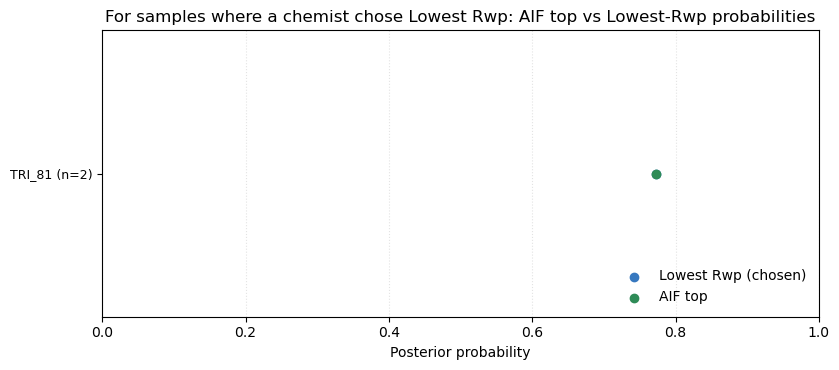

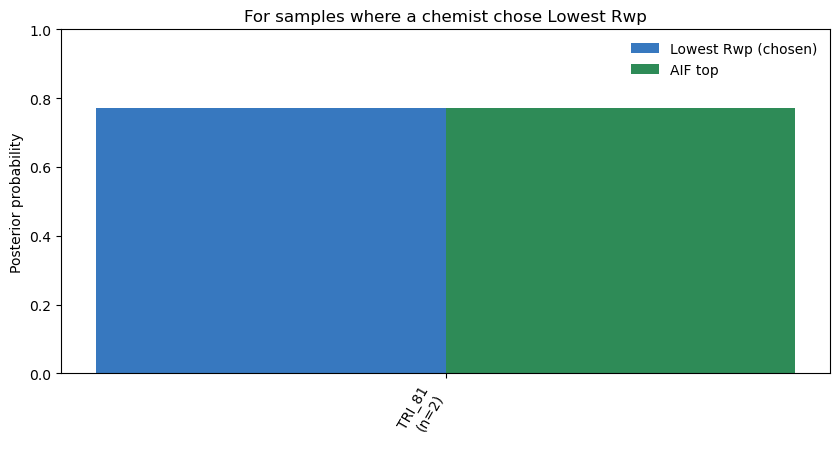

In [664]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import json, re
import matplotlib.pyplot as plt
from collections import Counter

# ----------- Inputs -----------
paths_evals = {
    "A": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_AT.csv",
    "B": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_new.csv",
    "C": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Steven.csv",
    "D": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Amanda.csv",
}
decoding_csv = "../data/alab_synthesis_data/evaluation2_decoding_new.csv"
json_paths = [
    "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_16_more_forevaluation.json",
    # "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_second_evaluation.json",
    "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_for_brier.json",
]

# ----------- Helpers -----------
def normalize_name(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = s.strip().replace("-", "_")
    if not s: return s
    m_tri = re.fullmatch(r"(?i)(TRI)[_-]?(\d+)$", s)
    if m_tri: return f"TRI_{m_tri.group(2)}"
    m_pg = re.fullmatch(r"(?i)(PG)_(\d+)(?:_(\d+))?$", s)
    if m_pg:
        num, suf = m_pg.group(2), m_pg.group(3)
        return f"PG_{num}_{suf}" if suf else f"PG_{num}_1"
    return s

def load_all_interps(json_paths):
    merged = {}
    for p in json_paths:
        with open(p, "r") as f:
            merged.update(json.load(f))
    return merged

def resolve_aif_key(d):
    best_key, best_post = None, -np.inf
    for k, v in d.items():
        post = v.get("posterior_probability")
        if post is None: continue
        try:
            p = float(post)
            if p > best_post:
                best_post, best_key = p, k
        except: pass
    return best_key

def resolve_lowest_rwp_key(d):
    best_key, best_rwp = None, np.inf
    for k, v in d.items():
        rwp = v.get("rwp")
        if rwp is None: continue
        try:
            r = float(rwp)
            if r < best_rwp:
                best_rwp, best_key = r, k
        except: pass
    return best_key

# ----------- Load decoding + evaluations -----------
decoding = pd.read_csv(decoding_csv)
decode_A = decoding["Interpretation A"].str.strip().str.lower()
decode_B = decoding["Interpretation B"].str.strip().str.lower()

def preferred_system_series(df):
    df = df.reset_index(drop=True).copy()
    # align decoding by row index
    df["A_dec"] = decode_A.values[:len(df)]
    df["B_dec"] = decode_B.values[:len(df)]
    def pick(row):
        ch = str(row["Prefered Interpretation"]).strip().lower()
        if ch == "a": return row["A_dec"]
        if ch == "b": return row["B_dec"]
        if "both" in ch: return "both a & b"
        if "neither" in ch: return "neither a nor b"
        return ""
    out = df.apply(pick, axis=1).replace({"neither":"neither a nor b"})
    return pd.Series(out.values, index=df.index), df["Run Name in ALAB"].astype(str)

# gather samples where ANY chemist picked "dara" (lowest rwp)
picked_dara_names = []
for chem, path in paths_evals.items():
    ev = pd.read_csv(path)
    s, names = preferred_system_series(ev)
    mask = s.str.lower().eq("dara") | s.str.lower().eq("lowest rwp")
    picked_dara_names.extend(list(names[mask].map(normalize_name)))

# deduplicate + also count how many chemists picked dara per sample
counts = Counter(picked_dara_names)
picked_unique = sorted(set(picked_dara_names))

# ----------- Pull probabilities from JSONs -----------
interps = load_all_interps(json_paths)

rows = []
for name in picked_unique:
    d = interps.get(name)
    if not isinstance(d, dict):
        # try again with original if we didn't normalize in JSON
        d = interps.get(name.replace("_","-")) or interps.get(name.replace("-","_"))
    if not isinstance(d, dict):
        continue
    k_aif = resolve_aif_key(d)
    k_rwp = resolve_lowest_rwp_key(d)
    if k_aif is None or k_rwp is None:
        continue
    p_aif = d[k_aif].get("unnormalized_posterior", np.nan)
    p_rwp = d[k_rwp].get("unnormalized_posterior", np.nan)
    try:
        p_aif = float(p_aif)
    except: p_aif = np.nan
    try:
        p_rwp = float(p_rwp)
    except: p_rwp = np.nan
    rows.append({"Name": name, "p_aif": p_aif, "p_rwp": p_rwp, "n_chemists": counts.get(name, 1)})

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("No matching samples found. Check name normalization and JSON availability.")

# sort by difference (AIF - Rwp) so trend is clear
df["delta"] = df["p_aif"] - df["p_rwp"]
df = df.sort_values("delta", ascending=True).reset_index(drop=True)

# ----------- Plot (paired dots with connecting line) -----------
plt.figure(figsize=(8.5, max(3.8, 0.28*len(df))))
y = np.arange(len(df))

# colors consistent with the rest
c_aif  = "#2E8B57"   # seagreen
c_rwp  = "#3778BF"   # steel/blue
c_line = "#A0A0A0"

# lines first (behind)
for i, row in df.iterrows():
    plt.plot([row["p_rwp"], row["p_aif"]], [y[i], y[i]], color=c_line, lw=1.0, zorder=1)

# points
plt.scatter(df["p_rwp"], y, color=c_rwp, label="Lowest Rwp (chosen)", zorder=3)
plt.scatter(df["p_aif"], y, color=c_aif, label="AIF top", zorder=3)

# sample labels, include multiplicity if >1
labels = [f'{n} (n={m})' if m>1 else n for n, m in zip(df["Name"], df["n_chemists"])]
plt.yticks(y, labels, fontsize=9)

plt.xlabel("Posterior probability")
plt.xlim(0, 1.0)
plt.title("For samples where a chemist chose Lowest Rwp: AIF top vs Lowest-Rwp probabilities")
plt.legend(loc="lower right", frameon=False)
plt.grid(axis="x", linestyle=":", alpha=0.35)
plt.tight_layout()
plt.show()

# ---------- OPTIONAL: bar version (side-by-side) ----------
# Useful if you’d rather see bars per sample; uncomment to use.
import matplotlib.pyplot as plt
idx = np.arange(len(df))
w = 0.4
plt.figure(figsize=(max(8.5, 0.35*len(df)), 4.6))
plt.bar(idx - w/2, df["p_rwp"], width=w, color=c_rwp, label="Lowest Rwp (chosen)")
plt.bar(idx + w/2, df["p_aif"], width=w, color=c_aif, label="AIF top")
xt = [f'{n}\n(n={m})' if m>1 else n for n, m in zip(df["Name"], df["n_chemists"])]
plt.xticks(idx, xt, rotation=60, ha="right")
plt.ylim(0, 1.0); plt.ylabel("Posterior probability")
plt.title("For samples where a chemist chose Lowest Rwp")
plt.legend(frameon=False); plt.tight_layout(); plt.show()


Chemist A: selected Lowest Rwp for 0 samples

Chemist B: selected Lowest Rwp for 0 samples

Chemist C: selected Lowest Rwp for 1 samples
  - TRI_81

Chemist D: selected Lowest Rwp for 2 samples
  - ARR_208
  - TRI_81


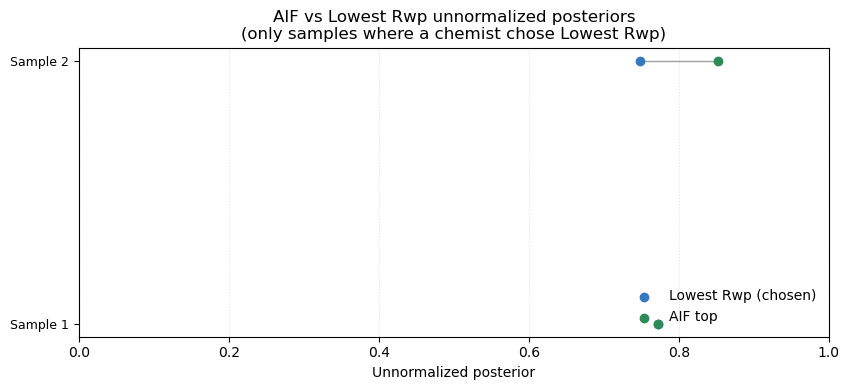

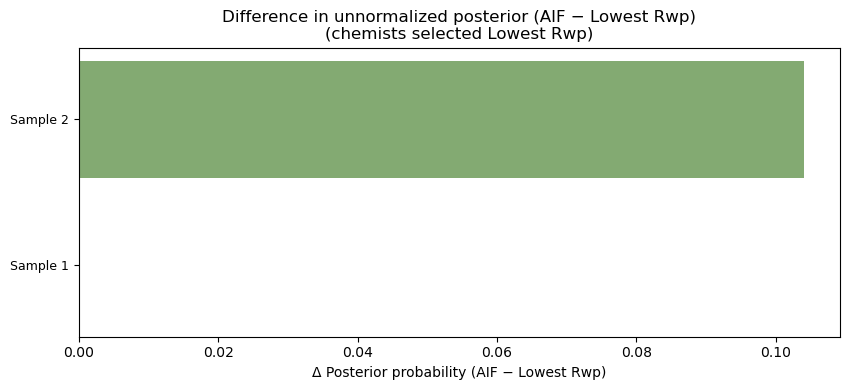

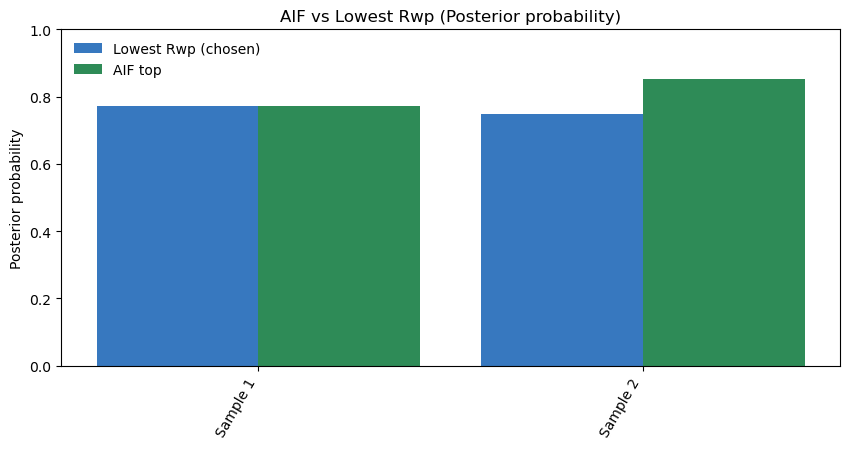

In [409]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import json, re
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# ----------- Inputs -----------
paths_evals = {
    "A": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_AT.csv",
    "B": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_new.csv",
    "C": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Steven.csv",
    "D": "../data/alab_synthesis_data/Dara-AIF_Evaluation2_with_weights_Amanda.csv",
}
decoding_csv = "../data/alab_synthesis_data/evaluation2_decoding_new.csv"
json_paths = [
    "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_16_more_forevaluation.json",
    # "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_second_evaluation.json",
    "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_for_brier.json",
]

# ----------- Helpers -----------
def normalize_name(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = s.strip().replace("-", "_")
    if not s: return s
    m_tri = re.fullmatch(r"(?i)(TRI)[_-]?(\d+)$", s)
    if m_tri: return f"TRI_{m_tri.group(2)}"
    m_pg = re.fullmatch(r"(?i)(PG)_(\d+)(?:_(\d+))?$", s)
    if m_pg:
        num, suf = m_pg.group(2), m_pg.group(3)
        return f"PG_{num}_{suf}" if suf else f"PG_{num}_1"
    return s

def load_all_interps(json_paths):
    merged = {}
    for p in json_paths:
        with open(p, "r") as f:
            merged.update(json.load(f))
    return merged

def resolve_aif_key(d):
    best_key, best_post = None, -np.inf
    for k, v in d.items():
        post = v.get("posterior_probability")
        if post is None: continue
        try:
            p = float(post)
            if p > best_post:
                best_post, best_key = p, k
        except: 
            pass
    return best_key

def resolve_lowest_rwp_key(d):
    best_key, best_rwp = None, np.inf
    for k, v in d.items():
        rwp = v.get("rwp")
        if rwp is None: continue
        try:
            r = float(rwp)
            if r < best_rwp:
                best_rwp, best_key = r, k
        except: 
            pass
    return best_key

# ----------- Load decoding + evaluations -----------
decoding = pd.read_csv(decoding_csv)
decode_A = decoding["Interpretation A"].str.strip().str.lower()
decode_B = decoding["Interpretation B"].str.strip().str.lower()

def preferred_system_series(df):
    df = df.reset_index(drop=True).copy()
    # align decoding by row index
    df["A_dec"] = decode_A.values[:len(df)]
    df["B_dec"] = decode_B.values[:len(df)]
    def pick(row):
        ch = str(row["Prefered Interpretation"]).strip().lower()
        if ch == "a": return row["A_dec"]
        if ch == "b": return row["B_dec"]
        if "both" in ch: return "both a & b"
        if "neither" in ch: return "neither a nor b"
        return ""
    choice = df.apply(pick, axis=1).replace({"neither":"neither a nor b"})
    names = df["Run Name in ALAB"].astype(str)
    return choice, names

# ----------- Gather samples picked as DARA (Lowest Rwp), per chemist -----------
picked_by_chemist = defaultdict(list)  # chem -> [normalized names]
for chem, path in paths_evals.items():
    ev = pd.read_csv(path)
    s, names = preferred_system_series(ev)
    mask = s.str.lower().isin(["dara", "lowest rwp"])
    norm_names = names[mask].map(normalize_name).tolist()
    picked_by_chemist[chem].extend(norm_names)

# Deduplicate overall and count multiplicity across chemists
picked_all = [n for lst in picked_by_chemist.values() for n in lst]
counts = Counter(picked_all)
picked_unique = sorted(set(picked_all))

# ----------- Print & save per-chemist selections -----------
for chem in ["A","B","C","D"]:
    sel = sorted(set(picked_by_chemist.get(chem, [])))
    print(f"\nChemist {chem}: selected Lowest Rwp for {len(sel)} samples")
    for n in sel:
        print("  -", n)
    pd.DataFrame({"Name": sel}).to_csv(f"lowest_rwp_selected_chemist_{chem}.csv", index=False)

# ----------- Pull unnormalized posteriors from JSONs -----------
interps = load_all_interps(json_paths)

rows = []
for name in picked_unique:
    d = interps.get(name)
    if not isinstance(d, dict):
        # try swapped underscores/dashes just in case
        d = interps.get(name.replace("_","-")) or interps.get(name.replace("-","_"))
    if not isinstance(d, dict):
        continue
    k_aif = resolve_aif_key(d)
    k_rwp = resolve_lowest_rwp_key(d)
    if k_aif is None or k_rwp is None:
        continue
    p_aif = d[k_aif].get("unnormalized_posterior", np.nan)
    p_rwp = d[k_rwp].get("unnormalized_posterior", np.nan)
    try: p_aif = float(p_aif)
    except: p_aif = np.nan
    try: p_rwp = float(p_rwp)
    except: p_rwp = np.nan
    rows.append({"Name": name, "p_aif": p_aif, "p_rwp": p_rwp, "n_chemists": counts.get(name, 1)})

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("No matching samples found. Check name normalization and JSON availability.")

# ---- compute difference and sort ----
df["delta"] = df["p_aif"] - df["p_rwp"]
df = df.sort_values("delta", ascending=True).reset_index(drop=True)

# ---- Build anonymous labels (Sample 1..N), keep a mapping CSV for reference ----
df["SampleID"] = [f"Sample {i+1}" for i in range(len(df))]
df[["SampleID","Name","n_chemists","p_aif","p_rwp","delta"]].to_csv(
    "lowest_rwp_samples_anonymous_mapping.csv", index=False
)

# ----------- Plot 1: paired dots (names hidden) -----------
plt.figure(figsize=(8.6, max(4.0, 0.28*len(df))))
y = np.arange(len(df))

c_aif  = "#2E8B57"   # AIF
c_rwp  = "#3778BF"   # Lowest Rwp
c_line = "#A0A0A0"

# connecting lines
for i, row in df.iterrows():
    plt.plot([row["p_rwp"], row["p_aif"]], [y[i], y[i]], color=c_line, lw=1.0, zorder=1)

# points
plt.scatter(df["p_rwp"], y, color=c_rwp, label="Lowest Rwp (chosen)", zorder=3)
plt.scatter(df["p_aif"], y, color=c_aif, label="AIF top", zorder=3)

# anonymous tick labels
plt.yticks(y, df["SampleID"].tolist(), fontsize=9)

plt.xlabel("Unnormalized posterior")
plt.xlim(min(0.0, np.nanmin([df["p_rwp"].min(), df["p_aif"].min()]) - 0.02),
         max(1.0, np.nanmax([df["p_rwp"].max(), df["p_aif"].max()]) + 0.02))
plt.title("AIF vs Lowest Rwp unnormalized posteriors\n(only samples where a chemist chose Lowest Rwp)")
plt.legend(loc="lower right", frameon=False)
plt.grid(axis="x", linestyle=":", alpha=0.35)
plt.tight_layout()
plt.savefig("aif_vs_rwp_unnorm_posterior_pairs.png", dpi=300)
plt.show()

# ----------- Plot 2: Δ (AIF − Lowest Rwp) as horizontal bars (names hidden) -----------
plt.figure(figsize=(8.6, max(4.0, 0.28*len(df))))
y = np.arange(len(df))
colors_delta = ["#83aa72" if val >= 0 else "#7399b5" for val in df["delta"]]
plt.barh(y, df["delta"], color=colors_delta, edgecolor="none")
plt.axvline(0, color="#BDBDBD", lw=1.2)
plt.yticks(y, df["SampleID"].tolist(), fontsize=9)
plt.xlabel("Δ Posterior probability (AIF − Lowest Rwp)")
plt.title("Difference in unnormalized posterior (AIF − Lowest Rwp)\n(chemists selected Lowest Rwp)")
plt.tight_layout()
plt.savefig("delta_unnorm_posterior_barh.png", dpi=300)
plt.show()

# ----------- Optional: side-by-side bars (anonymous x labels) -----------
idx = np.arange(len(df))
w = 0.42
plt.figure(figsize=(max(8.6, 0.35*len(df)), 4.6))
plt.bar(idx - w/2, df["p_rwp"], width=w, color=c_rwp, label="Lowest Rwp (chosen)")
plt.bar(idx + w/2, df["p_aif"], width=w, color=c_aif, label="AIF top")
plt.xticks(idx, df["SampleID"].tolist(), rotation=60, ha="right")
plt.ylim(0, 1.0); plt.ylabel("Posterior probability")
plt.title("AIF vs Lowest Rwp (Posterior probability)")
plt.legend(frameon=False); plt.tight_layout()
plt.savefig("aif_vs_rwp_unnorm_posterior_bars.png", dpi=300)
plt.show()

In [410]:
decoding

,Run Name in ALAB,Target,Precursor 1,Precursor 2,Precursor 3,Precursor 4,Furnace,Temperature (C),Dwell Duration (h),Interpretation A,Interpretation B,AIF trust results
0,TRI-80,CaV2O3,CaCO3,V2O3,NaN,NaN,TF-Ar,500.0,12.0,dara,aif,both
1,TRI-81,LiVO2,Li2CO3,V2O5,NaN,NaN,TF-Ar,400.0,12.0,dara,aif,both
2,TRI-90,CaV2O3,CaCO3,V2O3,NaN,NaN,TF-Ar,700.0,12.0,aif,dara,both
3,TRI-106,NaVO2,Na2CO3,V2O5,C,NaN,TF-Ar,700.0,12.0,dara,aif,none
4,TRI-114,LiVO2,Li2CO3,V2O5,NaN,NaN,TF-Ar + H2,600.0,12.0,aif,dara,both
5,TRI-183,MgVO3,MgCO3,V2O5,NaN,NaN,BF,500.0,12.0,aif,dara,both
6,PG_1048,VCrO4,Cr2O3,V2O5,NaN,NaN,BF,400.0,1.0,aif,dara,both
7,PG_0849,CoWO4,CoO,WO3,NaN,NaN,BF,900.0,1.0,dara,aif,both
8,ARR_46,CaTiNiP2O9,CaO,NH4H2PO4,NiO,TiO2,BF,900.0,4.0,dara,aif,both
9,TRI_28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aif,dara,none


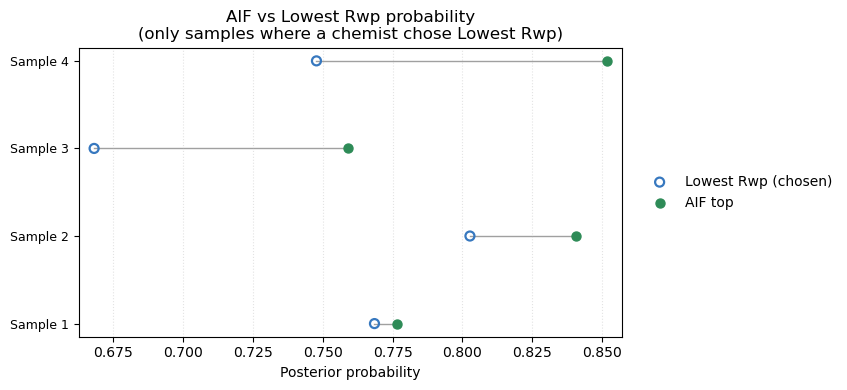

In [236]:
# ----------- Plot 1: paired dots (names hidden) — handle ties & put legend outside -----------
plt.figure(figsize=(8.6, max(4.0, 0.28*len(df))))
y = np.arange(len(df))

c_aif  = "#2E8B57"   # AIF
c_rwp  = "#3778BF"   # Lowest Rwp
c_line = "#A0A0A0"

# base arrays
x_rwp = df["p_rwp"].to_numpy(float)
x_aif = df["p_aif"].to_numpy(float)

# tiny jitter for exact ties so both markers are visible in print/PDF
tol = 1e-9
jitter = 0.004
same_mask = np.isfinite(x_rwp) & np.isfinite(x_aif) & (np.abs(x_rwp - x_aif) <= tol)
x_rwp_plot = x_rwp.copy()
x_aif_plot = x_aif.copy()
x_rwp_plot[same_mask] -= jitter
x_aif_plot[same_mask] += jitter

# connecting lines (use the jittered x so even zero-length lines show a tiny span)
for i in range(len(df)):
    plt.plot([x_rwp_plot[i], x_aif_plot[i]], [y[i], y[i]], color=c_line, lw=1.0, zorder=1)

# points:
# - Lowest Rwp as hollow ring (always visible even when equal)
# - AIF as filled dot
plt.scatter(x_rwp_plot, y, facecolors="none", edgecolors=c_rwp, linewidths=1.6,
            label="Lowest Rwp (chosen)", zorder=3, s=42)
plt.scatter(x_aif_plot, y, color=c_aif, label="AIF top", zorder=4, s=42)

# anonymous y tick labels
plt.yticks(y, df["SampleID"].tolist(), fontsize=9)

xmin = np.nanmin([x_rwp_plot.min(), x_aif_plot.min()])
xmax = np.nanmax([x_rwp_plot.max(), x_aif_plot.max()])
pad = 0.03 * (xmax - xmin if np.isfinite(xmax - xmin) and (xmax - xmin) > 0 else 1.0)
plt.xlim(max(0.0, xmin - pad), min(1.0, xmax + pad))

plt.xlabel("Posterior probability")
plt.title("AIF vs Lowest Rwp probability\n(only samples where a chemist chose Lowest Rwp)")

# legend outside (right), not inside the axes
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.grid(axis="x", linestyle=":", alpha=0.35)
plt.tight_layout()
plt.savefig("aif_vs_rwp_unnorm_posterior_pairs.png", dpi=300, bbox_inches="tight")
plt.show()

In [201]:
print(df[["Name", "p_aif", "p_rwp", "delta"]].sort_values("delta", ascending=False))

      Name     p_aif     p_rwp     delta
2  ARR_208  0.851733  0.747718  0.104015
1  TRI_102  0.840737  0.802673  0.038064
0   TRI_81  0.772490  0.772490  0.000000


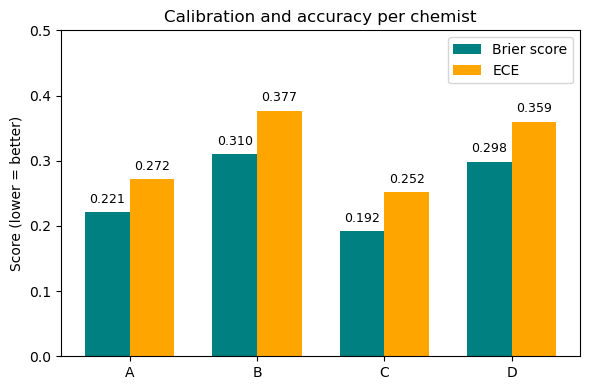

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# values from your summary
# data = {
#     "A": {"Brier": 0.2675, "ECE": 0.2970},
#     "B": {"Brier": 0.3767, "ECE": 0.4128},
#     "C": {"Brier": 0.2299, "ECE": 0.2562},
#     "D": {"Brier": 0.3297, "ECE": 0.3628},
# }
data = {
    "A": {"Brier": 0.2206, "ECE": 0.2715},
    "B": {"Brier": 0.3098, "ECE": 0.3766},
    "C": {"Brier": 0.1916, "ECE": 0.2516},
    "D": {"Brier": 0.2983, "ECE": 0.3594},
}

chems = list(data.keys())
brier = [data[c]["Brier"] for c in chems]
ece = [data[c]["ECE"] for c in chems]

x = np.arange(len(chems))
w = 0.35

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - w/2, brier, width=w, label="Brier score", color="teal")
ax.bar(x + w/2, ece, width=w, label="ECE", color="orange")

for i, v in enumerate(brier):
    ax.text(x[i]-w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
for i, v in enumerate(ece):
    ax.text(x[i]+w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(chems)
ax.set_ylim(0, 0.5)
ax.set_ylabel("Score (lower = better)")
ax.set_title("Calibration and accuracy per chemist")
ax.legend()
plt.tight_layout()
plt.show()

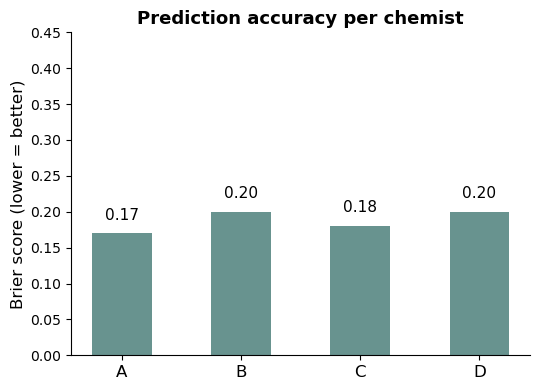

In [289]:
import matplotlib.pyplot as plt
import numpy as np

# (base) odartsi@ODartsi-M59 Genome_Lauren % python compute_multi_chemists_brier.py \
#   --names_csv names.csv \
#   --ab_map_csv ab_mapping.csv \
#   --chemist_csvs \
#       chemist_A.csv \
#       chemist_B.csv \
#       chemist_C.csv \
#       chemist_D.csv \
#   --jsons \
#       "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_16_more_forevaluation.json" \
#       "/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/interpretations/interpretations_for_brier.json" \
#   --outdir multi_chemist_outputs \
#   --combine mean \
#   --temperature 1.25
# === Per-chemist Brier summary ===
# chemist_A    N=16  Brier=0.1721  ECE=0.1946  -> chemist_A_per_sample.csv
# chemist_B    N=20  Brier=0.2041  ECE=0.2067  -> chemist_B_per_sample.csv
# chemist_C    N=15  Brier=0.1827  ECE=0.2786  -> chemist_C_per_sample.csv
# chemist_D    N=20  Brier=0.2026  ECE=0.1054  -> chemist_D_per_sample.csv



# --- Brier scores only ---
data = {
    "A": 0.17,
    "B": 0.20,
    "C": 0.18,
    "D": 0.20,
}

chems = list(data.keys())
brier = [data[c] for c in chems]

x = np.arange(len(chems))
fig, ax = plt.subplots(figsize=(5.5, 4))

bars = ax.bar(x, brier, width=0.5, color="#588783", alpha=0.9, label="Brier score")

# annotate with values
for i, v in enumerate(brier):
    ax.text(x[i], v + 0.015, f"{v:.2f}", ha="center", va="bottom", fontsize=11)

# styling
ax.set_xticks(x)
ax.set_xticklabels(chems, fontsize=12)
ax.set_ylim(0, 0.45)
ax.set_ylabel("Brier score (lower = better)", fontsize=12)
ax.set_title("Prediction accuracy per chemist", fontsize=13, fontweight="bold")
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()

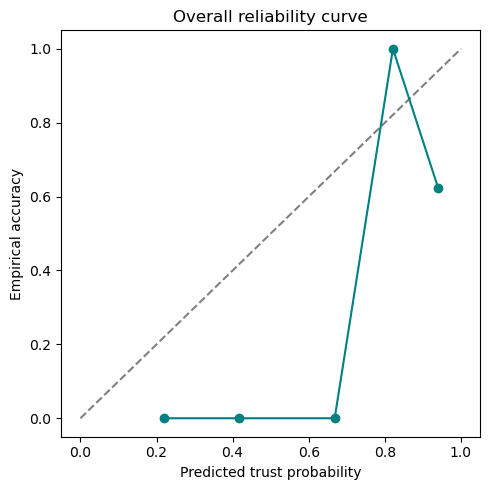

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.concat([
    pd.read_csv("/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/opXRD/Genome_Lauren/multi_chemist_outputs/chemist_A_per_sample.csv"),
    pd.read_csv("/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/opXRD/Genome_Lauren/multi_chemist_outputs/chemist_B_per_sample.csv"),
    pd.read_csv("/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/opXRD/Genome_Lauren/multi_chemist_outputs/chemist_C_per_sample.csv"),
    pd.read_csv("/Users/odartsi/Documents/GitHub/Automated_Interpretation_Framework/data/xrd_data/opXRD/Genome_Lauren/multi_chemist_outputs/chemist_D_per_sample.csv"),
], ignore_index=True)

bins = np.linspace(0,1,8)
df["bin"] = np.digitize(df["trust_prob"], bins)
cal = df.groupby("bin").agg(
    mean_conf=("trust_prob","mean"),
    acc=("outcome","mean"),
    n=("outcome","size")
).dropna()

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0,1],[0,1],'--',color='gray',label='Perfect calibration')
ax.plot(cal["mean_conf"], cal["acc"], 'o-', color='teal')
ax.set_xlabel("Predicted trust probability")
ax.set_ylabel("Empirical accuracy")
ax.set_title("Overall reliability curve")
plt.tight_layout()
plt.show()


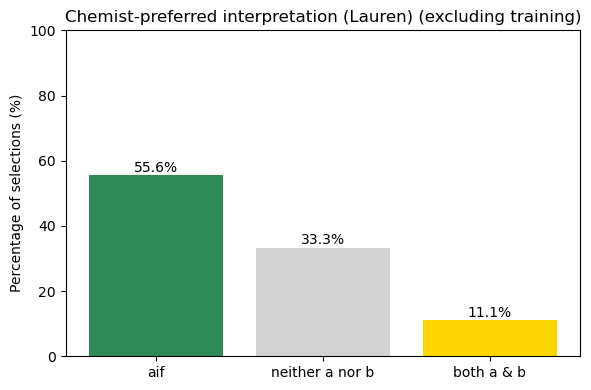

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- set-up ----------------
evaluation_without_training = evaluation.head(9)

# palette that matches the previous figure
palette = {
    'dara'            : 'steelblue',
    'aif'             : 'seagreen',
    'both a & b'      : 'gold',
    'neither a nor b' : 'lightgrey',
    'neither'         : 'lightgrey',   # in case the label shows up like this
}

# ---------------- percentages ----------------
percentages = (
    evaluation_without_training['Preferred system']
        .value_counts(normalize=True)
        .mul(100)
        .rename_axis('System')
        .reset_index(name='Percentage')
)

# ---------------- bar plot ----------------
fig, ax = plt.subplots(figsize=(6, 4))

colors = [palette.get(sys.lower(), 'grey')             # fall back to grey
          for sys in percentages['System']]

ax.bar(percentages['System'], percentages['Percentage'], color=colors)

ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation (Lauren) (excluding training)')
ax.set_ylim(0, 100)

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

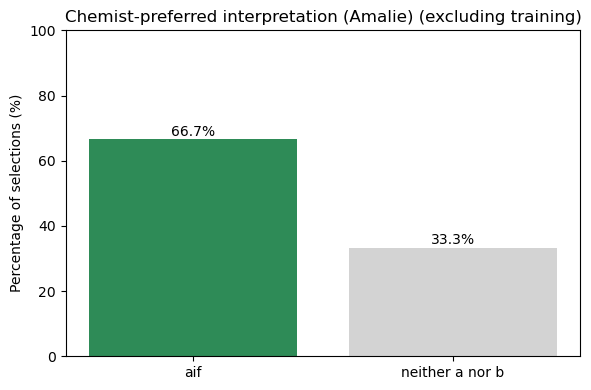

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- set-up ----------------
evaluation_without_training = evaluation_Amalie.head(9)

# palette that matches the previous figure
palette = {
    'dara'            : 'steelblue',
    'aif'             : 'seagreen',
    'both a & b'      : 'gold',
    'neither a nor b' : 'lightgrey',
    'neither'         : 'lightgrey',   # in case the label shows up like this
}

# ---------------- percentages ----------------
percentages = (
    evaluation_without_training['Preferred system']
        .value_counts(normalize=True)
        .mul(100)
        .rename_axis('System')
        .reset_index(name='Percentage')
)

# ---------------- bar plot ----------------
fig, ax = plt.subplots(figsize=(6, 4))

colors = [palette.get(sys.lower(), 'grey')             # fall back to grey
          for sys in percentages['System']]

ax.bar(percentages['System'], percentages['Percentage'], color=colors)

ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation (Amalie) (excluding training)')
ax.set_ylim(0, 100)

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

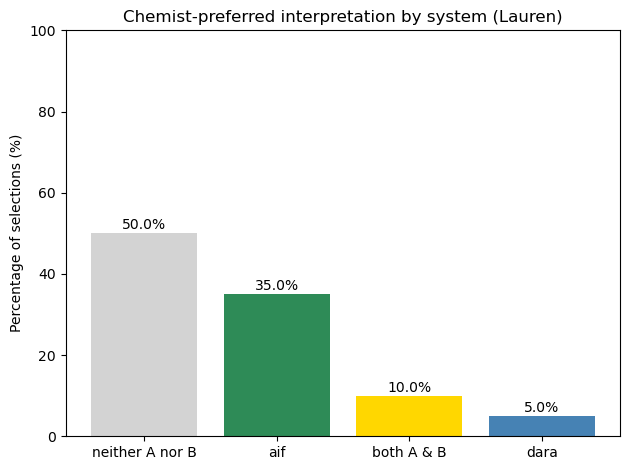

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding']      # 'dara' / 'aif'
    elif choice == 'B':
        return row['Interpretation B decoding']
    else:
        return row['Prefered Interpretation']        # ‘Neither’, blanks…

evaluation['Preferred system'] = evaluation.apply(get_preferred_system, axis=1)

# --------------------------------------------------
#  percentages
# --------------------------------------------------
percentages = (
    evaluation['Preferred system']
      .value_counts(normalize=True)
      .mul(100)
      .rename_axis('System')
      .reset_index(name='Percentage')
)

# --------------------------------------------------
#  bar plot with matching colours
# --------------------------------------------------
# same colour scheme you used earlier:
palette = {
    'dara'            : 'steelblue',
    'aif'             : 'seagreen',
    'both a & b'      : 'gold',
    'neither a nor b' : 'lightgrey',
    'neither'         : 'lightgrey',   # in case the label differs
}

fig, ax = plt.subplots()

bar_colors = [palette.get(sys.lower(), 'grey') for sys in percentages['System']]
ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation by system (Lauren)')
ax.set_ylim(0, 100)

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

## What about all these neither cases, what is the reason?

Trustworthiness flag:
-  llm <= 0.3
- balance_score < 0.6


### TRI-106 (balance_score <0.6 for all interpretations and llm <=0.3 for 3 out of 4 interpetation) --> AIF trust none ✅
<img src="../data/alab_synthesis_data/tri_106.png" width="50%">

### TRI-183 (balance score >0.9 for most but 2 <0.4, llm <=0.3 only for the last two) --> to check the bkg ❓
<img src="../data/alab_synthesis_data/tri_183.png" width="50%">

### TRI-28 (balance score >0.9, llm >=0.4) --> to check the bkg ❓
<img src="../data/alab_synthesis_data/tri-28.png" width="50%">

### TRI-104 (balance score >0.9 for AIF but for dara and the serst <0.6 , llm >=0.3 ) --> to check the bkg for the AIF❓, the Dara interpretation is untrustworthy ✅
<img src="../data/alab_synthesis_data/tri-104.png" width="50%">

### TRI-111 (balance score >0.9 for most but 1 <0.4, llm >0.4 except of the last interpretation) --> to check the bkg ❓
<img src="../data/alab_synthesis_data/tri-111.png" width="50%">

### TRI-113 (balance score >0.9 for most but 2 <0.4, llm <=0.3 only for 3 out of 9 interpetations) --> to check the bkg ❓
<img src="../data/alab_synthesis_data/tri-113.png" width="50%">

### ARR_46 (balance score >0.7 for all, llm =[0.35 - 0.6]) --> to check the bkg ❓, otherwise close to the flags
<img src="../data/alab_synthesis_data/ARR_46.png" width="50%">

### ARR_45 (balance score <0.98 for aif but < 0.4 for the rest, llm <=0.3 except Dara interpretation) --> AIF trust none ✅
<img src="../data/alab_synthesis_data/ARR_45.png" width="50%">

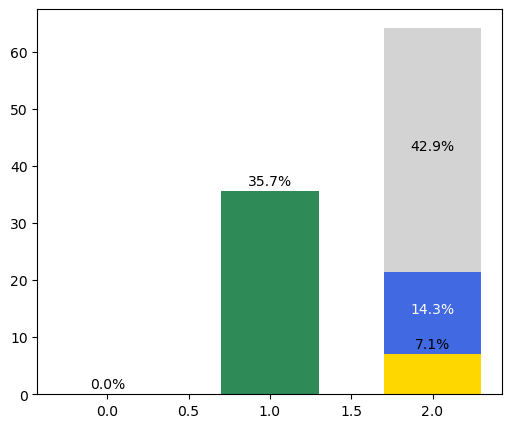

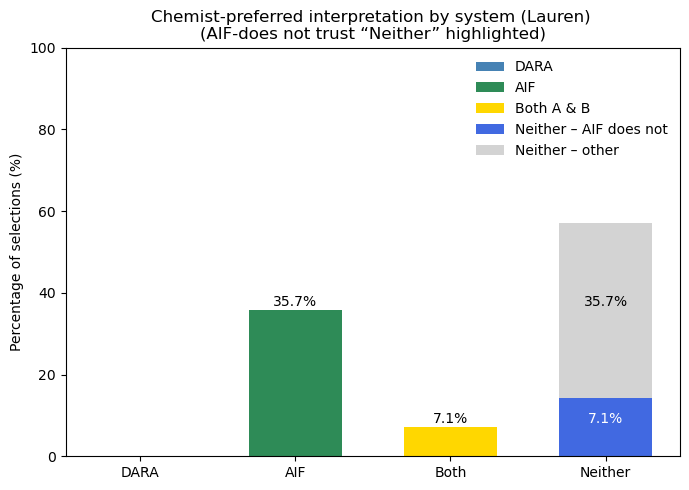

In [10]:
# --------------------------------------------------
# 2.  percentage dictionary (unchanged)
# --------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# SPECIAL runs whose “Neither” answers AIF was expected to get right
SPECIAL_NEITHER_RUNS = {"TRI-106", "ARR_45"}

# --------------------------------------------------
# 1.  classify each row
# --------------------------------------------------
def classify(row):
    run_id  = str(row['Run Name in ALAB']).strip()
    choice  = str(row['Prefered Interpretation']).strip().upper()

    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'dara' / 'aif'
    if choice == 'B':
        return row['Interpretation B decoding'].strip().lower()

    if choice.startswith("BOTH"):
        return 'both'                       # chemist said “both A & B”

    # → chemist said “neither A nor B”
    if run_id in SPECIAL_NEITHER_RUNS:
        # credit AIF if its decoding is *aif*
        if str(row['Interpretation B decoding']).strip().lower() == 'aif':
            return 'neither_aif'            # correct-neither by AIF
    return 'neither_other'                  # all remaining Neither cases

evaluation['class'] = evaluation.apply(classify, axis=1)

# --------------------------------------------------
# 2.  get percentages we need
# --------------------------------------------------
counts = evaluation['class'].value_counts()
tot    = counts.sum()

pct = {k: counts.get(k, 0) * 100 / tot for k in
       ['dara', 'aif', 'both', 'neither_aif', 'neither_other']}

# --------------------------------------------------
# 3.  plot: 3 separate bars + stacked Neither
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

xloc = [0, 1, 2]             # DARA, AIF, BOTH/Neither share slot 2
bar_w = 0.6

# DARA
ax.bar(xloc[0], pct['dara'], bar_w, color='steelblue', label='DARA')
ax.text(xloc[0], pct['dara'] + 1, f"{pct['dara']:.1f}%", ha='center')

# AIF
ax.bar(xloc[1], pct['aif'], bar_w, color='seagreen', label='AIF')
ax.text(xloc[1], pct['aif'] + 1, f"{pct['aif']:.1f}%", ha='center')

# BOTH (single-colour bar if it exists)
ax.bar(xloc[2], pct['both'], bar_w, color='gold', label='Both A & B')
ax.text(xloc[2], pct['both'] + 1, f"{pct['both']:.1f}%", ha='center')

# NEITHER stacked on the same x as BOTH
ax.bar(xloc[2], pct['neither_aif'], bar_w,
       bottom=pct['both'], color='royalblue',
       label='Neither (AIF right)')
ax.bar(xloc[2], pct['neither_other'], bar_w,
       bottom=pct['both'] + pct['neither_aif'],
       color='lightgrey', label='Neither (other)')

# labels on stacked pieces
stack_mid1 = pct['both'] + pct['neither_aif']/2
stack_mid2 = pct['both'] + pct['neither_aif'] + pct['neither_other']/2
if pct['neither_aif']>0:
    ax.text(xloc[2], stack_mid1, f"{pct['neither_aif']:.1f}%", ha='center', color='white')
if pct['neither_other']>0:
    ax.text(xloc[2], stack_mid2, f"{pct['neither_other']:.1f}%", ha='center')


counts = evaluation['class'].value_counts()
tot    = counts.sum()

pct = {k: counts.get(k, 0) * 100 / tot for k in
       ['dara', 'aif', 'both', 'neither_aif', 'neither_other']}

# --------------------------------------------------
# 3.  BAR CHART
# --------------------------------------------------
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

# x-positions: DARA , AIF , BOTH , NEITHER
x = [0, 1, 2, 3]
w = 0.6

# single-height bars
ax.bar(x[0], pct['dara'],  w, color='steelblue', label='DARA')
ax.bar(x[1], pct['aif'],   w, color='seagreen',  label='AIF')
ax.bar(x[2], pct['both'],  w, color='gold',      label='Both A & B')

# stacked NEITHER bar
ax.bar(x[3], pct['neither_aif'],   w, color='royalblue',  label='Neither – AIF does not')
ax.bar(x[3], pct['neither_other'], w, color='lightgrey',
       bottom=pct['neither_aif'],  label='Neither – other')

# ----- labels on top of bars -----
def add_label(xpos, height, color='black'):
    if height > 0:
        ax.text(xpos, height + 1, f'{height:.1f}%', ha='center', color=color)

add_label(x[0], pct['dara'])
add_label(x[1], pct['aif'])
add_label(x[2], pct['both'])
# stacked labels for Neither
add_label(x[3], pct['neither_aif']/2,           color='white')  # centre of blue
add_label(x[3], pct['neither_aif'] + pct['neither_other']/2)    # centre of grey

# ----- cosmetics -----
ax.set_xticks(x)
ax.set_xticklabels(['DARA', 'AIF', 'Both', 'Neither'])
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation by system (Lauren) \n(AIF-does not trust “Neither” highlighted)')
ax.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

In [11]:
# column names that matter
run_col   = 'Run Name in ALAB'
choice_col = 'Prefered Interpretation'   # spelling matches your sheet

# rows where the chemist picked some variant of "Neither"
mask = evaluation_Amalie[choice_col].str.strip().str.lower() == 'neither a nor b'

# 1️⃣  list of sample IDs
neither_samples = evaluation_Amalie.loc[mask, run_col].tolist()
print("Samples Amalie marked as neither:", neither_samples)

# 2️⃣  full sub-DataFrame (if you need details)
neither_df = evaluation_Amalie.loc[mask].copy()

Samples Amalie marked as neither: ['TRI-90', 'TRI-106', 'ARR_46', 'TRI_104', 'TRI_113', 'ARR_45']


In [12]:
# column names that matter
run_col   = 'Run Name in ALAB'
choice_col = 'Prefered Interpretation'   # spelling matches your sheet

# rows where the chemist picked some variant of "Neither"
mask = evaluation[choice_col].str.strip().str.lower() == 'neither a nor b'

# 1️⃣  list of sample IDs
neither_samples = evaluation.loc[mask, run_col].tolist()
print("Samples Lauren marked as neither:", neither_samples)

# 2️⃣  full sub-DataFrame (if you need details)
neither_df = evaluation.loc[mask].copy()

Samples Lauren marked as neither: ['TRI-106', 'TRI-183', 'ARR_46', 'TRI_28', 'TRI_104', 'TRI_111', 'TRI_113', 'ARR_45']


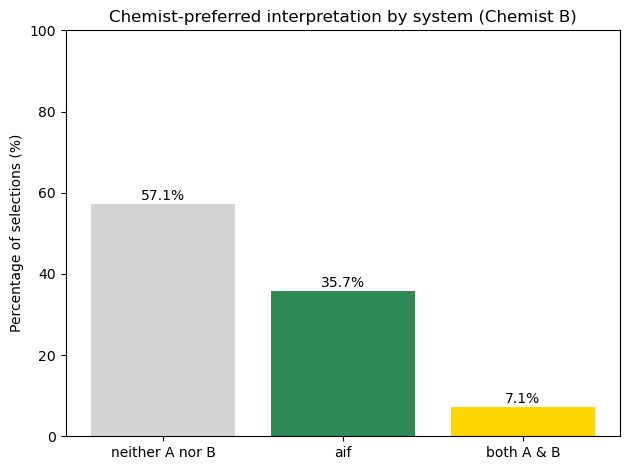

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume `evaluation` DataFrame is already loaded ---

def get_preferred_system(row):
    choice = str(row['Prefered Interpretation']).strip().upper()
    if choice == 'A':
        return row['Interpretation A decoding']      # 'dara' / 'aif'
    elif choice == 'B':
        return row['Interpretation B decoding']
    else:
        return row['Prefered Interpretation']        # ‘Neither’, blanks…

evaluation['Preferred system'] = evaluation.apply(get_preferred_system, axis=1)

# --------------------------------------------------
#  percentages
# --------------------------------------------------
percentages = (
    evaluation['Preferred system']
      .value_counts(normalize=True)
      .mul(100)
      .rename_axis('System')
      .reset_index(name='Percentage')
)

# --------------------------------------------------
#  bar plot with matching colours
# --------------------------------------------------
# same colour scheme you used earlier:
palette = {
    'dara'            : 'steelblue',
    'aif'             : 'seagreen',
    'both a & b'      : 'gold',
    'neither a nor b' : 'lightgrey',
    'neither'         : 'lightgrey',   # in case the label differs
}

fig, ax = plt.subplots()

bar_colors = [palette.get(sys.lower(), 'grey') for sys in percentages['System']]
ax.bar(percentages['System'], percentages['Percentage'], color=bar_colors)

ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation by system (Chemist B)')
ax.set_ylim(0, 100)

for i, v in enumerate(percentages['Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

In [14]:
# column names that matter
run_col   = 'Run Name in ALAB'
choice_col = 'Prefered Interpretation'   # spelling matches your sheet

# rows where the chemist picked some variant of "Neither"
mask = evaluation[choice_col].str.strip().str.lower() == 'neither a nor b'

# 1️⃣  list of sample IDs
neither_samples = evaluation.loc[mask, run_col].tolist()
print("Samples Lauren marked as neither:", neither_samples)

# 2️⃣  full sub-DataFrame (if you need details)
neither_df = evaluation.loc[mask].copy()

Samples Lauren marked as neither: ['TRI-106', 'TRI-183', 'ARR_46', 'TRI_28', 'TRI_104', 'TRI_111', 'TRI_113', 'ARR_45']


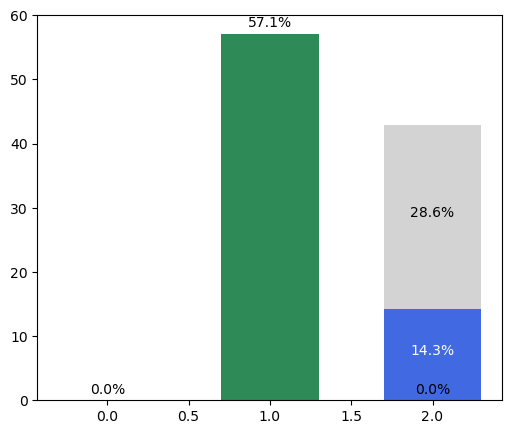

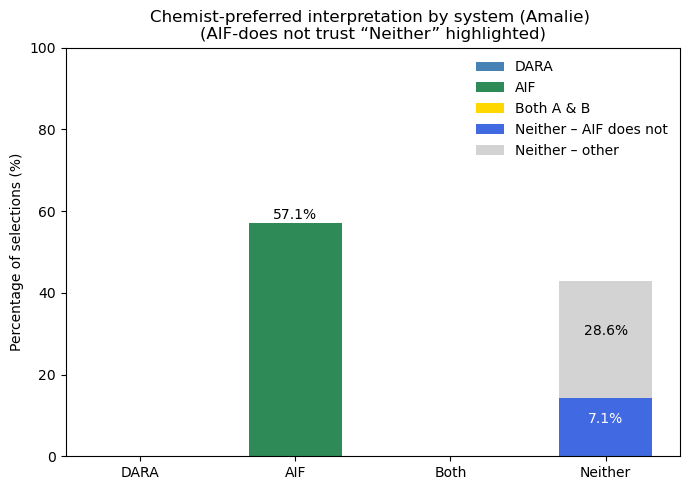

In [15]:
SPECIAL_NEITHER_RUNS = {"TRI-106", "ARR_45"}
# --------------------------------------------------
# 2.  percentage dictionary (unchanged)
# --------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# SPECIAL runs whose “Neither” answers AIF was expected to get right
SPECIAL_NEITHER_RUNS = {"TRI-106", "ARR_45"}

# --------------------------------------------------
# 1.  classify each row
# --------------------------------------------------
def classify(row):
    run_id  = str(row['Run Name in ALAB']).strip()
    choice  = str(row['Prefered Interpretation']).strip().upper()

    if choice == 'A':
        return row['Interpretation A decoding'].strip().lower()  # 'dara' / 'aif'
    if choice == 'B':
        return row['Interpretation B decoding'].strip().lower()

    if choice.startswith("BOTH"):
        return 'both'                       # chemist said “both A & B”

    # → chemist said “neither A nor B”
    if run_id in SPECIAL_NEITHER_RUNS:
        # credit AIF if its decoding is *aif*
        if str(row['Interpretation B decoding']).strip().lower() == 'aif':
            return 'neither_aif'            # correct-neither by AIF
    return 'neither_other'                  # all remaining Neither cases

evaluation_Amalie['class'] = evaluation_Amalie.apply(classify, axis=1)

# --------------------------------------------------
# 2.  get percentages we need
# --------------------------------------------------
counts = evaluation_Amalie['class'].value_counts()
tot    = counts.sum()

pct = {k: counts.get(k, 0) * 100 / tot for k in
       ['dara', 'aif', 'both', 'neither_aif', 'neither_other']}

# --------------------------------------------------
# 3.  plot: 3 separate bars + stacked Neither
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

xloc = [0, 1, 2]             # DARA, AIF, BOTH/Neither share slot 2
bar_w = 0.6

# DARA
ax.bar(xloc[0], pct['dara'], bar_w, color='steelblue', label='DARA')
ax.text(xloc[0], pct['dara'] + 1, f"{pct['dara']:.1f}%", ha='center')

# AIF
ax.bar(xloc[1], pct['aif'], bar_w, color='seagreen', label='AIF')
ax.text(xloc[1], pct['aif'] + 1, f"{pct['aif']:.1f}%", ha='center')

# BOTH (single-colour bar if it exists)
ax.bar(xloc[2], pct['both'], bar_w, color='gold', label='Both A & B')
ax.text(xloc[2], pct['both'] + 1, f"{pct['both']:.1f}%", ha='center')

# NEITHER stacked on the same x as BOTH
ax.bar(xloc[2], pct['neither_aif'], bar_w,
       bottom=pct['both'], color='royalblue',
       label='Neither (AIF right)')
ax.bar(xloc[2], pct['neither_other'], bar_w,
       bottom=pct['both'] + pct['neither_aif'],
       color='lightgrey', label='Neither (other)')

# labels on stacked pieces
stack_mid1 = pct['both'] + pct['neither_aif']/2
stack_mid2 = pct['both'] + pct['neither_aif'] + pct['neither_other']/2
if pct['neither_aif']>0:
    ax.text(xloc[2], stack_mid1, f"{pct['neither_aif']:.1f}%", ha='center', color='white')
if pct['neither_other']>0:
    ax.text(xloc[2], stack_mid2, f"{pct['neither_other']:.1f}%", ha='center')


counts = evaluation_Amalie['class'].value_counts()
tot    = counts.sum()

pct = {k: counts.get(k, 0) * 100 / tot for k in
       ['dara', 'aif', 'both', 'neither_aif', 'neither_other']}

# --------------------------------------------------
# 3.  BAR CHART
# --------------------------------------------------
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

# x-positions: DARA , AIF , BOTH , NEITHER
x = [0, 1, 2, 3]
w = 0.6

# single-height bars
ax.bar(x[0], pct['dara'],  w, color='steelblue', label='DARA')
ax.bar(x[1], pct['aif'],   w, color='seagreen',  label='AIF')
ax.bar(x[2], pct['both'],  w, color='gold',      label='Both A & B')

# stacked NEITHER bar
ax.bar(x[3], pct['neither_aif'],   w, color='royalblue',  label='Neither – AIF does not')
ax.bar(x[3], pct['neither_other'], w, color='lightgrey',
       bottom=pct['neither_aif'],  label='Neither – other')

# ----- labels on top of bars -----
def add_label(xpos, height, color='black'):
    if height > 0:
        ax.text(xpos, height + 1, f'{height:.1f}%', ha='center', color=color)

add_label(x[0], pct['dara'])
add_label(x[1], pct['aif'])
add_label(x[2], pct['both'])
# stacked labels for Neither
add_label(x[3], pct['neither_aif']/2,           color='white')  # centre of blue
add_label(x[3], pct['neither_aif'] + pct['neither_other']/2)    # centre of grey

# ----- cosmetics -----
ax.set_xticks(x)
ax.set_xticklabels(['DARA', 'AIF', 'Both', 'Neither'])
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of selections (%)')
ax.set_title('Chemist-preferred interpretation by system (Amalie) \n(AIF-does not trust “Neither” highlighted)')
ax.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

In [70]:
Observed == Observed1

True

In [71]:
bkg == bkg1

True

In [72]:
Observed == Observed2
# bkg == bkg2

True

In [73]:
Observed3 == Observed2
bkg3 == bkg2

True

In [63]:
here in the signal = 
here in the signal =  18501.845193737026
here in the bkg =  930.1918869795791

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
here in the signal =  19843.052088915643
here in the bkg =  693.1027641793287

here in the signal =  16639.481875293448
here in the bkg =  1995.377173232582

In [ ]:
  search_tree = search_phases(
                    pattern_path=pattern_path,
                    phases=all_cifs_new,
                    wavelength="Cu",
                    instrument_profile="Aeris-fds-Pixcel1d-Medipix3",
                    return_search_tree=True,
                )
                search_results = search_tree.get_search_results()
                final_refinement_params = {
                    "gewicht": "SPHAR4",
                    "lattice_range": 0.02,
                    "k1": "0_0^1",
                    "k2": "0_0^0.001",
                }

In [ ]:
search_tree = search_phases(
        pattern_path=pattern_path,
        phases=all_cifs,
        wavelength="Cu",
        instrument_profile="Aeris-fds-Pixcel1d-Medipix3",
        return_search_tree=True,
    )
    search_results = search_tree.get_search_results()
    
    # Perform initial final refinement
    final_refinement_params = {
        "gewicht": "SPHAR4",
        "lattice_range": 0.02,
        "k1": "0_0^1",
        "k2": "0_0^0.001",
    }

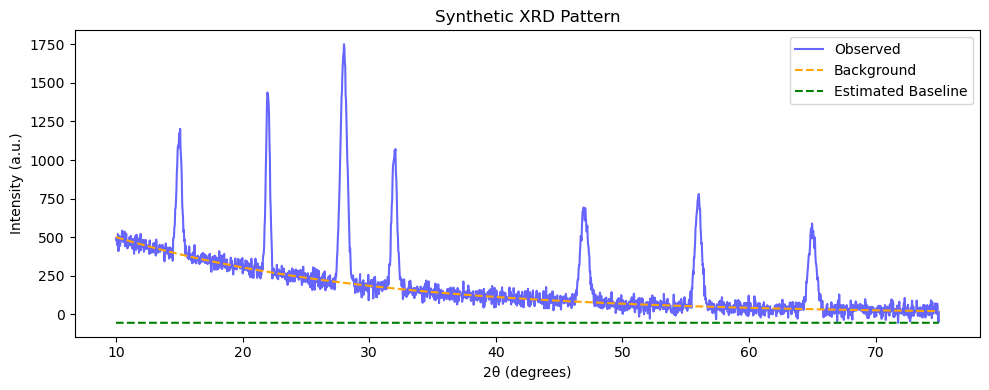

The mean difference bkg and baseline:  56.1346172460128
The max difference bkg and baseline:  56.1346172460128


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# 1. Simulated 2θ range
x = np.linspace(10, 75, 2000)  # 2θ range

# 2. Background: exponential decay
background = 500 * np.exp(-0.05 * (x - 10))

# 3. Add synthetic peaks
def add_peak(x, center, height, width):
    return height * np.exp(-((x - center)**2) / (2 * width**2))

# Define a few peak positions and intensities
peaks = [
    (15, 800, 0.2),
    (22, 1200, 0.15),
    (28, 1500, 0.25),
    (32, 900, 0.2),
    (47, 600, 0.3),
    (56, 700, 0.25),
    (65, 500, 0.3)
]

# Generate signal by summing peaks and background
signal = background.copy()
for center, height, width in peaks:
    signal += add_peak(x, center, height, width)

# 4. Add random noise
noise = np.random.normal(0, 30, size=len(x))
y_obs = signal + noise

# Optional: define a flat background model (for testing baseline)
y_bkg = np.zeros_like(x)
# baseline = np.min(y_obs) * np.ones_like(y_obs)
baseline = minimum_filter1d(y_obs, size=100, mode='reflect')
# 5. Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y_obs, label='Observed', color='blue', alpha=0.6)
plt.plot(x, background, label='Background', color='orange', linestyle='--')
plt.plot(x, baseline, label="Estimated Baseline",color='green', linestyle="--")
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.title("Synthetic XRD Pattern")
plt.tight_layout()
plt.show()
print("The mean difference bkg and baseline: " , np.mean(np.abs(y_bkg - baseline)))
print("The max difference bkg and baseline: " , np.max(np.abs(y_bkg- baseline)))

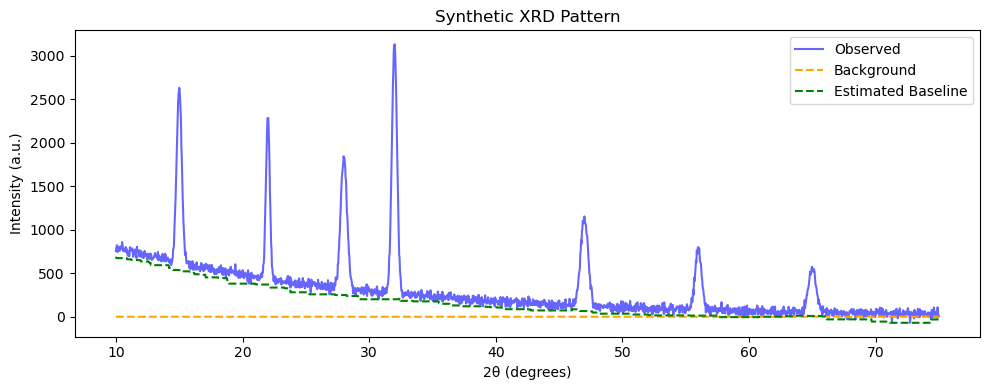

The mean difference bkg and baseline:  172.49711227212813
The max difference bkg and baseline:  688.7841572967992


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# 1. Simulated 2θ range
x = np.linspace(10, 75, 2000)  # 2θ range

# 2. Background: exponential decay
background = np.ones_like(x) * 0  # way too low everywhere
background1 = 800 * np.exp(-0.05 * (x - 10))

# 3. Add synthetic peaks
def add_peak(x, center, height, width):
    return height * np.exp(-((x - center)**2) / (2 * width**2))

# Define a few peak positions and intensities
peaks = [
    (15, 2000, 0.2),
    (22, 1900, 0.15),
    (28, 1500, 0.25),
    (32, 2900, 0.2),
    (47, 1000, 0.3),
    (56, 700, 0.25),
    (65, 500, 0.3)
]

# Generate signal by summing peaks and background
signal = background1.copy()
for center, height, width in peaks:
    signal += add_peak(x, center, height, width)

# 4. Add random noise
noise = np.random.normal(0, 30, size=len(x))
y_obs = signal + noise

# Optional: define a flat background model (for testing baseline)
y_bkg = np.zeros_like(x)
# baseline = np.min(y_obs) * np.ones_like(y_obs)
baseline = minimum_filter1d(y_obs, size=100, mode='reflect')
# 5. Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y_obs, label='Observed', color='blue', alpha=0.6)
plt.plot(x, background, label='Background', color='orange', linestyle='--')
plt.plot(x, baseline, label="Estimated Baseline",color='green', linestyle="--")
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.title("Synthetic XRD Pattern")
plt.tight_layout()
plt.show()
print("The mean difference bkg and baseline: " , np.mean(np.abs(y_bkg - baseline)))
print("The max difference bkg and baseline: " , np.max(np.abs(y_bkg- baseline)))

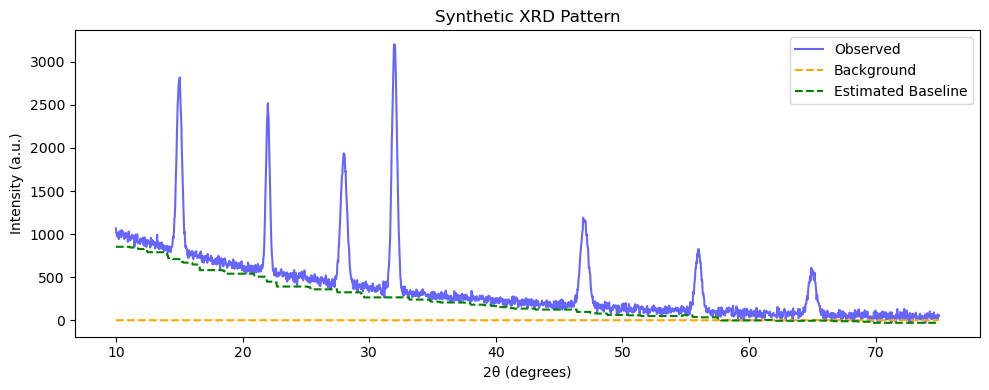

The mean difference bkg and baseline:  229.4643506790239
The max difference bkg and baseline:  852.7750596559024


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# 1. Simulated 2θ range
x = np.linspace(10, 75, 2000)  # 2θ range

# 2. Background: exponential decay
background = np.ones_like(x) * 0  # way too low everywhere
background1 = 800 * np.exp(-0.05 * (x - 15))

# 3. Add synthetic peaks
def add_peak(x, center, height, width):
    return height * np.exp(-((x - center)**2) / (2 * width**2))

# Define a few peak positions and intensities
peaks = [
    (15, 2000, 0.2),
    (22, 1900, 0.15),
    (28, 1500, 0.25),
    (32, 2900, 0.2),
    (47, 1000, 0.3),
    (56, 700, 0.25),
    (65, 500, 0.3)
]

# Generate signal by summing peaks and background
signal = background1.copy()
for center, height, width in peaks:
    signal += add_peak(x, center, height, width)

# 4. Add random noise
noise = np.random.normal(0, 30, size=len(x))
y_obs = signal + noise

# Optional: define a flat background model (for testing baseline)
y_bkg = np.zeros_like(x)
# baseline = np.min(y_obs) * np.ones_like(y_obs)
baseline = minimum_filter1d(y_obs, size=100, mode='reflect')
# 5. Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y_obs, label='Observed', color='blue', alpha=0.6)
plt.plot(x, background, label='Background', color='orange', linestyle='--')
plt.plot(x, baseline, label="Estimated Baseline",color='green', linestyle="--")
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.title("Synthetic XRD Pattern")
plt.tight_layout()
plt.show()
print("The mean difference bkg and baseline: " , np.mean(np.abs(y_bkg - baseline)))
print("The max difference bkg and baseline: " , np.max(np.abs(y_bkg- baseline)))

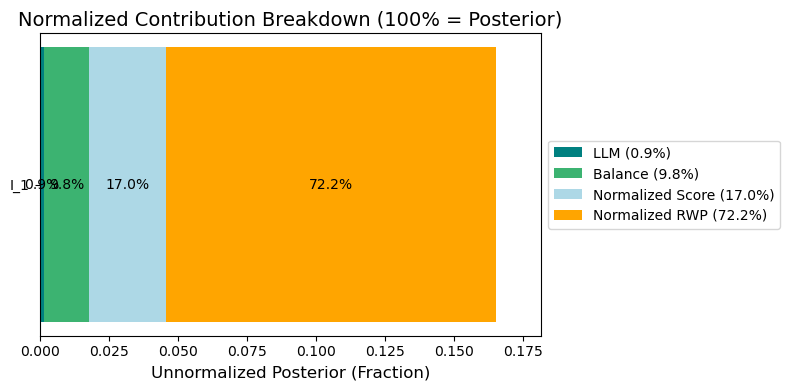

Unnormalized Posterior: 0.165290
LLM                 :   0.9%  -> 0.001547
Balance             :   9.8%  -> 0.016241
Normalized Score    :  17.0%  -> 0.028083
Normalized RWP      :  72.2%  -> 0.119419


In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Input data for TRI_85["I_1"]
data = {
    "balance_score": 0.375,
    "LLM_interpretation_likelihood": 0.05,
    "normalized_score": 0.394051791494656,
    "normalized_rwp": 0.8378333333333333,
    "unnormalized_posterior": 0.16529001575593893
}

# === You can adjust these weights if needed ===
w_b = 0.7           # weight for balance score
w_llm = 0.5         # weight for LLM interpretation likelihood
w_score = 0.5      # weight for normalized score
w_rwp = 1         # weight for normalized RWP
# === Step 1: compute weighted averages ===
prior_avg = (data["balance_score"] * w_b + data["LLM_interpretation_likelihood"] * w_llm) / (w_b + w_llm)
fit_quality_avg = (data["normalized_score"] * w_score + data["normalized_rwp"] * w_rwp) / (w_score + w_rwp)

# === Step 2: compute contribution of each factor ===
C_balance = (data["balance_score"] * w_b / (w_b + w_llm)) * prior_avg
C_llm     = (data["LLM_interpretation_likelihood"] * w_llm / (w_b + w_llm)) * prior_avg
C_score   = (data["normalized_score"] * w_score / (w_score + w_rwp)) * fit_quality_avg
C_rwp     = (data["normalized_rwp"] * w_rwp / (w_score + w_rwp)) * fit_quality_avg

# Total (sanity check)
total_contribution = C_balance + C_llm + C_score + C_rwp
posterior = data["unnormalized_posterior"]


# === Step 3: convert to percentage of actual posterior ===
percent_llm     = (C_llm / posterior) * 100
percent_balance = (C_balance / posterior) * 100
percent_score   = (C_score / posterior) * 100
percent_rwp     = (C_rwp / posterior) * 100

# === Step 4: Plot ===
components = ["LLM", "Balance", "Normalized Score", "Normalized RWP"]
colors = ["teal", "mediumseagreen", "lightblue", "orange"]
# percentages = [percent_llm, percent_balance, percent_score, percent_rwp]

percentages = [(C / total_contribution) * 100 for C in [C_llm, C_balance, C_score, C_rwp]]
values = [(p / 100) * posterior for p in percentages]

fig, ax = plt.subplots(figsize=(8, 4))
left = 0
for val, color, label, pct in zip(values, colors, components, percentages):
    ax.barh(["I_1"], [val], left=left, label=f"{label} ({pct:.1f}%)", color=color)
    ax.text(left + val / 2, 0, f"{pct:.1f}%", va='center', ha='center', color="black", fontsize=10)
    left += val

# Final formatting
ax.set_xlim(0, posterior * 1.1)
ax.set_xlabel("Unnormalized Posterior (Fraction)", fontsize=12)
ax.set_title("Normalized Contribution Breakdown (100% = Posterior)", fontsize=14)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

# Print exact values for reference
print(f"Unnormalized Posterior: {posterior:.6f}")
for name, pct, val in zip(components, percentages, values):
    print(f"{name:20s}: {pct:5.1f}%  -> {val:.6f}")

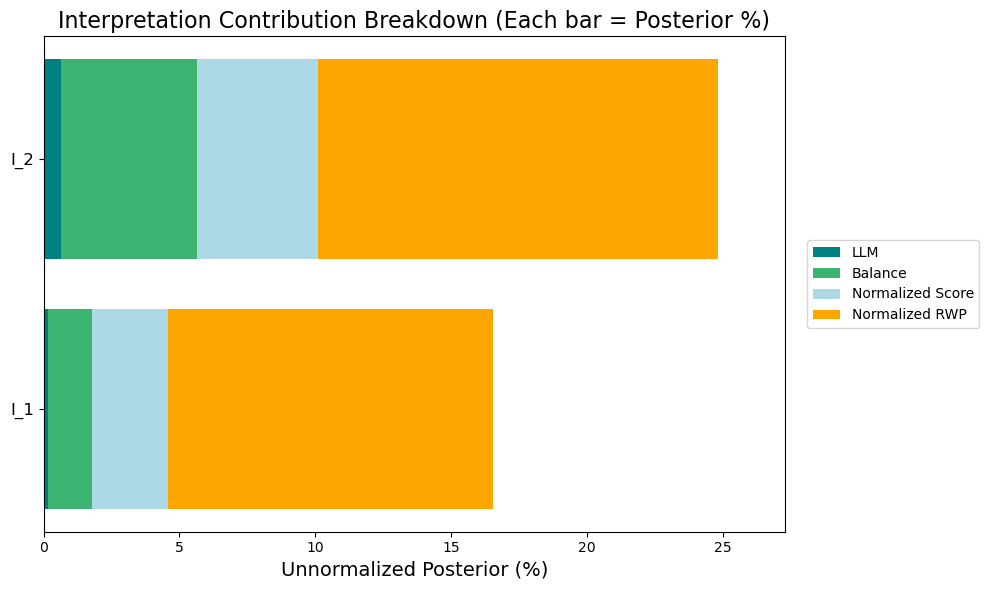

In [67]:
import matplotlib.pyplot as plt

# === INTERPRETATIONS DICTIONARY (EXAMPLE) ===
interpretations = {
    "I_1": {
        "balance_score": 0.375,
        "LLM_interpretation_likelihood": 0.05,
        "normalized_score": 0.394,
        "normalized_rwp": 0.838,
        "unnormalized_posterior": 0.1653
    },
    "I_2": {
        "balance_score": 0.65,
        "LLM_interpretation_likelihood": 0.12,
        "normalized_score": 0.55,
        "normalized_rwp": 0.91,
        "unnormalized_posterior": 0.2481
    }
}

# === Adjustable weights ===
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0

# === Setup for plotting ===
components = ["LLM", "Balance", "Normalized Score", "Normalized RWP"]
colors = ["teal", "mediumseagreen", "lightblue", "orange"]

fig, ax = plt.subplots(figsize=(10, 6))
y_labels = []
y_positions = []

# === Loop through interpretations ===
for idx, (label, data) in enumerate(interpretations.items()):
    # Extract
    bal = data["balance_score"]
    llm = data["LLM_interpretation_likelihood"]
    score = data["normalized_score"]
    rwp = data["normalized_rwp"]
    posterior = data["unnormalized_posterior"]

    # Weighted means
    prior_avg = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality_avg = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)

    # Component contributions
    C_balance = (bal * w_b / (w_b + w_llm)) * prior_avg
    C_llm     = (llm * w_llm / (w_b + w_llm)) * prior_avg
    C_score   = (score * w_score / (w_score + w_rwp)) * fit_quality_avg
    C_rwp     = (rwp * w_rwp / (w_score + w_rwp)) * fit_quality_avg

    # Normalize by total contribution (not posterior)
    total_contribution = C_balance + C_llm + C_score + C_rwp
    percentages = [(C / total_contribution) * 100 for C in [C_llm, C_balance, C_score, C_rwp]]
    values = [(p / 100) * posterior for p in percentages]

    # Plot bar
    left = 0
    for val, color in zip(values, colors):
        ax.barh([idx], [val * 100], left=left * 100, color=color)
        left += val

    y_labels.append(label)
    y_positions.append(idx)

# === Labels & Formatting ===
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels, fontsize=12)
ax.set_xlabel("Unnormalized Posterior (%)", fontsize=14)
ax.set_title("Interpretation Contribution Breakdown (Each bar = Posterior %)", fontsize=16)
ax.set_xlim(0, max(d["unnormalized_posterior"] for d in interpretations.values()) * 100 * 1.1)
ax.legend(components, loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

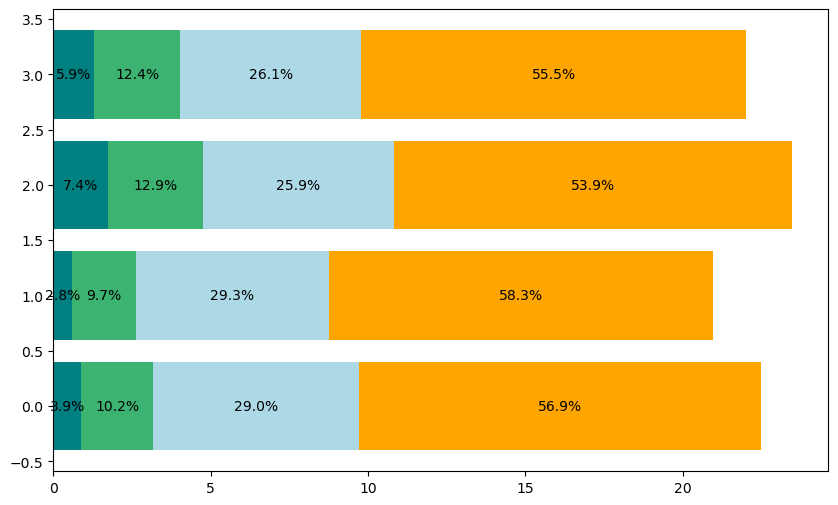

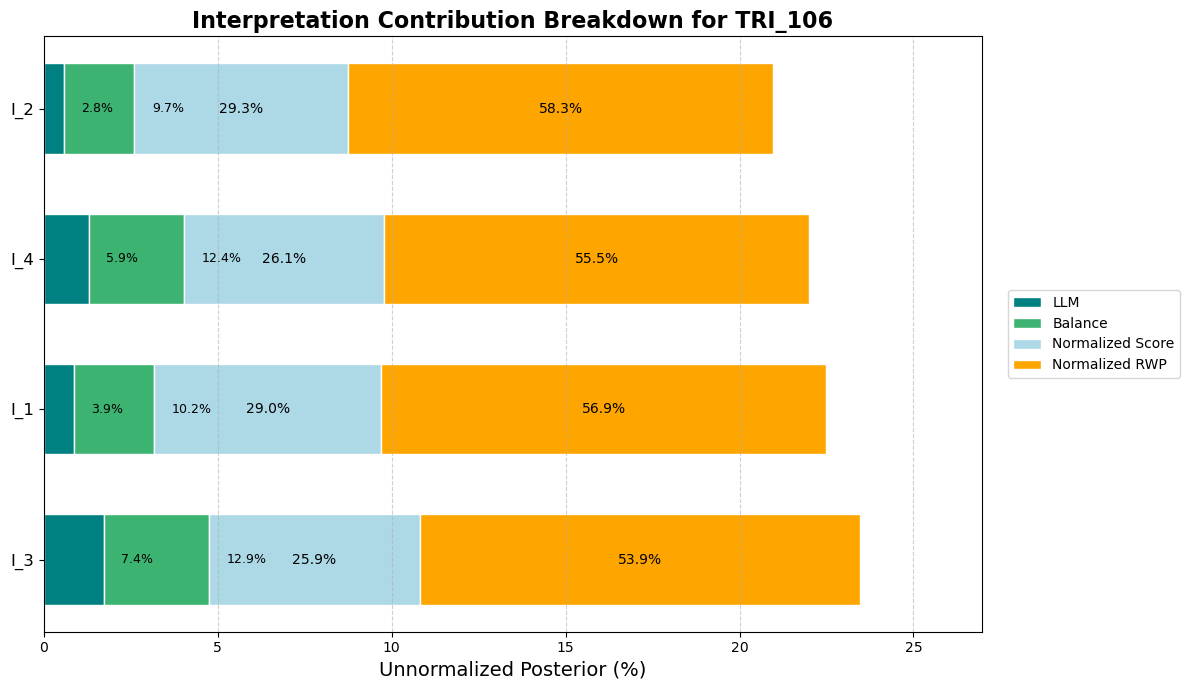

In [77]:
import matplotlib.pyplot as plt

# === Example dictionary (can be replaced by yours) ===
interpretations = {
    "TRI_85": {
        "I_1": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.05,
            "normalized_score": 0.394051791494656,
            "normalized_rwp": 0.8378333333333333,
            "unnormalized_posterior": 0.16529001575593893
        },
        "I_2": {
            "balance_score": 0.6,
            "LLM_interpretation_likelihood": 0.12,
            "normalized_score": 0.55,
            "normalized_rwp": 0.91,
            "unnormalized_posterior": 0.2481
        }
    }
}
interpretations = {
"TRI_106": {
        "I_1": {
            "phases": [
                "V2O3_167",
                "CO_194"
            ],
            "weight_fraction": [
                59.175737445053834,
                40.824262554946166
            ],
            "rwp": 15.59,
            "search_result_rwp": 19.3,
            "score": 0.5383758439425976,
            "search_result_score": 0.3707463951029496,
            "dara_score": 0.5383758439425976,
            "normalized_rwp": 0.7401666666666666,
            "missing_peaks": 29,
            "extra_peaks": 2,
            "peaks_calculated": 31,
            "peaks_observed": 78,
            "flag": 178572.42,
            "normalized_flag": 2.1875982488670753,
            "excess_bkg_high_intesity_peaks": 11.989323843416377,
            "excess_bkg_low_angle_region": 21.403212851405627,
            "excess_bkg_high_angle_region": 21.629629629629637,
            "signal_above_bkg": 88.12979472142159,
            "signal_above_bkg_score": 19434.20197830532,
            "bkg_overshoot_score": 2617.593376190528,
            "abs_diff_score": 22051.795354495844,
            "interpretation_importance": 99.72418259464905,
            "balance_score": 0.375,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8,
                "CO (space group 194)": 0.05
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 is a plausible phase under reducing conditions, such as those provided by carbon and argon atmosphere. Space group 167 (R-3c) is a known stable form of V2O3.",
                "CO (space group 194)": "CO is a gas at the synthesis temperature and cannot exist as a solid phase. Its presence as a solid phase is physically implausible."
            },
            "LLM_interpretation_likelihood": 0.2,
            "LLM_interpretation_explanation": "While V2O3 is a plausible phase, the inclusion of CO as a solid phase is highly implausible, significantly reducing the overall likelihood of this interpretation.",
            "normalized_score": 0.7537667182308362,
            "prior_probability": 0.3020833333333333,
            "fit_quality": 0.7447000171880566,
            "trustworthy": False,
            "unnormalized_posterior": 0.22496146352555874,
            "posterior_probability": 0.2529894894459954,
            "adjusted_posterior_probability": 0.025298948944599543
        },
        "I_2": {
            "phases": [
                "V2O3_15",
                "CO_194"
            ],
            "weight_fraction": [
                58.66625158878149,
                41.33374841121851
            ],
            "rwp": 15.33,
            "search_result_rwp": 19.8,
            "score": 0.5299088748357331,
            "search_result_score": 0.3825159705876629,
            "dara_score": 0.5299088748357331,
            "normalized_rwp": 0.7445,
            "missing_peaks": 30,
            "extra_peaks": 2,
            "peaks_calculated": 30,
            "peaks_observed": 78,
            "flag": 177766.28000000003,
            "normalized_flag": 2.177722645163314,
            "excess_bkg_high_intesity_peaks": 11.553973902728348,
            "excess_bkg_low_angle_region": 21.229718875502,
            "excess_bkg_high_angle_region": 21.744639376218316,
            "signal_above_bkg": 88.25362100005947,
            "signal_above_bkg_score": 19463.703291773836,
            "bkg_overshoot_score": 2590.579661398786,
            "abs_diff_score": 22054.28295317262,
            "interpretation_importance": 100.0,
            "balance_score": 0.375,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.6,
                "CO (space group 194)": 0.05
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "Space group 15 (C2/c) is less common for V2O3 and may represent a metastable or kinetically trapped form. Its likelihood is reduced compared to the more stable R-3c form.",
                "CO (space group 194)": "As in I_1, CO is a gas at the synthesis temperature and cannot exist as a solid phase."
            },
            "LLM_interpretation_likelihood": 0.15,
            "LLM_interpretation_explanation": "The presence of a less stable V2O3 polymorph and the implausible CO phase reduce the credibility of this interpretation.",
            "normalized_score": 0.7474505940667605,
            "prior_probability": 0.28125,
            "fit_quality": 0.7454835313555869,
            "trustworthy": False,
            "unnormalized_posterior": 0.20966724319375882,
            "posterior_probability": 0.23578975695591484,
            "adjusted_posterior_probability": 0.023578975695591486
        },
        "I_3": {"phases": [
                "V2O3_167"
            ],
            "weight_fraction": [
                100.0
            ],
            "rwp": 18.5,
            "search_result_rwp": 20.8,
            "score": 0.4231971469788785,
            "search_result_score": 0.290430485332541,
            "dara_score": 0.4231971469788785,
            "normalized_rwp": 0.6916666666666667,
            "missing_peaks": 35,
            "extra_peaks": 0,
            "peaks_calculated": 23,
            "peaks_observed": 78,
            "flag": 227052.65,
            "normalized_flag": 2.781504442514857,
            "excess_bkg_high_intesity_peaks": 21.56583629893238,
            "excess_bkg_low_angle_region": 30.913439635535315,
            "excess_bkg_high_angle_region": 22.45029239766081,
            "signal_above_bkg": 84.41266796654321,
            "signal_above_bkg_score": 18371.025572999282,
            "bkg_overshoot_score": 3392.3258475250154,
            "abs_diff_score": 21763.351420524297,
            "interpretation_importance": 3.3959316466306735,
            "balance_score": 0.375,
            "LLM_phases_likelihood": {
                "V2O3 (space group 167)": 0.8
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 167)": "V2O3 in space group 167 is a stable phase under the given reducing conditions and temperature, making it a likely product."
            },
            "LLM_interpretation_likelihood": 0.3,
            "LLM_interpretation_explanation": "While V2O3 is plausible, the absence of other expected phases or by-products, such as unreacted precursors or other vanadium oxides, reduces the completeness and likelihood of this single-phase interpretation.",
            "normalized_score": 0.6637761168000017,
            "prior_probability": 0.34375,
            "fit_quality": 0.6823698167111116,
            "trustworthy": False,
            "unnormalized_posterior": 0.23456462449444462,
            "posterior_probability": 0.2637891115346476,
            "adjusted_posterior_probability": 0.026378911153464763
        },
        "I_4": {
            "phases": [
                "V2O3_15"
            ],
            "weight_fraction": [
                100.0
                           ],
            "rwp": 18.29,
            "search_result_rwp": 21.31,
            "score": 0.41087638654169895,
            "search_result_score": 0.3298415778373441,
            "dara_score": 0.41087638654169895,
            "normalized_rwp": 0.6951666666666667,
            "missing_peaks": 35,
            "extra_peaks": 0,
            "peaks_calculated": 23,
            "peaks_observed": 78,
            "flag": 227051.93,
            "normalized_flag": 2.7814956221676885,
            "excess_bkg_high_intesity_peaks": 21.22775800711744,
            "excess_bkg_low_angle_region": 30.320045558086566,
            "excess_bkg_high_angle_region": 22.553606237816773,
            "signal_above_bkg": 84.48292095359542,
            "signal_above_bkg_score": 18378.524539554466,
            "bkg_overshoot_score": 3375.605564030896,
            "abs_diff_score": 21754.13010358536,
            "interpretation_importance": 0.0,
            "balance_score": 0.375,
            "LLM_phases_likelihood": {
                "V2O3 (space group 15)": 0.6
            },
            "LLM_phases_explanation": {
                "V2O3 (space group 15)": "This polymorph is less stable than the R-3c form and may be present due to kinetic factors, but its likelihood is reduced."
            },
            "LLM_interpretation_likelihood": 0.25,
            "LLM_interpretation_explanation": "The interpretation is limited by the presence of only a less stable V2O3 polymorph and lacks other expected phases, reducing its overall plausibility.",
            "normalized_score": 0.6537174497565836,
            "prior_probability": 0.32291666666666663,
            "fit_quality": 0.6813502610299723,
            "trustworthy": False,
            "unnormalized_posterior": 0.22001935512426188,
            "posterior_probability": 0.24743164206344223,
            "adjusted_posterior_probability": 0.024743164206344224
        }
    }
}
# === Adjustable weights ===
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0

# === Plot setup ===
components = ["LLM", "Balance", "Normalized Score", "Normalized RWP"]
colors = ["teal", "mediumseagreen", "lightblue", "orange"]
fig, ax = plt.subplots(figsize=(10, 6))
y_labels = []
y_positions = []

# === Loop through interpretations ===
for idx, (interp_name, data) in enumerate(interpretations["TRI_106"].items()):
    bal = data["balance_score"]
    llm = data["LLM_interpretation_likelihood"]
    score = data["normalized_score"]
    rwp = data["normalized_rwp"]
    posterior = data["unnormalized_posterior"]

    # Compute weighted means
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)

    # Contributions from each component
    C_balance = (bal * w_b / (w_b + w_llm)) * prior
    C_llm     = (llm * w_llm / (w_b + w_llm)) * prior
    C_score   = (score * w_score / (w_score + w_rwp)) * fit_quality
    C_rwp     = (rwp * w_rwp / (w_score + w_rwp)) * fit_quality

    # Normalize components by total influence
    total_contribution = C_llm + C_balance + C_score + C_rwp
    percentages = [(C / total_contribution) * 100 for C in [C_llm, C_balance, C_score, C_rwp]]
    values = [(p / 100) * posterior * 100 for p in percentages]  # scale posterior to %

    # Plot stacked horizontal bar
    left = 0
    for val, color, pct in zip(values, colors, percentages):
        ax.barh([idx], [val], left=left, color=color)
        ax.text(left + val / 2, idx, f"{pct:.1f}%", va='center', ha='center', color="black", fontsize=10)
        left += val
    # for val, color, pct in zip(values, colors, percentages):
    #     ax.barh([idx], [val], left=left, color=color)

    #     # Conditionally position label based on width
    #     if val > 1.0:  # if bar segment > 1% of full width (adjust as needed)
    #         ax.text(left + val / 2, idx, f"{pct:.1f}%", va='center', ha='center', color="black", fontsize=10)
    #     else:
    #         ax.text(left + val + 0.2, idx, f"{pct:.1f}%", va='center', ha='left', color="black", fontsize=9)

    #     left += val

    y_labels.append(interp_name)
    y_positions.append(idx)

# === Final plot formatting ===
# ax.set_yticks(y_positions)
# ax.set_yticklabels(y_labels, fontsize=12)
# ax.set_xlabel("Unnormalized Posterior (%)", fontsize=14)
# ax.set_title("Interpretation Contribution Breakdown for TRI_106", fontsize=16)
# ax.set_xlim(0, max(d["unnormalized_posterior"] for d in interpretations["TRI_106"].values()) * 100 * 1.1)
# ax.legend(components, loc="center left", bbox_to_anchor=(1.02, 0.5))
# plt.tight_layout()
# plt.show()

fig, ax = plt.subplots(figsize=(12, 7))
bar_height = 0.6
spacing = 0.4  # extra spacing between bars
y_positions = [i * (bar_height + spacing) for i in range(len(interpretations["TRI_106"]))]

# Sort by posterior size (optional)
sorted_items = sorted(interpretations["TRI_106"].items(), key=lambda x: x[1]["unnormalized_posterior"], reverse=True)

# Reuse your weights
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0
components = ["LLM", "Balance", "Normalized Score", "Normalized RWP"]
colors = ["teal", "mediumseagreen", "lightblue", "orange"]

# Plot each interpretation
for idx, (interp_name, data) in enumerate(sorted_items):
    bal = data["balance_score"]
    llm = data["LLM_interpretation_likelihood"]
    score = data["normalized_score"]
    rwp = data["normalized_rwp"]
    posterior = data["unnormalized_posterior"]

    # Compute contributions
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    C_balance = (bal * w_b / (w_b + w_llm)) * prior
    C_llm = (llm * w_llm / (w_b + w_llm)) * prior
    C_score = (score * w_score / (w_score + w_rwp)) * fit_quality
    C_rwp = (rwp * w_rwp / (w_score + w_rwp)) * fit_quality

    total_contribution = C_llm + C_balance + C_score + C_rwp
    percentages = [(C / total_contribution) * 100 for C in [C_llm, C_balance, C_score, C_rwp]]
    values = [(p / 100) * posterior * 100 for p in percentages]

    # Draw stacked bars with smart text placement
    left = 0
    for val, color, pct in zip(values, colors, percentages):
        bar = ax.barh([y_positions[idx]], [val], left=left, height=bar_height, color=color, edgecolor='white', linewidth=1)
        text = f"{pct:.1f}%"
        if val > 5:
            ax.text(left + val / 2, y_positions[idx], text, ha='center', va='center', color='black', fontsize=10)
        else:
            ax.text(left + val + 0.5, y_positions[idx], text, ha='left', va='center', color='black', fontsize=9)
        left += val

# Final labels and styling
ax.set_yticks(y_positions)
ax.set_yticklabels([k for k, _ in sorted_items], fontsize=12)
ax.set_xlabel("Unnormalized Posterior (%)", fontsize=14)
ax.set_title("Interpretation Contribution Breakdown for TRI_106", fontsize=16, fontweight='bold')
ax.legend(components, loc="center left", bbox_to_anchor=(1.02, 0.5))
ax.set_xlim(0, max(data["unnormalized_posterior"] for _, data in sorted_items) * 100 * 1.15)
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

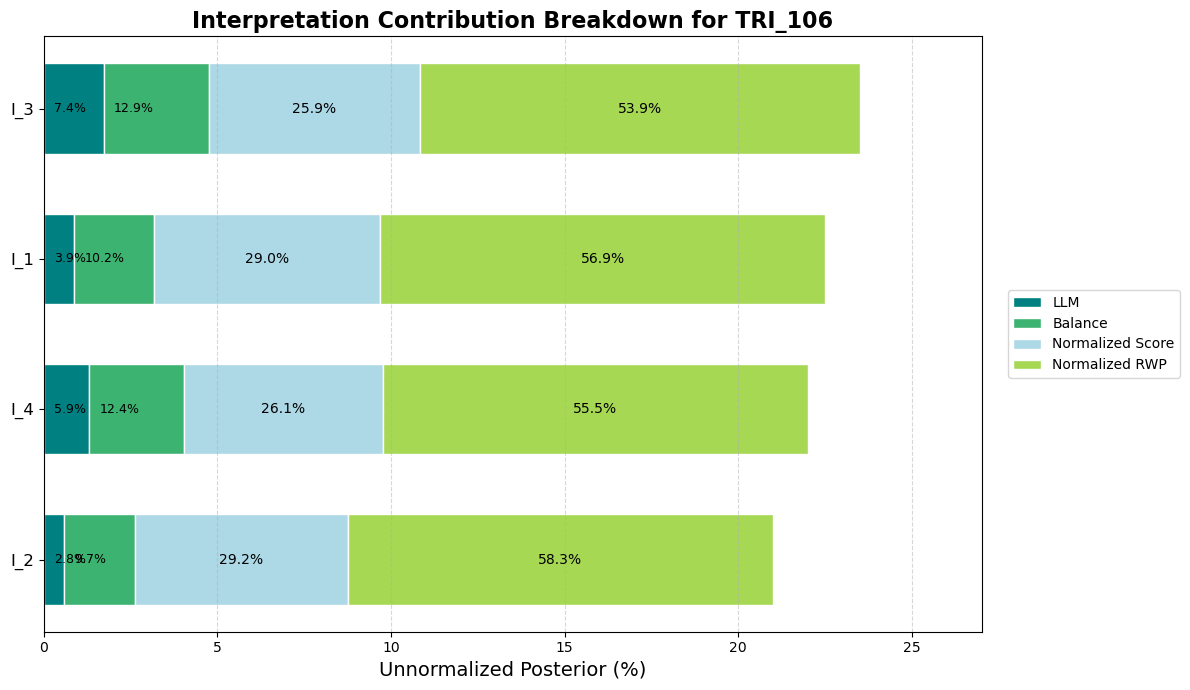

In [79]:
import matplotlib.pyplot as plt

# Sample interpretation structure (TRI_106 shown here)
interpretations = {
    "TRI_106": {
        "I_1": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.2,
            "normalized_score": 0.7538,
            "normalized_rwp": 0.7402,
            "unnormalized_posterior": 0.225
        },
        "I_2": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.15,
            "normalized_score": 0.747,
            "normalized_rwp": 0.7445,
            "unnormalized_posterior": 0.210
        },
        "I_3": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.3,
            "normalized_score": 0.6637,
            "normalized_rwp": 0.6917,
            "unnormalized_posterior": 0.235
        },
        "I_4": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.25,
            "normalized_score": 0.6537,
            "normalized_rwp": 0.6952,
            "unnormalized_posterior": 0.220
        }
    }
}

# Adjustable weights
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0

# Plotting settings
components = ["LLM", "Balance", "Normalized Score", "Normalized RWP"]
colors = ["#1b9e77", "#66c2a5", "#a6d854", "#b2df8a"]  # teal and green tones
colors = ["teal", "mediumseagreen", "lightblue", "#a6d854"]
bar_height = 0.6
spacing = 0.4

# Setup figure
fig, ax = plt.subplots(figsize=(12, 7))
sorted_items = sorted(interpretations["TRI_106"].items(), key=lambda x: x[1]["unnormalized_posterior"], reverse=True)[::-1]
y_positions = [i * (bar_height + spacing) for i in range(len(sorted_items))]

# Loop through interpretations
for idx, (interp_name, data) in enumerate(sorted_items):
    bal = data["balance_score"]
    llm = data["LLM_interpretation_likelihood"]
    score = data["normalized_score"]
    rwp = data["normalized_rwp"]
    posterior = data["unnormalized_posterior"]

    # Compute component contributions
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    C_balance = (bal * w_b / (w_b + w_llm)) * prior
    C_llm = (llm * w_llm / (w_b + w_llm)) * prior
    C_score = (score * w_score / (w_score + w_rwp)) * fit_quality
    C_rwp = (rwp * w_rwp / (w_score + w_rwp)) * fit_quality

    # Normalize for display
    total_contribution = C_llm + C_balance + C_score + C_rwp
    percentages = [(C / total_contribution) * 100 for C in [C_llm, C_balance, C_score, C_rwp]]
    values = [(p / 100) * posterior * 100 for p in percentages]  # convert to %

    # Plot bar with dynamic text
    left = 0
    for val, color, pct in zip(values, colors, percentages):
        ax.barh([y_positions[idx]], [val], left=left, height=bar_height, color=color, edgecolor='white')
        label_text = f"{pct:.1f}%"

        if val > 5:
            ax.text(left + val / 2, y_positions[idx], label_text, ha='center', va='center', fontsize=10, color='black')
        elif pct > 1:
            ax.text(left + 0.3, y_positions[idx], label_text, ha='left', va='center', fontsize=9, color='black')

        left += val

# Label formatting
ax.set_yticks(y_positions)
ax.set_yticklabels([k for k, _ in sorted_items], fontsize=12)
ax.set_xlabel("Unnormalized Posterior (%)", fontsize=14)
ax.set_title("Interpretation Contribution Breakdown for TRI_106", fontsize=16, fontweight='bold')
ax.set_xlim(0, max(d["unnormalized_posterior"] for _, d in sorted_items) * 100 * 1.15)
ax.legend(components, loc="center left", bbox_to_anchor=(1.02, 0.5))
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

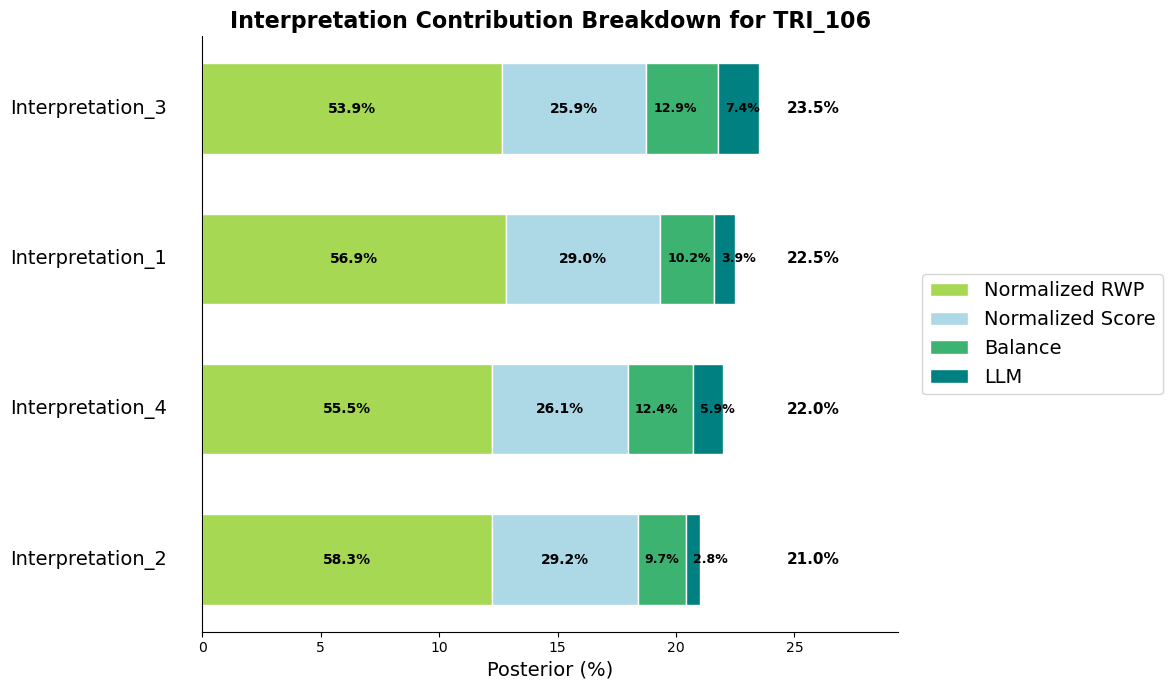

In [98]:
import matplotlib.pyplot as plt

# Sample data
interpretations = {
    "TRI_106": {
        "I_1": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.2,
            "normalized_score": 0.7538,
            "normalized_rwp": 0.7402,
            "unnormalized_posterior": 0.225
        },
        "I_2": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.15,
            "normalized_score": 0.747,
            "normalized_rwp": 0.7445,
            "unnormalized_posterior": 0.210
        },
        "I_3": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.3,
            "normalized_score": 0.6637,
            "normalized_rwp": 0.6917,
            "unnormalized_posterior": 0.235
        },
        "I_4": {
            "balance_score": 0.375,
            "LLM_interpretation_likelihood": 0.25,
            "normalized_score": 0.6537,
            "normalized_rwp": 0.6952,
            "unnormalized_posterior": 0.220
        }
    }
}

# Adjustable weights
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0

# Bar layout
components = ["Normalized RWP", "Normalized Score", "Balance", "LLM"]
colors = ["#b2df8a", "#a6d854", "#66c2a5", "#1b9e77"]  # Reordered to match

colors = [ "#a6d854", "lightblue","mediumseagreen","teal"]
bar_height = 0.6
spacing = 0.4

# Prepare figure
fig, ax = plt.subplots(figsize=(12, 7))
sorted_items = sorted(interpretations["TRI_106"].items(), key=lambda x: x[1]["unnormalized_posterior"], reverse=True)[::-1]
y_positions = [i * (bar_height + spacing) for i in range(len(sorted_items))]

# Plot each interpretation
for idx, (interp_key, data) in enumerate(sorted_items):
    label = f"Interpretation_{interp_key.split('_')[1]}"
    bal = data["balance_score"]
    llm = data["LLM_interpretation_likelihood"]
    score = data["normalized_score"]
    rwp = data["normalized_rwp"]
    posterior = data["unnormalized_posterior"]

    # Compute contributions
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    C_balance = (bal * w_b / (w_b + w_llm)) * prior
    C_llm = (llm * w_llm / (w_b + w_llm)) * prior
    C_score = (score * w_score / (w_score + w_rwp)) * fit_quality
    C_rwp = (rwp * w_rwp / (w_score + w_rwp)) * fit_quality

    # Reorder values to match new stack order
    total_contribution = C_llm + C_balance + C_score + C_rwp
    contributions = [C_rwp, C_score, C_balance, C_llm]
    percentages = [(C / total_contribution) * 100 for C in contributions]
    values = [(p / 100) * posterior * 100 for p in percentages]  # scale

    # Plot stacked bar
    left = 0
    for val, color, pct in zip(values, colors, percentages):
        ax.barh([y_positions[idx]], [val], left=left, height=bar_height,
                color=color, edgecolor='white')
        label_text = f"{pct:.1f}%"
        if val > 5:
            ax.text(left + val / 2, y_positions[idx], label_text, ha='center', va='center',
                    fontsize=10, color='black', fontweight='bold')
        elif pct > 1:
            ax.text(left + 0.3, y_positions[idx], label_text, ha='left', va='center',
                    fontsize=9, color='black', fontweight='bold')
        left += val
    # Posterior label at the end
    # After this line (already in your code)
    max_posterior = max(d["unnormalized_posterior"] for _, d in sorted_items) * 100

    # Replace the current posterior text line with this:
    posterior_label_x = max_posterior * 1.05  # always 5% beyond max
    ax.text(posterior_label_x, y_positions[idx], f"{posterior*100:.1f}%", 
            ha='left', va='center', fontsize=11, fontweight='bold', color='black')
    # ax.text(left + 2, y_positions[idx], f"{posterior*100:.1f}%", ha='left', va='center',
    #         fontsize=11, fontweight='bold', color='black')
    
    # Label for the interpretation
    ax.text(-1.5, y_positions[idx], label, va='center', ha='right', fontsize=14)

# Final formatting
ax.set_yticks([])  # hide ticks
ax.set_ylabel("")
ax.set_xlabel("Posterior (%)", fontsize=14)
ax.set_title("Interpretation Contribution Breakdown for TRI_106", fontsize=16, fontweight='bold')
ax.set_xlim(0, max(d["unnormalized_posterior"] for _, d in sorted_items) * 100 * 1.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(components, loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=14)
plt.tight_layout()
plt.show()

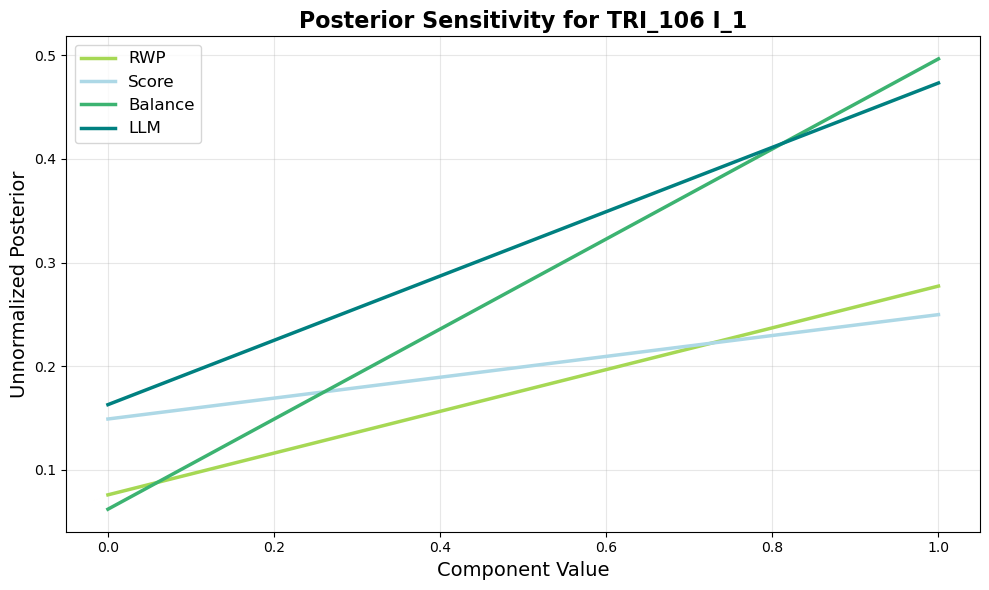

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Component weights
w_b, w_llm = 0.7, 0.5
w_score, w_rwp = 0.5, 1.0

# Fixed values from TRI_106 I_1
data = {
    "balance_score": 0.375,
    "LLM_interpretation_likelihood": 0.2,
    "normalized_score": 0.7538,
    "normalized_rwp": 0.7402
}

# Function to compute posterior
def compute_posterior(balance, llm, score, rwp):
    prior = (balance * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    return prior * fit_quality

# Vary each component from 0 to 1
x = np.linspace(0, 1, 100)
posterior_llm = [compute_posterior(data["balance_score"], v, data["normalized_score"], data["normalized_rwp"]) for v in x]
posterior_balance = [compute_posterior(v, data["LLM_interpretation_likelihood"], data["normalized_score"], data["normalized_rwp"]) for v in x]
posterior_score = [compute_posterior(data["balance_score"], data["LLM_interpretation_likelihood"], v, data["normalized_rwp"]) for v in x]
posterior_rwp = [compute_posterior(data["balance_score"], data["LLM_interpretation_likelihood"], data["normalized_score"], v) for v in x]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_rwp, label="RWP", color="#a6d854", linewidth=2.5)
plt.plot(x, posterior_score, label="Score", color="lightblue", linewidth=2.5)
plt.plot(x, posterior_balance, label="Balance", color="mediumseagreen", linewidth=2.5)
plt.plot(x, posterior_llm, label="LLM", color="teal", linewidth=2.5)

plt.xlabel("Component Value", fontsize=14)
plt.ylabel("Unnormalized Posterior", fontsize=14)
plt.title("Posterior Sensitivity for TRI_106 I_1", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [100]:
def compute_posterior(bal, llm, score, rwp, w_b=0.7, w_llm=0.5, w_score=0.5, w_rwp=1.0):
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    return prior * fit_quality

# Original data for TRI_106 I_1
original = {
    "balance_score": 0.375,
    "LLM_interpretation_likelihood": 0.2,
    "normalized_score": 0.7538,
    "normalized_rwp": 0.7402,
}

# Compute original posterior
base_post = compute_posterior(
    bal=original["balance_score"],
    llm=original["LLM_interpretation_likelihood"],
    score=original["normalized_score"],
    rwp=original["normalized_rwp"]
)

# Compute sensitivity per component (fix others, set one to 1)
sensitivities = {}
for key in ["balance_score", "LLM_interpretation_likelihood", "normalized_score", "normalized_rwp"]:
    modified = original.copy()
    modified[key] = 1.0  # max out this component
    new_post = compute_posterior(
        bal=modified["balance_score"],
        llm=modified["LLM_interpretation_likelihood"],
        score=modified["normalized_score"],
        rwp=modified["normalized_rwp"]
    )
    delta = new_post - base_post
    component = key.replace("LLM_interpretation_likelihood", "LLM").replace("balance_score", "Balance")\
                   .replace("normalized_score", "Score").replace("normalized_rwp", "RWP")
    sensitivities[component] = delta

# Print results
print(f"Sensitivity for TRI_106 → I_1:\n{'-'*33}")
for comp, delta in sorted(sensitivities.items(), key=lambda x: -x[1]):
    print(f"{comp:10s}  +{delta:.4f}")

Sensitivity for TRI_106 → I_1:
---------------------------------
Balance     +0.2715
LLM         +0.2482
RWP         +0.0523
Score       +0.0248


In [101]:
def compute_posterior(bal, llm, score, rwp, w_b=0.7, w_llm=0.5, w_score=0.5, w_rwp=1.0):
    prior = (bal * w_b + llm * w_llm) / (w_b + w_llm)
    fit_quality = (score * w_score + rwp * w_rwp) / (w_score + w_rwp)
    return prior * fit_quality

# Data for TRI_106 I_1
original = {
    "balance_score": 0.375,
    "LLM_interpretation_likelihood": 0.2,
    "normalized_score": 0.7538,
    "normalized_rwp": 0.7402,
}

# Compute baseline posterior
base_post = compute_posterior(
    bal=original["balance_score"],
    llm=original["LLM_interpretation_likelihood"],
    score=original["normalized_score"],
    rwp=original["normalized_rwp"]
)

# Compute potential % gain per component
percentage_gains = {}
for key in ["balance_score", "LLM_interpretation_likelihood", "normalized_score", "normalized_rwp"]:
    modified = original.copy()
    modified[key] = 1.0  # boost this component only
    new_post = compute_posterior(
        bal=modified["balance_score"],
        llm=modified["LLM_interpretation_likelihood"],
        score=modified["normalized_score"],
        rwp=modified["normalized_rwp"]
    )
    delta = new_post - base_post
    percent_gain = (delta / base_post) * 100
    component = key.replace("LLM_interpretation_likelihood", "LLM")\
                   .replace("balance_score", "Balance")\
                   .replace("normalized_score", "Score")\
                   .replace("normalized_rwp", "RWP")
    percentage_gains[component] = percent_gain

# Print results
print(f"Posterior Sensitivity (TRI_106 → I_1):")
print(f"Base Posterior: {base_post:.4f}\n{'-'*35}")
for comp, pct in sorted(percentage_gains.items(), key=lambda x: -x[1]):
    print(f"{comp:10s}: +{pct:.1f}% potential increase")

Posterior Sensitivity (TRI_106 → I_1):
Base Posterior: 0.2250
-----------------------------------
Balance   : +120.7% potential increase
LLM       : +110.3% potential increase
RWP       : +23.3% potential increase
Score     : +11.0% potential increase


In [133]:
#samples that best rwp was not selected 
round(35/45,2)

0.78

In [135]:
#samples that best rwp was selected 
round(10/45,2)

0.22

In [137]:
import os
from pathlib import Path

# Path to your folder
html_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2")

# Output file
output_path = html_folder / "comparison_summary.html"

# Group files by sample prefix
html_files = sorted([f for f in html_folder.glob("*.html")])
sample_dict = {}

for f in html_files:
    base = f.stem  # e.g., TRI_80_I_A
    sample_id = "_".join(base.split("_")[:-1])  # e.g., TRI_80_I
    version = base.split("_")[-1]  # A or B
    sample_dict.setdefault(sample_id, {})[version] = f

# Start building HTML
with open(output_path, "w") as f:
    f.write("<html><head><title>XRD Comparison</title>\n")
    f.write("<style>iframe { width: 48%; height: 500px; display: inline-block; border: none; }</style>\n")
    f.write("</head><body>\n")
    f.write("<h1>XRD Interpretation Comparisons</h1>\n")

    for sample, versions in sample_dict.items():
        if 'A' in versions and 'B' in versions:
            f.write(f"<h2>Sample {sample}</h2>\n")
            f.write("<div style='display:flex; justify-content:space-between;'>\n")
            f.write(f"<iframe src='{versions['A'].name}'></iframe>\n")
            f.write(f"<iframe src='{versions['B'].name}'></iframe>\n")
            f.write("</div>\n")
            f.write("<p style='text-align:center;'>Left: Lowest Rwp | Right: AIF Interpretation</p>\n")
            f.write("<hr>\n")

    f.write("</body></html>\n")

print(f"✅ Comparison HTML written to {output_path}")

✅ Comparison HTML written to /Users/odartsi/Downloads/AIF-DARA-evaluation2 2/comparison_summary.html


In [148]:
import os
from pathlib import Path

# 📁 Folder containing all the HTML plots
# html_folder = Path("/your/full/path/to/AIF-DARA-evaluation2 2")
# output_path = html_folder / "comparison_summary_updated.html"

# Path to your folder
html_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2")

# Output file
output_path = html_folder / "comparison_summary.html"


# 📋 Ordered sample list
sample_order = [
    "TRI_80", "TRI_81", "TRI_90", "TRI_106", "TRI_114", "TRI_183",
    "PG_1048", "PG_0849", "ARR_46", "TRI_28", "TRI_104", "TRI_111",
    "TRI_113", "ARR_45"
]

# ✅ Mapping which version is lowest Rwp (dara)
lowest_rwp_version = {
    "TRI_80": "A", "TRI_81": "A", "TRI_90": "B", "TRI_106": "A", "TRI_114": "B",
    "TRI_183": "B", "PG_1048": "B", "PG_0849": "A", "ARR_46": "A", "TRI_28": "B",
    "TRI_104": "B", "TRI_111": "A", "TRI_113": "B", "ARR_45": "A"
}

# 🔍 Discover all .html files
html_files = {f.stem: f.name for f in html_folder.glob("*.html")}

# 🧱 Start HTML
html = """
<html>
<head>
    <title>XRD Comparison</title>
    <style>
        body {
            font-family: sans-serif;
            margin: 40px;
        }
        iframe {
            width: 49%;
            height: 800px;
            display: inline-block;
            border: 0.2px solid #ccc;
        }
        .plot-labels {
            display: flex;
            justify-content: space-between;
            font-weight: bold;
            margin-top: 10px;
            margin-bottom: 5px;
        }
        h2 {
            margin-top: 50px;
        }
    </style>
</head>
<body>
<h1>XRD Interpretation Comparisons of Evaluation</h1>
"""

# 🔁 Add each sample block
for sample in sample_order:
    rwp_ver = lowest_rwp_version[sample]
    aif_ver = "B" if rwp_ver == "A" else "A"
    
    rwp_file = f"{sample}_I_{rwp_ver}.html"
    aif_file = f"{sample}_I_{aif_ver}.html"
    
    if rwp_file in html_files.values() and aif_file in html_files.values():
        html += f"<h2>Sample {sample}</h2>\n"
        html += "<div class='plot-labels'><div>Lowest Rwp</div><div>AIF Selection</div></div>\n"
        html += "<div style='display:flex; justify-content:space-between;'>\n"
        html += f"<iframe src='{rwp_file}'></iframe>\n"
        html += f"<iframe src='{aif_file}'></iframe>\n"
        html += "</div>\n<hr>\n"
    else:
        html += f"<h2>Sample {sample}</h2>\n<p style='color:red;'>Missing one or both plot files: {rwp_file}, {aif_file}</p><hr>\n"

html += "</body></html>"

# 💾 Write to file
with open(output_path, "w") as f:
    f.write(html)

print(f"✅ HTML written to: {output_path}")

✅ HTML written to: /Users/odartsi/Downloads/AIF-DARA-evaluation2 2/comparison_summary.html


In [162]:
import os
from pathlib import Path


# 📁 Folder containing all the HTML plots
html_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2")
output_path = html_folder / "comparison_summary.html"

# 📋 Ordered sample list
sample_order = [
    "TRI_80", "TRI_81", "TRI_90", "TRI_106", "TRI_114", "TRI_183",
    "PG_1048", "PG_0849", "ARR_46", "TRI_28", "TRI_104", "TRI_111",
    "TRI_113", "ARR_45"
]

# ✅ Mapping which version is lowest Rwp (dara)
lowest_rwp_version = {
    "TRI_80": "A", "TRI_81": "A", "TRI_90": "B", "TRI_106": "A", "TRI_114": "B",
    "TRI_183": "B", "PG_1048_1": "B", "PG_0849_1": "A", "ARR_46": "A", "TRI_28": "B",
    "TRI_104": "B", "TRI_111": "A", "TRI_113": "B", "ARR_45": "A"
}

# 🔍 Discover all .html files
html_files = {f.stem: f.name for f in html_folder.glob("*.html")}

# 🧱 Start HTML
html = """
<html>
<head>
    <title>XRD Comparison</title>
    <style>
        body {
            font-family: sans-serif;
            margin: 40px;
        }
        iframe {
            width: 70%;
            height: 700px;
            display: block;
            margin-bottom: 2px;
            border: none;
        }
        .plot-label {
            font-weight: bold;
            margin: 1px 0 2px 0;
        }
        h2 {
            margin-top: 10px;
        }
    </style>
</head>
<body>
<h1>XRD Interpretation Comparisons of Evaluation</h1>
"""

# 🔁 Add each sample block
for sample in sample_order:
    rwp_ver = lowest_rwp_version[sample]
    aif_ver = "B" if rwp_ver == "A" else "A"

    rwp_file = f"{sample}_I_{rwp_ver}.html"
    aif_file = f"{sample}_I_{aif_ver}.html"

    if rwp_file in html_files.values() and aif_file in html_files.values():
        html += f"<h2>Sample {sample}</h2>\n"
        html += "<div class='plot-label'>Lowest Rwp</div>\n"
        html += f"<iframe src='{rwp_file}'></iframe>\n"
        html += "<div class='plot-label'>AIF Selection</div>\n"
        html += f"<iframe src='{aif_file}'></iframe>\n"
        html += "<hr>\n"
    else:
        html += f"<h2>Sample {sample}</h2>\n<p style='color:red;'>Missing one or both plot files: {rwp_file}, {aif_file}</p><hr>\n"

html += "</body></html>"

# 💾 Write to file
with open(output_path, "w") as f:
    f.write(html)

print(f"✅ HTML written to: {output_path}")

✅ HTML written to: /Users/odartsi/Downloads/AIF-DARA-evaluation2 2/comparison_summary.html


In [173]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
from pathlib import Path
import os
import time

# Define folders
html_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2")
output_folder = html_folder / "cropped_pngs"
output_folder.mkdir(exist_ok=True)

from selenium.webdriver.chrome.service import Service  # ADD this import at the top

def html_to_png(html_path, png_path, width=1200, height=1000):
    options = Options()
    options.headless = True
    options.add_argument(f"--window-size={width},{height}")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    # ✅ CORRECTED: Use Service object
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    driver.get("file://" + os.path.abspath(html_path))
    time.sleep(2)
    driver.save_screenshot(str(png_path))
    driver.quit()

# Function: crop bottom part
def crop_bottom(input_path, output_path, pixels_to_crop=200):
    img = Image.open(input_path)
    width, height = img.size
    cropped = img.crop((0, 0, width, height - pixels_to_crop))
    cropped.save(output_path)

# Convert and crop all HTML files
for html_file in html_folder.glob("*.html"):
    name = html_file.stem
    raw_png = output_folder / f"{name}_raw.png"
    cropped_png = output_folder / f"{name}_cropped.png"

    print(f"📄 Rendering: {html_file.name}")
    html_to_png(html_file, raw_png)
    
    print(f"✂️ Cropping: {raw_png.name}")
    crop_bottom(raw_png, cropped_png, pixels_to_crop=300)

print(f"\n✅ Cropped images saved in: {output_folder}")

📄 Rendering: ARR_46_I_A.html
✂️ Cropping: ARR_46_I_A_raw.png
📄 Rendering: TRI_90_I_B.html
✂️ Cropping: TRI_90_I_B_raw.png
📄 Rendering: TRI_113_I_A.html
✂️ Cropping: TRI_113_I_A_raw.png
📄 Rendering: PG_0849_1_I_B.html
✂️ Cropping: PG_0849_1_I_B_raw.png
📄 Rendering: comparison_summary_images.html
✂️ Cropping: comparison_summary_images_raw.png
📄 Rendering: TRI_104_I_A.html
✂️ Cropping: TRI_104_I_A_raw.png
📄 Rendering: PG_1048_1_I_A.html
✂️ Cropping: PG_1048_1_I_A_raw.png
📄 Rendering: ARR_45_I_B.html
✂️ Cropping: ARR_45_I_B_raw.png
📄 Rendering: TRI_183_I_B.html
✂️ Cropping: TRI_183_I_B_raw.png
📄 Rendering: TRI_111_I_B.html
✂️ Cropping: TRI_111_I_B_raw.png
📄 Rendering: TRI_81_I_B.html
✂️ Cropping: TRI_81_I_B_raw.png
📄 Rendering: TRI_80_I_B.html
✂️ Cropping: TRI_80_I_B_raw.png
📄 Rendering: TRI_106_I_B.html
✂️ Cropping: TRI_106_I_B_raw.png
📄 Rendering: TRI_114_I_A.html
✂️ Cropping: TRI_114_I_A_raw.png
📄 Rendering: TRI_28_I_A.html
✂️ Cropping: TRI_28_I_A_raw.png
📄 Rendering: TRI_106_I_A.html
✂

In [175]:
import os
from pathlib import Path

# 📁 Folder with your cropped PNGs
png_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2/cropped_pngs")
output_path = png_folder.parent / "comparison_summary_images.html"

# 📋 Ordered sample list
sample_order = [
    "TRI_80", "TRI_81", "TRI_90", "TRI_106", "TRI_114", "TRI_183",
    "PG_1048_1", "PG_0849_1", "ARR_46", "TRI_28", "TRI_104", "TRI_111",
    "TRI_113", "ARR_45"
]

# ✅ Mapping which version is lowest Rwp (dara)
lowest_rwp_version = {
    "TRI_80": "A", "TRI_81": "A", "TRI_90": "B", "TRI_106": "A", "TRI_114": "B",
    "TRI_183": "B", "PG_1048_1": "B", "PG_0849_1": "A", "ARR_46": "A", "TRI_28": "B",
    "TRI_104": "B", "TRI_111": "A", "TRI_113": "B", "ARR_45": "A"
}

# 🧱 Start HTML
html = """
<html>
<head>
    <title>XRD Comparison (Images)</title>
    <style>
        body {
            font-family: sans-serif;
            margin: 40px;
        }
        img {
            width: 80%;
            display: block;
            margin-bottom: 2px;
            border: none;
        }
        .plot-label {
            font-weight: bold;
            margin: 1px 0;
        }
        h2 {
            margin-top: 40px;
        }
    </style>
</head>
<body>
<h1>XRD Interpretation Comparisons of Evaluation</h1>
"""

# 🔁 Add each sample block
for sample in sample_order:
    rwp_ver = lowest_rwp_version[sample]
    aif_ver = "B" if rwp_ver == "A" else "A"

    rwp_file = f"{sample}_I_{rwp_ver}_cropped.png"
    aif_file = f"{sample}_I_{aif_ver}_cropped.png"

    if (png_folder / rwp_file).exists() and (png_folder / aif_file).exists():
        html += f"<h2>Sample {sample}</h2>\n"
        html += "<div class='plot-label'>Lowest Rwp</div>\n"
        html += f"<img src='cropped_pngs/{rwp_file}' />\n"
        html += "<div class='plot-label'>AIF Selection</div>\n"
        html += f"<img src='cropped_pngs/{aif_file}' />\n"
        html += "<hr>\n"
    else:
        html += f"<h2>Sample {sample}</h2>\n<p style='color:red;'>Missing one or both cropped PNGs: {rwp_file}, {aif_file}</p><hr>\n"

html += "</body></html>"

# 💾 Write to file
with open(output_path, "w") as f:
    f.write(html)

print(f"✅ Image-based HTML written to: {output_path}")

✅ Image-based HTML written to: /Users/odartsi/Downloads/AIF-DARA-evaluation2 2/comparison_summary_images.html


In [186]:
#Images next to each other
import os
from pathlib import Path

# 📁 Folder with HTML and cropped PNGs
html_folder = Path("/Users/odartsi/Downloads/AIF-DARA-evaluation2 2")
png_folder = html_folder / "cropped_pngs"
output_path = html_folder / "comparison_summary_side_by_side_images.html"

# 📋 Ordered sample list
sample_order = [
    "TRI_80", "TRI_81", "TRI_90", "TRI_106", "TRI_114", "TRI_183",
    "PG_1048_1", "PG_0849_1", "ARR_46", "TRI_28", "TRI_104", "TRI_111",
    "TRI_113", "ARR_45"
]

# ✅ Mapping which version is lowest Rwp (dara)
lowest_rwp_version = {
    "TRI_80": "A", "TRI_81": "A", "TRI_90": "B", "TRI_106": "A", "TRI_114": "B",
    "TRI_183": "B", "PG_1048_1": "B", "PG_0849_1": "A", "ARR_46": "A", "TRI_28": "B",
    "TRI_104": "B", "TRI_111": "A", "TRI_113": "B", "ARR_45": "A"
}

# 🧱 Start HTML
html = """
<html>
<head>
    <title>XRD Comparison</title>
    <style>
        body {
            font-family: sans-serif;
            margin: 40px;
        }
        img {
            width: 49%;
            height: auto;
            display: inline-block;
            border: 0.2px solid #ccc;
        }
        .plot-labels {
            display: flex;
            justify-content: space-between;
            font-weight: bold;
            margin-top: 10px;
            margin-bottom: 5px;
        }
        h2 {
            margin-top: 50px;
        }
    </style>
</head>
<body>
<h1>XRD Interpretation Comparisons of Evaluation</h1>
"""

# 🔁 Add each sample block
for sample in sample_order:
    rwp_ver = lowest_rwp_version[sample]
    aif_ver = "B" if rwp_ver == "A" else "A"

    rwp_file = f"{sample}_I_{rwp_ver}_cropped.png"
    aif_file = f"{sample}_I_{aif_ver}_cropped.png"

    if (png_folder / rwp_file).exists() and (png_folder / aif_file).exists():
        html += f"<h2>Sample {sample}</h2>\n"
        html += "<div class='plot-labels'><div>Lowest Rwp</div><div>AIF Selection</div></div>\n"
        html += "<div style='display:flex; justify-content:space-between;'>\n"
        html += f"<img src='cropped_pngs/{rwp_file}' />\n"
        html += f"<img src='cropped_pngs/{aif_file}' />\n"
        html += "</div>\n<hr>\n"
    else:
        html += f"<h2>Sample {sample}</h2>\n<p style='color:red;'>Missing one or both plot images: {rwp_file}, {aif_file}</p><hr>\n"

html += "</body></html>"

# 💾 Write to file
with open(output_path, "w") as f:
    f.write(html)

print(f"✅ HTML written to: {output_path}")

✅ HTML written to: /Users/odartsi/Downloads/AIF-DARA-evaluation2 2/comparison_summary_side_by_side_images.html


In [356]:
# briere scores:#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 1) Genome-level bar chart (Brier & ECE by method)
# ------------------------------------------------------------
genome_data = pd.DataFrame({
    "Method": ["Distance", "Const 1.0", "Const 0.7", "Const 0.5"],
    "Brier":  [0.2204, 0.5000, 0.2900, 0.2500],
    "ECE":    [0.0948, 0.5000, 0.2000, 0.0000],
})

x = np.arange(len(genome_data))
width = 0.35

plt.figure()
plt.bar(x - width/2, genome_data["Brier"].values, width, label="Brier")
plt.bar(x + width/2, genome_data["ECE"].values,   width, label="ECE")
plt.xticks(x, genome_data["Method"].tolist(), rotation=0)
plt.ylabel("Score")
plt.title("Genome-level: Brier and ECE by Method")
plt.legend()
plt.tight_layout()
plt.savefig("genome_brier_ece.png", dpi=200)
plt.close()

# ------------------------------------------------------------
# 2) Per-chemist bar chart (Brier & ECE by method, all chemists)
#    One figure showing grouped bars for each chemist & method.
# ------------------------------------------------------------
chem_rows = [
    # Distance
    ("chemist_A", "Distance", 0.1721, 0.1946),
    ("chemist_B", "Distance", 0.2041, 0.2067),
    ("chemist_C", "Distance", 0.1827, 0.2786),
    ("chemist_D", "Distance", 0.2026, 0.1054),
    # Const 1.0
    ("chemist_A", "Const 1.0", 0.4375, 0.4375),
    ("chemist_B", "Const 1.0", 0.5500, 0.5500),
    ("chemist_C", "Const 1.0", 0.4000, 0.4000),
    ("chemist_D", "Const 1.0", 0.5000, 0.5000),
    # Const 0.7
    ("chemist_A", "Const 0.7", 0.2650, 0.1375),
    ("chemist_B", "Const 0.7", 0.3100, 0.2500),
    ("chemist_C", "Const 0.7", 0.2500, 0.1000),
    ("chemist_D", "Const 0.7", 0.2900, 0.2000),
    # Const 0.5
    ("chemist_A", "Const 0.5", 0.2500, 0.0625),
    ("chemist_B", "Const 0.5", 0.2500, 0.0500),
    ("chemist_C", "Const 0.5", 0.2500, 0.2000),
    ("chemist_D", "Const 0.5", 0.2500, 0.0000),
    # Const 0.56
    ("chemist_A", "Const 0.56", 0.2461, 0.0025),
    ("chemist_B", "Const 0.56", 0.2596, 0.1100),
    ("chemist_C", "Const 0.56", 0.2296, 0.1400),
    ("chemist_D", "Const 0.56", 0.2536, 0.0600),
    # Const 0.45
    ("chemist_A", "Const 0.45", 0.2588, 0.1125),
    ("chemist_B", "Const 0.45", 0.2475, 0.0000),
    ("chemist_C", "Const 0.45", 0.2725, 0.2500),
    ("chemist_D", "Const 0.45", 0.2525, 0.0500),
]
chem_df = pd.DataFrame(chem_rows, columns=["Chemist", "Method", "Brier", "ECE"])

chemists = ["chemist_A", "chemist_B", "chemist_C", "chemist_D"]
methods = ["Distance", "Const 1.0", "Const 0.7", "Const 0.5", "Const 0.56", "Const 0.45"]

# Build x positions for each chemist-method combo
group_spacing = 1.0     # extra gap between chemists
method_spacing = 0.15   # spacing between different methods in same chemist group

x_positions = []
labels = []
brier_vals = []
ece_vals = []

current_base = 0.0
for ch in chemists:
    for m in methods:
        row = chem_df[(chem_df["Chemist"] == ch) & (chem_df["Method"] == m)]
        if row.empty:
            continue
        x_positions.append(current_base)
        labels.append(f"{ch}\n{m}")
        brier_vals.append(float(row["Brier"].iloc[0]))
        ece_vals.append(float(row["ECE"].iloc[0]))
        current_base += method_spacing
    current_base += group_spacing

x_positions = np.array(x_positions)
brier_vals = np.array(brier_vals)
ece_vals = np.array(ece_vals)

plt.figure(figsize=(14, 5))
bar_width = 0.06
plt.bar(x_positions - bar_width/2, brier_vals, bar_width, label="Brier")
plt.bar(x_positions + bar_width/2, ece_vals, bar_width, label="ECE")
plt.xticks(x_positions, labels, rotation=90)
plt.ylabel("Score")
plt.title("Per-chemist: Brier and ECE by Method")
plt.legend()
plt.tight_layout()
plt.savefig("chemists_brier_ece.png", dpi=200)
plt.close()

print("Saved: genome_brier_ece.png and chemists_brier_ece.png")

Saved: genome_brier_ece.png and chemists_brier_ece.png


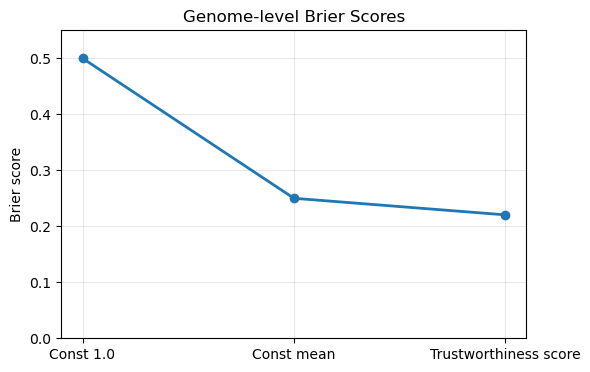

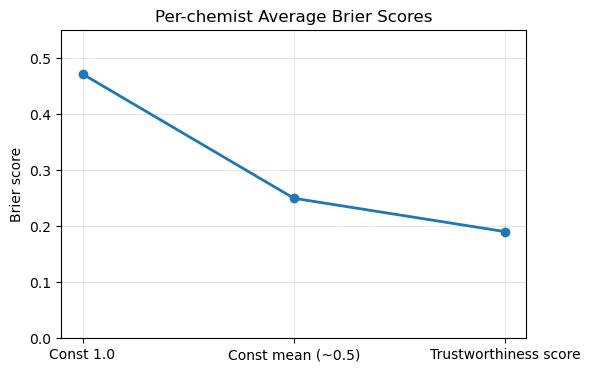

In [439]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1) Genome-level plot
# -----------------------
methods = ["Const 1.0", "Const mean", "Trustworthiness score"]
brier = [0.5000,0.2500, 0.2204]

plt.figure(figsize=(6, 4))
plt.plot(methods, brier, "o-", linewidth=2)
plt.title("Genome-level Brier Scores")
plt.ylabel("Brier score")
plt.ylim(0, 0.55)
plt.grid(alpha=0.3)
plt.show()

# -----------------------
# 2) Per-chemist plot
# -----------------------
# Average Brier values for each method across chemists
brier_avg = {
    "Const 1.0": np.mean([0.4375, 0.5500, 0.4000, 0.5000]),
    # "Const 0.7": np.mean([0.2650, 0.3100, 0.2500, 0.2900]),
    "Const mean (~0.5)": np.mean([0.2500, 0.2500, 0.2500, 0.2500]),
    "Trustworthiness score": np.mean([0.1721, 0.2041, 0.1827, 0.2026])
}

methods = list(brier_avg.keys())
brier = list(brier_avg.values())

plt.figure(figsize=(6, 4))
plt.plot(methods, brier, "o-", linewidth=2)
plt.title("Per-chemist Average Brier Scores")
plt.ylabel("Brier score")
plt.ylim(0, 0.55)
plt.grid(alpha=0.3)
plt.show()

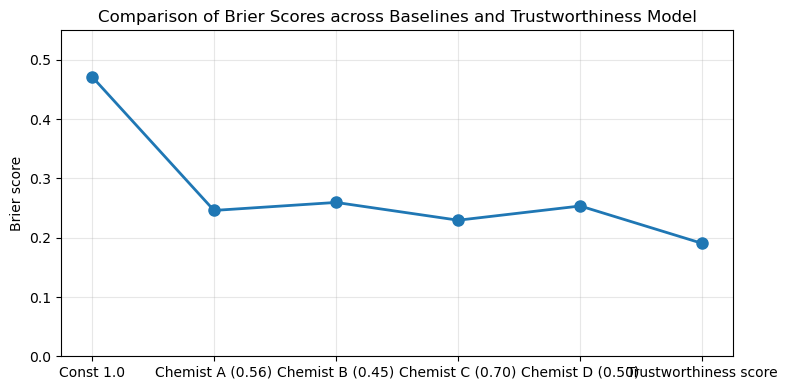

In [360]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1) Genome-level plot
# -----------------------
methods = ["Const 1.0", "Const 0.7", "Const mean (0.5)", "Trustworthiness score"]
brier_genome = [0.5000, 0.2900, 0.2500, 0.2204]

plt.figure(figsize=(6, 4))
plt.plot(methods, brier_genome, "o-", linewidth=2)
plt.title("Genome-level Brier Scores")
plt.ylabel("Brier score")
plt.ylim(0, 0.55)
plt.grid(alpha=0.3)
plt.show()

# -----------------------
# 2) Per-chemist plot (A–D)
# -----------------------
# Brier values per chemist per method
brier_values = {
    "chemist_A": [0.4375, 0.2650, 0.2500, 0.1721],
    "chemist_B": [0.5500, 0.3100, 0.2500, 0.2041],
    "chemist_C": [0.4000, 0.2500, 0.2500, 0.1827],
    "chemist_D": [0.5000, 0.2900, 0.2500, 0.2026],
}

methods = ["Const 1.0", "Const 0.7", "Const mean (0.5)", "Trustworthiness score"]
x = np.arange(len(methods))

plt.figure(figsize=(8, 5))
for chemist, briers in brier_values.items():
    plt.plot(x, briers, "o-", label=chemist, linewidth=2)

plt.xticks(x, methods, rotation=0)
plt.ylabel("Brier score")
plt.title("Per-chemist Brier Scores by Method")
plt.legend(title="Chemist")
plt.ylim(0, 0.6)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

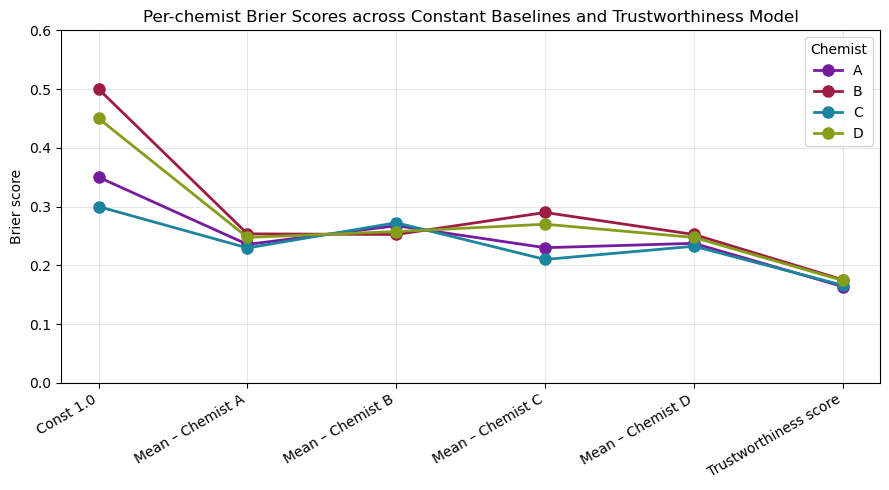

In [459]:
# labels = [
#     "Const 1.0",
#     "Chemist A (0.56)",
#     "Chemist B (0.45)",
#     "Chemist C (0.70)",
#     "Chemist D (0.50)",
#     "Trustworthiness score"
# ]

import matplotlib.pyplot as plt
import numpy as np

# X-axis labels (your version)
labels = [
    "Const 1.0",
    "Chemist A (0.56)",
    "Chemist B (0.45)",
    "Chemist C (0.70)",
    "Chemist D (0.55)",
    "Trustworthiness score"
]
palette = {
    "A": "#771b9e",
    "B": "#9e1b42",
    "C": "#1b849e",
    "D": "#849e1b",
}

# X-axis labels (no values, clean wording)
labels = [
    "Const 1.0",
    "Mean – Chemist A",
    "Mean – Chemist B",
    "Mean – Chemist C",
    "Mean – Chemist D",
    "Trustworthiness score",
]
x = np.arange(len(labels))

# Brier scores per chemist (from your actual data)
# brier_data = {
#     "A": [0.3500, 0.2356, 0.2536, 0.2100, 0.2500, 0.1638],
#     "B": [0.5000, 0.2536, 0.2500, 0.2900, 0.2525, 0.1755],
#     "C": [0.3000, 0.2296, 0.2500, 0.2100, 0.2725, 0.1661],
#     "D": [0.5000, 0.2476, 0.2500, 0.2900, 0.2525, 0.1742],
# }
brier_data = {
    "A": [0.3500, 0.2356, 0.2675, 0.2300, 0.2375, 0.1638],
    "B": [0.5000, 0.2536, 0.2525, 0.2900, 0.2525, 0.1755],
    "C": [0.3000, 0.2296, 0.2725, 0.2100, 0.2325, 0.1661],
    "D": [0.4500, 0.2476, 0.2575, 0.2700, 0.2475, 0.1742],
}

plt.figure(figsize=(9, 5))
for chemist, briers in brier_data.items():
    color = palette[chemist]
    plt.plot(x, briers, "o-",color=color, linewidth=2, markersize=8, label=chemist)

plt.xticks(x, labels, rotation=30, ha="right")
plt.ylabel("Brier score")
plt.title("Per-chemist Brier Scores across Constant Baselines and Trustworthiness Model")
color=palette[chemist]
plt.ylim(0, 0.6)
plt.grid(alpha=0.3)
plt.legend(title="Chemist", loc="upper right")
plt.tight_layout()
plt.show()

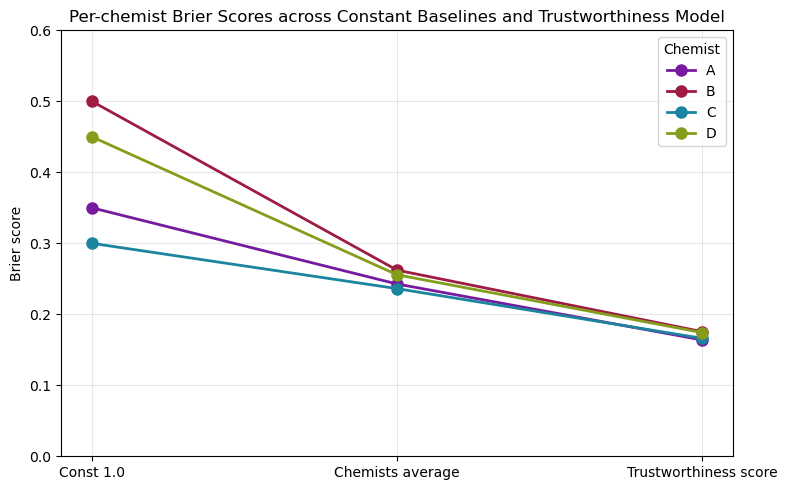

In [460]:
import matplotlib.pyplot as plt
import numpy as np

# New simplified labels
labels = [
    "Const 1.0",
    "Chemists average",
    "Trustworthiness score",
]
x = np.arange(len(labels))

palette = {
    "A": "#771b9e",
    "B": "#9e1b42",
    "C": "#1b849e",
    "D": "#849e1b",
}

# Original brier data
# brier_data = {
#     "A": [0.3500, 0.2356, 0.2536, 0.2100, 0.2500, 0.1638],
#     "B": [0.5000, 0.2536, 0.2500, 0.2900, 0.2525, 0.1755],
#     "C": [0.3000, 0.2296, 0.2500, 0.2100, 0.2725, 0.1661],
#     "D": [0.5000, 0.2536, 0.2500, 0.2900, 0.2525, 0.2026],
# }
brier_data = {
    "A": [0.3500, 0.2356, 0.2675, 0.2300, 0.2375, 0.1638],
    "B": [0.5000, 0.2536, 0.2525, 0.2900, 0.2525, 0.1755],
    "C": [0.3000, 0.2296, 0.2725, 0.2100, 0.2325, 0.1661],
    "D": [0.4500, 0.2476, 0.2575, 0.2700, 0.2475, 0.1742],
}

# Convert 6-point series → 3-point series by averaging the 4 middle values
compressed_data = {}
for chemist, arr in brier_data.items():
    const_val = arr[0]
    middle_mean = np.mean(arr[1:5])
    trust_val = arr[5]
    compressed_data[chemist] = [const_val, middle_mean, trust_val]

# Plot
plt.figure(figsize=(8, 5))
for chemist, briers in compressed_data.items():
    color = palette[chemist]
    plt.plot(x, briers, "o-", color=color, linewidth=2, markersize=8, label=chemist)

plt.xticks(x, labels, rotation=0)
plt.ylabel("Brier score")
plt.title("Per-chemist Brier Scores across Constant Baselines and Trustworthiness Model")
plt.ylim(0, 0.6)
plt.grid(alpha=0.3)
plt.legend(title="Chemist", loc="upper right")
plt.tight_layout()
plt.show()